CS6700 Programming Assignment 3 <br/>
<br/>
Biswajit Rout CE22M042 <br/>
Shubham Singh MA22C043 <br/>


In [ ]:
!pip install gymnasium --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 5.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import random
import gym
import glob
import io
import matplotlib.pyplot as plt
import gymnasium as gym
from gym.envs.toy_text.taxi import *
import seaborn as sns
from tqdm import tqdm

In [ ]:
env = gym.make('Taxi-v3', render_mode="rgb_array")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The following specifies the primitive action space in the Taxi environment <br/>
Primitive action space -> 6 actions -> 0: move south; 1: move north; 2: move east; 3: move west; 4: pick passenger up; and 5: drop passenger off

In [ ]:
# state space -> consists of 500 discrete states
print(env.observation_space)

# action space -> 6 actions -> 0: move south; 1: move north; 2: move east; 3: move west; 4: pick passenger up; and 5: drop passenger off
print(env.action_space)
# Primitive Actions
action = {0: 'move south', 1: 'move north', 2: 'move east', 3: 'move west', 4: 'pick passenger up', 5: 'drop passenger off'}
print(f'primitive actions -> {action}')


start = env.reset(seed=42)
print(f'Current state: {start}')

taxi_row, taxi_col, passenger_index, destination_index = env.decode(start[0])
print(f'Current state info: {taxi_row}, {taxi_col}, {passenger_index}, {destination_index}')

# Example Transitions
rnd_action = random.randint(0, 5)
print ("Action taken:", action[rnd_action])
# env.step returns 5 tuple rather than a 4 tuple as given in the tutorial
next_state, reward, is_terminal, _, t_prob = env.step(rnd_action)
print (f'Transition probability: {t_prob["prob"]}')
print (f'Next state: {next_state}')
taxi_row, taxi_col, passenger_index, destination_index = env.decode(next_state)
print(f'Current state info: {taxi_row}, {taxi_col}, {passenger_index}, {destination_index}')
print (f'Reward recieved: {reward}')
print (f'Terminal state: {is_terminal}')

Discrete(500)
Discrete(6)
primitive actions -> {0: 'move south', 1: 'move north', 2: 'move east', 3: 'move west', 4: 'pick passenger up', 5: 'drop passenger off'}
Current state: (386, {'prob': 1.0, 'action_mask': array([1, 1, 0, 1, 0, 0], dtype=int8)})
Current state info: 3, 4, 1, 2
Action taken: pick passenger up
Transition probability: 1.0
Next state: 386
Current state info: 3, 4, 1, 2
Reward recieved: -10
Terminal state: False


/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(


In [ ]:
# Passenger locations:

#     0: Red

#     1: Green

#     2: Yellow

#     3: Blue

#     4: In taxi

# Destinations:

#     0: Red

#     1: Green

#     2: Yellow

#     3: Blue


Options: <br/>
Options to move the taxi to each of the four designated locations, executable
when the taxi is not already there.<br/>
In the following cell, these options are handcoded

In [ ]:


# RGYB

# go to R
def go_to_R(env,state):

    optdone = False


    taxi_row, taxi_col, passenger_index, destination_index = env.decode(state)

    # optact = 1 # cannot go north from R -> stays at R and incurs a reward of -1
    optact = 1

    # taxi is at R
    if (taxi_row == 0 and taxi_col == 0): # at R
        optdone = True # option is done

    # taxi is at column 0
    elif (taxi_col == 0 and taxi_row != 0): # at column 0
        optact = 1 # move north
    # taxi is at column column 1 above barrier
    elif (taxi_col == 1 and taxi_row <= 2): # at column 1 above barrier
        optact = 3 # move west
    # taxi is at column column 1 below barrier
    elif (taxi_col == 1 and taxi_row > 2): # at column 1 below barrier
        optact = 1 # move north
    # taxi is at column column 2 below barrier
    elif (taxi_col == 2 and taxi_row >= 2): # at column 2 below barrier
        optact = 3 # move west
    # taxi is at column column 2 above barrier
    elif (taxi_col == 2 and taxi_row < 2): # at column 2 above barrier
        optact = 0 # move south
    # taxi is at column column 3 above barrier
    elif (taxi_col == 3 and taxi_row <= 2): # at column 3 above barrier
        optact = 3 # move west
    # taxi is at column column 3 below barrier
    elif (taxi_col == 3 and taxi_row > 2): # at column 3 below barrier
        optact = 1 # move north
    # taxi is at column 4
    elif (taxi_col == 4): # at column 4
        optact = 3 # move west

    return [optact,optdone]


# go to Y
def go_to_Y(env,state):

    optdone = False

    taxi_row, taxi_col, passenger_index, destination_index = env.decode(state)

    # optact = 0 # cannot go south from Y -> stays at Y and incurs a reward of -1

    optact = 0

    # taxi is at Y
    if (taxi_row == 4 and taxi_col == 0): # at Y
        optdone = True # option is done

    # taxi is at column 0
    elif (taxi_col == 0): # at column 0
        optact = 0 # move south
    # taxi is at column column 1 above barrier
    elif (taxi_col == 1 and taxi_row <= 2): # at column 1 above barrier
        optact = 3 # move west
    # taxi is at column column 1 below barrier
    elif (taxi_col == 1 and taxi_row > 2): # at column 1 below barrier
        optact = 1 # move north
    # taxi is at column column 2 below barrier
    elif (taxi_col == 2 and taxi_row >= 2): # at column 2 below barrier
        optact = 3 # move west
    # taxi is at column column 2 above barrier
    elif (taxi_col == 2 and taxi_row < 2): # at column 2 above barrier
        optact = 0 # move south
    # taxi is at column column 3 above barrier
    elif (taxi_col == 3 and taxi_row <= 2): # at column 3 above barrier
        optact = 3 # move west
    # taxi is at column column 3 below barrier
    elif (taxi_col == 3 and taxi_row > 2): # at column 3 below barrier
        optact = 1 # move north
    # taxi is at column 4
    elif (taxi_col == 4): # at column 4
        optact = 3 # move west

    return [optact,optdone]


# go to G
def go_to_G(env,state):

    optdone = False

    taxi_row, taxi_col, passenger_index, destination_index = env.decode(state)

    # optact = 2 # cannot go east from G -> stays at G and incurs a reward of -1
    optact = 2

    # taxi is at G
    if (taxi_row == 0 and taxi_col == 4): # at G
        optdone = True # option is done

    # taxi is at column 0 above barrier
    elif (taxi_col == 0 and taxi_row <= 2): # at column 0 above barrier
        optact = 2 # move east
    # taxi is at column 0 below barrier
    elif (taxi_col == 0 and taxi_row > 2): # at column 0 below barrier
        optact = 1 # move north
    # taxi is at column column 1 above barrier
    elif (taxi_col == 1 and taxi_row < 2): # at column 1 above barrier
        optact = 0 # move south
    # taxi is at column column 1 below barrier
    elif (taxi_col == 1 and taxi_row >= 2): # at column 1 below barrier
        optact = 2 # move east
    # taxi is at column column 2 below barrier
    elif (taxi_col == 2 and taxi_row > 2): # at column 2 below barrier
        optact = 1 # move north
    # taxi is at column column 2 above barrier
    elif (taxi_col == 2 and taxi_row <= 2): # at column 2 above barrier
        optact = 2 # move east
    # taxi is at column column 3
    elif (taxi_col == 3): # at column 3
        optact = 2 # move east
    # taxi is at column 4
    elif (taxi_col == 4): # at column 4
        optact = 1 # move north

    return [optact,optdone]


# go to B
def go_to_B(env,state):

    optdone = False

    taxi_row, taxi_col, passenger_index, destination_index = env.decode(state)

    # optact = 0 # cannot go south from B -> stays at B and incurs a reward of -1
    optact = 0

    # taxi is at B
    if (taxi_row == 4 and taxi_col == 3): # at B
        optdone = True # option is done

    # taxi is at column 0 above barrier
    elif (taxi_col == 0 and taxi_row <= 2): # at column 0 above barrier
        optact = 2 # move east
    # taxi is at column 0 below barrier
    elif (taxi_col == 0 and taxi_row > 2): # at column 0 below barrier
        optact = 1 # move north
    # taxi is at column column 1 above barrier
    elif (taxi_col == 1 and taxi_row < 2): # at column 1 above barrier
        optact = 0 # move south
    # taxi is at column column 1 below barrier
    elif (taxi_col == 1 and taxi_row >= 2): # at column 1 below barrier
        optact = 2 # move east
    # taxi is at column column 2 below barrier
    elif (taxi_col == 2 and taxi_row > 2): # at column 2 below barrier
        optact = 1 # move north
    # taxi is at column column 2 above barrier
    elif (taxi_col == 2 and taxi_row <= 2): # at column 2 above barrier
        optact = 2 # move east
    # taxi is at column column 3
    elif (taxi_col == 3): # at column 3
        optact = 0 # move south
    # taxi is at column 4
    elif (taxi_col == 4): # at column 4
        optact = 3 # move west

    return [optact,optdone]



In [ ]:
# RGYB

# go to R
def go_to_R(env,state):

    optdone = False


    taxi_row, taxi_col, passenger_index, destination_index = env.decode(state)

    # optact = 1 # cannot go north from R -> stays at R and incurs a reward of -1
    optact = 1

    # taxi is at R
    if (taxi_row == 0 and taxi_col == 0): # at R
        optdone = True # option is done

    # taxi is at column 0
    elif (taxi_col == 0 and taxi_row != 0): # at column 0
        optact = 1 # move north
    # taxi is at column column 1 above barrier
    elif (taxi_col == 1 and taxi_row <= 2): # at column 1 above barrier
        optact = 3 # move west
    # taxi is at column column 1 below barrier
    elif (taxi_col == 1 and taxi_row > 2): # at column 1 below barrier
        optact = 1 # move north
    # taxi is at column column 2 below barrier
    elif (taxi_col == 2 and taxi_row >= 2): # at column 2 below barrier
        optact = 3 # move west
    # taxi is at column column 2 above barrier
    elif (taxi_col == 2 and taxi_row < 2): # at column 2 above barrier
        optact = 0 # move south
    # taxi is at column column 3 above barrier
    elif (taxi_col == 3 and taxi_row <= 2): # at column 3 above barrier
        optact = 3 # move west
    # taxi is at column column 3 below barrier
    elif (taxi_col == 3 and taxi_row > 2): # at column 3 below barrier
        optact = 1 # move north
    # taxi is at column 4
    elif (taxi_col == 4): # at column 4
        optact = 3 # move west

    return [optact,optdone]


# go to Y
def go_to_Y(env,state):

    optdone = False

    taxi_row, taxi_col, passenger_index, destination_index = env.decode(state)

    # optact = 0 # cannot go south from Y -> stays at Y and incurs a reward of -1

    optact = 0

    # taxi is at Y
    if (taxi_row == 4 and taxi_col == 0): # at Y
        optdone = True # option is done

    # taxi is at column 0
    elif (taxi_col == 0): # at column 0
        optact = 0 # move south
    # taxi is at column column 1 above barrier
    elif (taxi_col == 1 and taxi_row <= 2): # at column 1 above barrier
        optact = 3 # move west
    # taxi is at column column 1 below barrier
    elif (taxi_col == 1 and taxi_row > 2): # at column 1 below barrier
        optact = 1 # move north
    # taxi is at column column 2 below barrier
    elif (taxi_col == 2 and taxi_row >= 2): # at column 2 below barrier
        optact = 3 # move west
    # taxi is at column column 2 above barrier
    elif (taxi_col == 2 and taxi_row < 2): # at column 2 above barrier
        optact = 0 # move south
    # taxi is at column column 3 above barrier
    elif (taxi_col == 3 and taxi_row <= 2): # at column 3 above barrier
        optact = 3 # move west
    # taxi is at column column 3 below barrier
    elif (taxi_col == 3 and taxi_row > 2): # at column 3 below barrier
        optact = 1 # move north
    # taxi is at column 4
    elif (taxi_col == 4): # at column 4
        optact = 3 # move west

    return [optact,optdone]


# go to G
def go_to_G(env,state):

    optdone = False

    taxi_row, taxi_col, passenger_index, destination_index = env.decode(state)

    # optact = 2 # cannot go east from G -> stays at G and incurs a reward of -1
    optact = 2

    # taxi is at G
    if (taxi_row == 0 and taxi_col == 4): # at G
        optdone = True # option is done

    # taxi is at column 0 above barrier
    elif (taxi_col == 0 and taxi_row <= 2): # at column 0 above barrier
        optact = 2 # move east
    # taxi is at column 0 below barrier
    elif (taxi_col == 0 and taxi_row > 2): # at column 0 below barrier
        optact = 1 # move north
    # taxi is at column column 1 above barrier
    elif (taxi_col == 1 and taxi_row < 2): # at column 1 above barrier
        optact = 0 # move south
    # taxi is at column column 1 below barrier
    elif (taxi_col == 1 and taxi_row >= 2): # at column 1 below barrier
        optact = 2 # move east
    # taxi is at column column 2 below barrier
    elif (taxi_col == 2 and taxi_row > 2): # at column 2 below barrier
        optact = 1 # move north
    # taxi is at column column 2 above barrier
    elif (taxi_col == 2 and taxi_row <= 2): # at column 2 above barrier
        optact = 2 # move east
    # taxi is at column column 3
    elif (taxi_col == 3): # at column 3
        optact = 2 # move east
    # taxi is at column 4
    elif (taxi_col == 4): # at column 4
        optact = 1 # move north

    return [optact,optdone]



# go to B
def go_to_B(env,state):

    optdone = False

    taxi_row, taxi_col, passenger_index, destination_index = env.decode(state)

    # optact = 0 # cannot go south from B -> stays at B and incurs a reward of -1
    optact = 0

    # taxi is at B
    if (taxi_row == 4 and taxi_col == 3): # at B
        optdone = True # option is done

    # taxi is at column 0 above barrier
    elif (taxi_col == 0 and taxi_row <= 2): # at column 0 above barrier
        optact = 2 # move east
    # taxi is at column 0 below barrier
    elif (taxi_col == 0 and taxi_row > 2): # at column 0 below barrier
        optact = 1 # move north
    # taxi is at column column 1 above barrier
    elif (taxi_col == 1 and taxi_row < 2): # at column 1 above barrier
        optact = 0 # move south
    # taxi is at column column 1 below barrier
    elif (taxi_col == 1 and taxi_row >= 2): # at column 1 below barrier
        optact = 2 # move east
    # taxi is at column column 2 below barrier
    elif (taxi_col == 2 and taxi_row > 2): # at column 2 below barrier
        optact = 1 # move north
    # taxi is at column column 2 above barrier
    elif (taxi_col == 2 and taxi_row <= 2): # at column 2 above barrier
        optact = 2 # move east
    # taxi is at column column 3
    elif (taxi_col == 3): # at column 3
        optact = 0 # move south
    # taxi is at column 4
    elif (taxi_col == 4): # at column 4
        optact = 3 # move west

    return [optact,optdone]

Text(0.5, 0.98, 'Policy for the provided options')

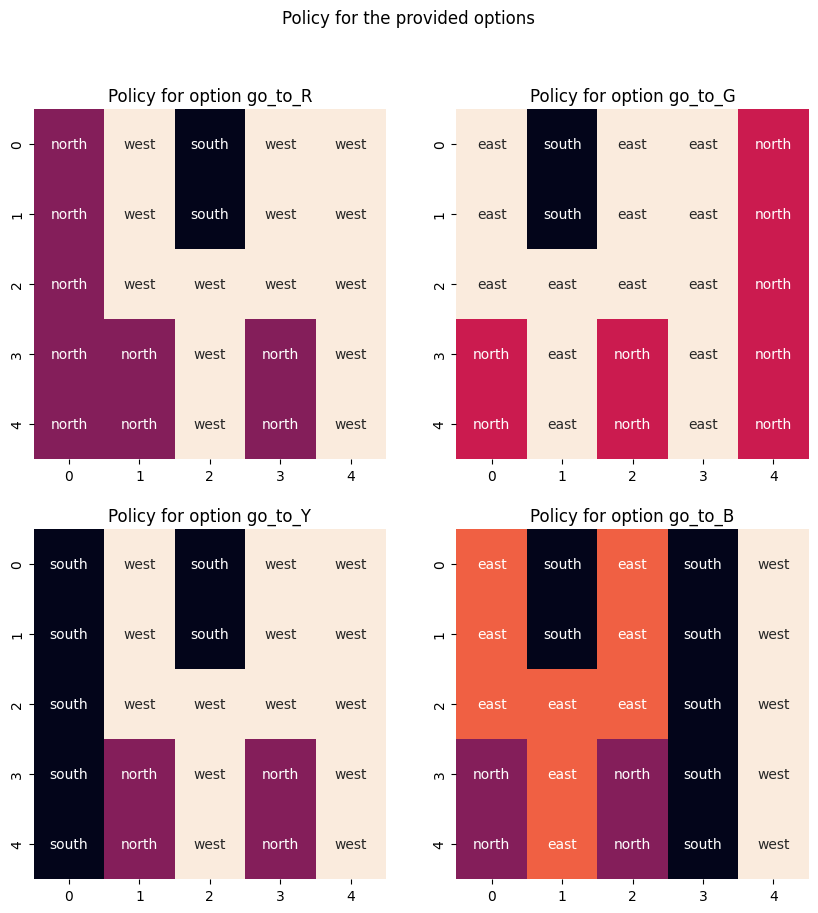

In [ ]:
optR = np.array([[1,3,0,3,3],
                 [1,3,0,3,3],
                 [1,3,3,3,3],
                 [1,1,3,1,3],
                 [1,1,3,1,3]
                 ])
optG = np.array([[2,0,2,2,1],
                 [2,0,2,2,1],
                 [2,2,2,2,1],
                 [1,2,1,2,1],
                 [1,2,1,2,1]
                 ])
optY = np.array([[0,3,0,3,3],
                 [0,3,0,3,3],
                 [0,3,3,3,3],
                 [0,1,3,1,3],
                 [0,1,3,1,3]
                 ])
optB = np.array([[2,0,2,0,3],
                 [2,0,2,0,3],
                 [2,2,2,0,3],
                 [1,2,1,0,3],
                 [1,2,1,0,3]
                 ])
options = [optR,optG,optY,optB]
optName = ['R','G','Y','B']

figure, axis = plt.subplots(2,2,figsize=(10,10))

for i in range(2):
  for j in range(2):
    labels = {0:'south',1:'north', 2:'east', 3:'west'}
    l = np.vectorize(labels.get)((options[2*i+j]))
    ax = sns.heatmap((options[2*i+j]),ax=axis[i,j],annot = l,fmt='', cbar=False)
    axis[i,j].set_title("Policy for option go_to_{}".format(optName[i*2+j]))
plt.suptitle(f'Policy for the provided options')

Text(0.5, 0.98, 'Policy Visualization for the Provided Options')

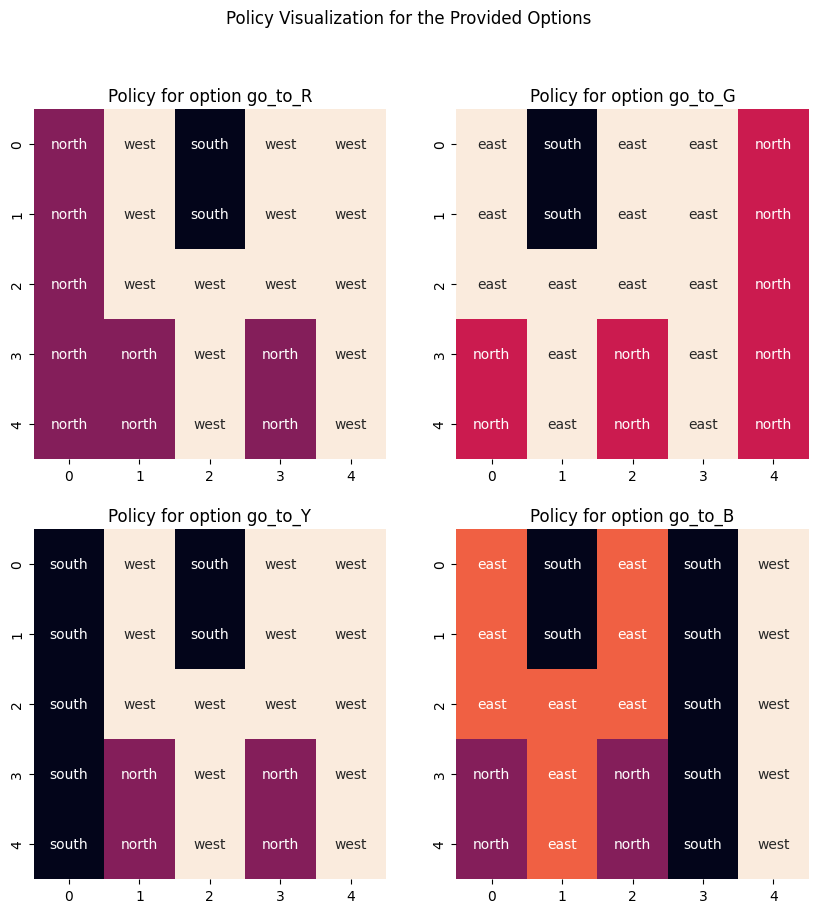

In [ ]:
opt_R = np.array([[1, 3, 0, 3, 3],
                  [1, 3, 0, 3, 3],
                  [1, 3, 3, 3, 3],
                  [1, 1, 3, 1, 3],
                  [1, 1, 3, 1, 3]])

opt_G = np.array([[2, 0, 2, 2, 1],
                  [2, 0, 2, 2, 1],
                  [2, 2, 2, 2, 1],
                  [1, 2, 1, 2, 1],
                  [1, 2, 1, 2, 1]])

opt_Y = np.array([[0, 3, 0, 3, 3],
                  [0, 3, 0, 3, 3],
                  [0, 3, 3, 3, 3],
                  [0, 1, 3, 1, 3],
                  [0, 1, 3, 1, 3]])

opt_B = np.array([[2, 0, 2, 0, 3],
                  [2, 0, 2, 0, 3],
                  [2, 2, 2, 0, 3],
                  [1, 2, 1, 0, 3],
                  [1, 2, 1, 0, 3]])

option_policies = [opt_R, opt_G, opt_Y, opt_B]
option_names = ['R', 'G', 'Y', 'B']

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i in range(2):
    for j in range(2):
        action_labels = {0: 'south', 1: 'north', 2: 'east', 3: 'west'}
        label_converter = np.vectorize(action_labels.get)
        labeled_policy = label_converter(option_policies[2 * i + j])
        ax = sns.heatmap(option_policies[2 * i + j], ax=axes[i, j], annot=labeled_policy, fmt='', cbar=False)
        axes[i, j].set_title(f"Policy for option go_to_{option_names[i * 2 + j]}")

plt.suptitle('Policy Visualization for the Provided Options')

Actions are chosen epsilon-greedily

In [ ]:
# implementation of epsilon-greedy policy
def epsilon_greedy_policy(q_values,state,epsilon):
    # exploration
    if random.uniform(0, 1) < epsilon:
        # Select a random action
        action = np.random.choice(range(10)) # because we have 6 primitive actions + 4 options
    # exploitation
    else:
        # Select the action with highest Q-value
        action = np.argmax(q_values[state])
    return action


## SMDP

The following cell implements SMDP Q-Learning with the handcoded options - go_to_R, go_to_G, go_to_Y, go_to_B

In [ ]:
#Q-Table: (States x Actions) === (env.ns(500) x total actions(10))
q_values_SMDP = np.zeros((500,10))

update_freq = np.zeros((500,10))

#### SMDP Q-Learning

# Add parameters you might need here
gamma = 0.9

# lr
alpha = 0.1

n_eps = 30000

rewards = np.zeros((1,n_eps))
steps = []

for i in range(1):
  # Iterate over 1000 episodes
  for episode in tqdm(range(n_eps)):
      step = 0
      state = env.reset()[0] # get the initial state
      done = False # while not terminating step
      total_rewards = 0
      # print(state)

      # While episode is not over
      while not done:
          step +=1
          # Choose action
          action = egreedy_policy(q_values_SMDP, state, epsilon=0.1)

          # Checking if primitive action
          if action < 6:
              # Perform regular Q-Learning update for state-action pair
              next_state, reward, done, _, _ = env.step(action)

              total_rewards += reward

              # store in Q table and update frequency table
              ##############################
              # Usual Q-Learning update rule
              q_values_SMDP[state][action] += alpha * (reward + gamma * np.max(q_values_SMDP[next_state]) - q_values_SMDP[state][action])
              ##############################
              ##############################
              # update frequency
              update_freq[state][action] += 1
              ##############################
              state = next_state


          # Checking if action chosen is an option
          reward_bar = 0
          if action == 6: # action => go to R option
              optdone = False
              init_state = state
              tau=0
              while (optdone == False and not done):

                  # Think about what this function might do?
                  optact, optdone = go_to_R(env, state) # away option
                  # print(optact, optdone)
                  next_state, reward, done, _, _ = env.step(optact)
                  # print(next_state)
                  # total_rewards += reward


                  # Is this formulation right? What is this term?
                  ##############################
                  # Compute the discounted reward
                  reward_bar = gamma * reward_bar + reward
                  ##############################

                  # Complete SMDP Q-Learning Update
                  # Remember SMDP Updates. When & What do you update?

                  ##############################
                  tau+=1 # tau for exponentiating gamma
                  ##############################

                  state = next_state
              ##############################
              # SMDP update after finishing the trajectory
              q_values_SMDP[init_state][action] += alpha * (reward_bar + (gamma**tau) * np.max(q_values_SMDP[state]) - q_values_SMDP[init_state][action])
              ##############################
              ##############################
              # update frequency
              update_freq[init_state][action] += 1
              ##############################
              total_rewards += reward_bar

          if action == 7: # action => go to Y option
              optdone = False
              init_state = state
              tau=0
              while (optdone == False and not done):

                  # Think about what this function might do?
                  optact, optdone = go_to_Y(env, state)  # close option
                  # print(optact, optdone)
                  next_state, reward, done, _, _ = env.step(optact)
                  # print(next_state)
                  # total_rewards += reward

                  # Is this formulation right? What is this term?
                  ##############################
                  # Compute the discounted reward
                  reward_bar = gamma * reward_bar + reward
                  ##############################

                  # Complete SMDP Q-Learning Update
                  # Remember SMDP Updates. When & What do you update?

                  ##############################
                  tau+=1 # tau for exponentiating gamma
                  ##############################

                  state = next_state
              ##############################
              # SMDP update after finishing the trajectory
              q_values_SMDP[init_state][action] += alpha * (reward_bar + (gamma**tau) * np.max(q_values_SMDP[state]) - q_values_SMDP[init_state][action])
              ##############################
              ##############################
              # update frequency
              update_freq[init_state][action] += 1
              ##############################
              total_rewards += reward_bar

          if action == 8: # action => go to G option
              optdone = False
              init_state = state
              tau=0
              while (optdone == False and not done):

                  # Think about what this function might do?
                  optact, optdone = go_to_G(env, state)  # close option
                  # print(optact, optdone)
                  next_state, reward, done, _, _ = env.step(optact)
                  # print(next_state)
                  # total_rewards += reward

                  # Is this formulation right? What is this term?
                  ##############################
                  # Compute the discounted reward
                  reward_bar = gamma * reward_bar + reward
                  ##############################

                  # Complete SMDP Q-Learning Update
                  # Remember SMDP Updates. When & What do you update?

                  ##############################
                  tau+=1 # tau for exponentiating gamma
                  ##############################

                  state = next_state
              ##############################
              # SMDP update after finishing the trajectory
              q_values_SMDP[init_state][action] += alpha * (reward_bar + (gamma**tau) * np.max(q_values_SMDP[state]) - q_values_SMDP[init_state][action])
              ##############################
              ##############################
              # update frequency
              update_freq[init_state][action] += 1
              ##############################
              total_rewards += reward_bar

          if action == 9: # action => go to B option
              optdone = False
              init_state = state
              tau=0
              while (optdone == False and not done):

                  # Think about what this function might do?
                  optact, optdone = go_to_B(env, state)  # close option
                  # print(optact, optdone)
                  next_state, reward, done, _, _ = env.step(optact)
                  # print(next_state)
                  # total_rewards += reward

                  # Is this formulation right? What is this term?
                  ##############################
                  # Compute the discounted reward
                  reward_bar = gamma * reward_bar + reward
                  ##############################

                  # Complete SMDP Q-Learning Update
                  # Remember SMDP Updates. When & What do you update?

                  ##############################
                  tau+=1 # tau for exponentiating gamma
                  ##############################

                  state = next_state
              ##############################
              # SMDP update after finishing the trajectory
              q_values_SMDP[init_state][action] += alpha * (reward_bar + (gamma**tau) * np.max(q_values_SMDP[state]) - q_values_SMDP[init_state][action])
              ##############################
              ##############################
              # update frequency
              update_freq[init_state][action] += 1
              ##############################
              total_rewards += reward_bar

      rewards[i][episode] = total_rewards
      steps.append(step)

r = np.sum(rewards, 0)

  0%|          | 0/30000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
100%|██████████| 30000/30000 [00:34<00:00, 860.67it/s]


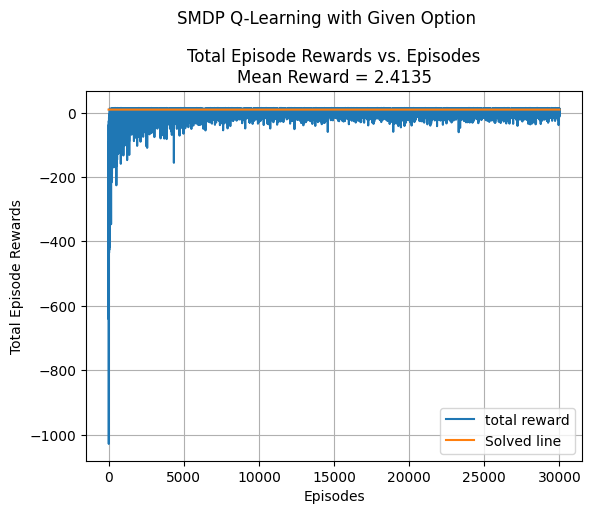

In [ ]:
plt.plot(np.arange(n_eps), r, label='total reward')
plt.title(f'Total Episode Rewards vs. Episodes\nMean Reward = {np.mean(r):.4f}')
plt.suptitle(f'SMDP Q-Learning with Given Option', y=1.05)
plt.plot(np.arange(n_eps), [9.7] * n_eps, label='Solved line')
plt.xlabel('Episodes')
plt.ylabel('Total Episode Rewards')
plt.grid()
plt.legend()


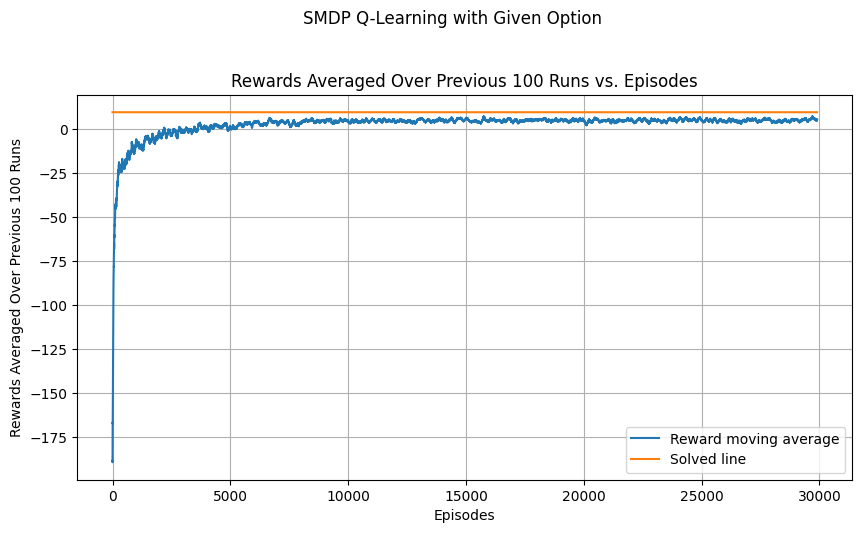

In [ ]:
plt.figure(figsize=(10, 5))
avg_rews0 = [np.average(r[i:i+100]) for i in range(len(r)-100)]
plt.plot(avg_rews0, label='Reward moving average')
plt.plot([9.7 for _ in range(len(avg_rews0))], label='Solved line')
plt.xlabel('Episodes')
plt.ylabel('Rewards Averaged Over Previous 100 Runs')
plt.suptitle('SMDP Q-Learning with Given Option', y=1.05)
plt.title('Rewards Averaged Over Previous 100 Runs vs. Episodes')
plt.grid()
plt.legend()


In [ ]:

# {0: 'move south', 1: 'move north', 2: 'move east', 3: 'move west', 4: 'pick passenger up', 5: 'drop passenger off'}

reshaped_Q_matrix = q_values_SMDP.reshape(500, 10)
max_Q_matrix = np.max(reshaped_Q_matrix, axis=-1)
argmax_Q_matrix = np.argmax(reshaped_Q_matrix, axis=-1)

opt_map = {0: 'south', 1: 'north', 2: 'east', 3: 'west', 4: 'pick\npassenger', 5: 'drop\npassenger', 6: 'go to R', 7: 'go to Y', 8: 'go to G', 9: 'go to B'}
pass_map = {0: 'R', 1:'G', 2: 'Y', 3:'B'}
labeled_argmax_Q_matrix = np.vectorize(opt_map.get)(argmax_Q_matrix)

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search t

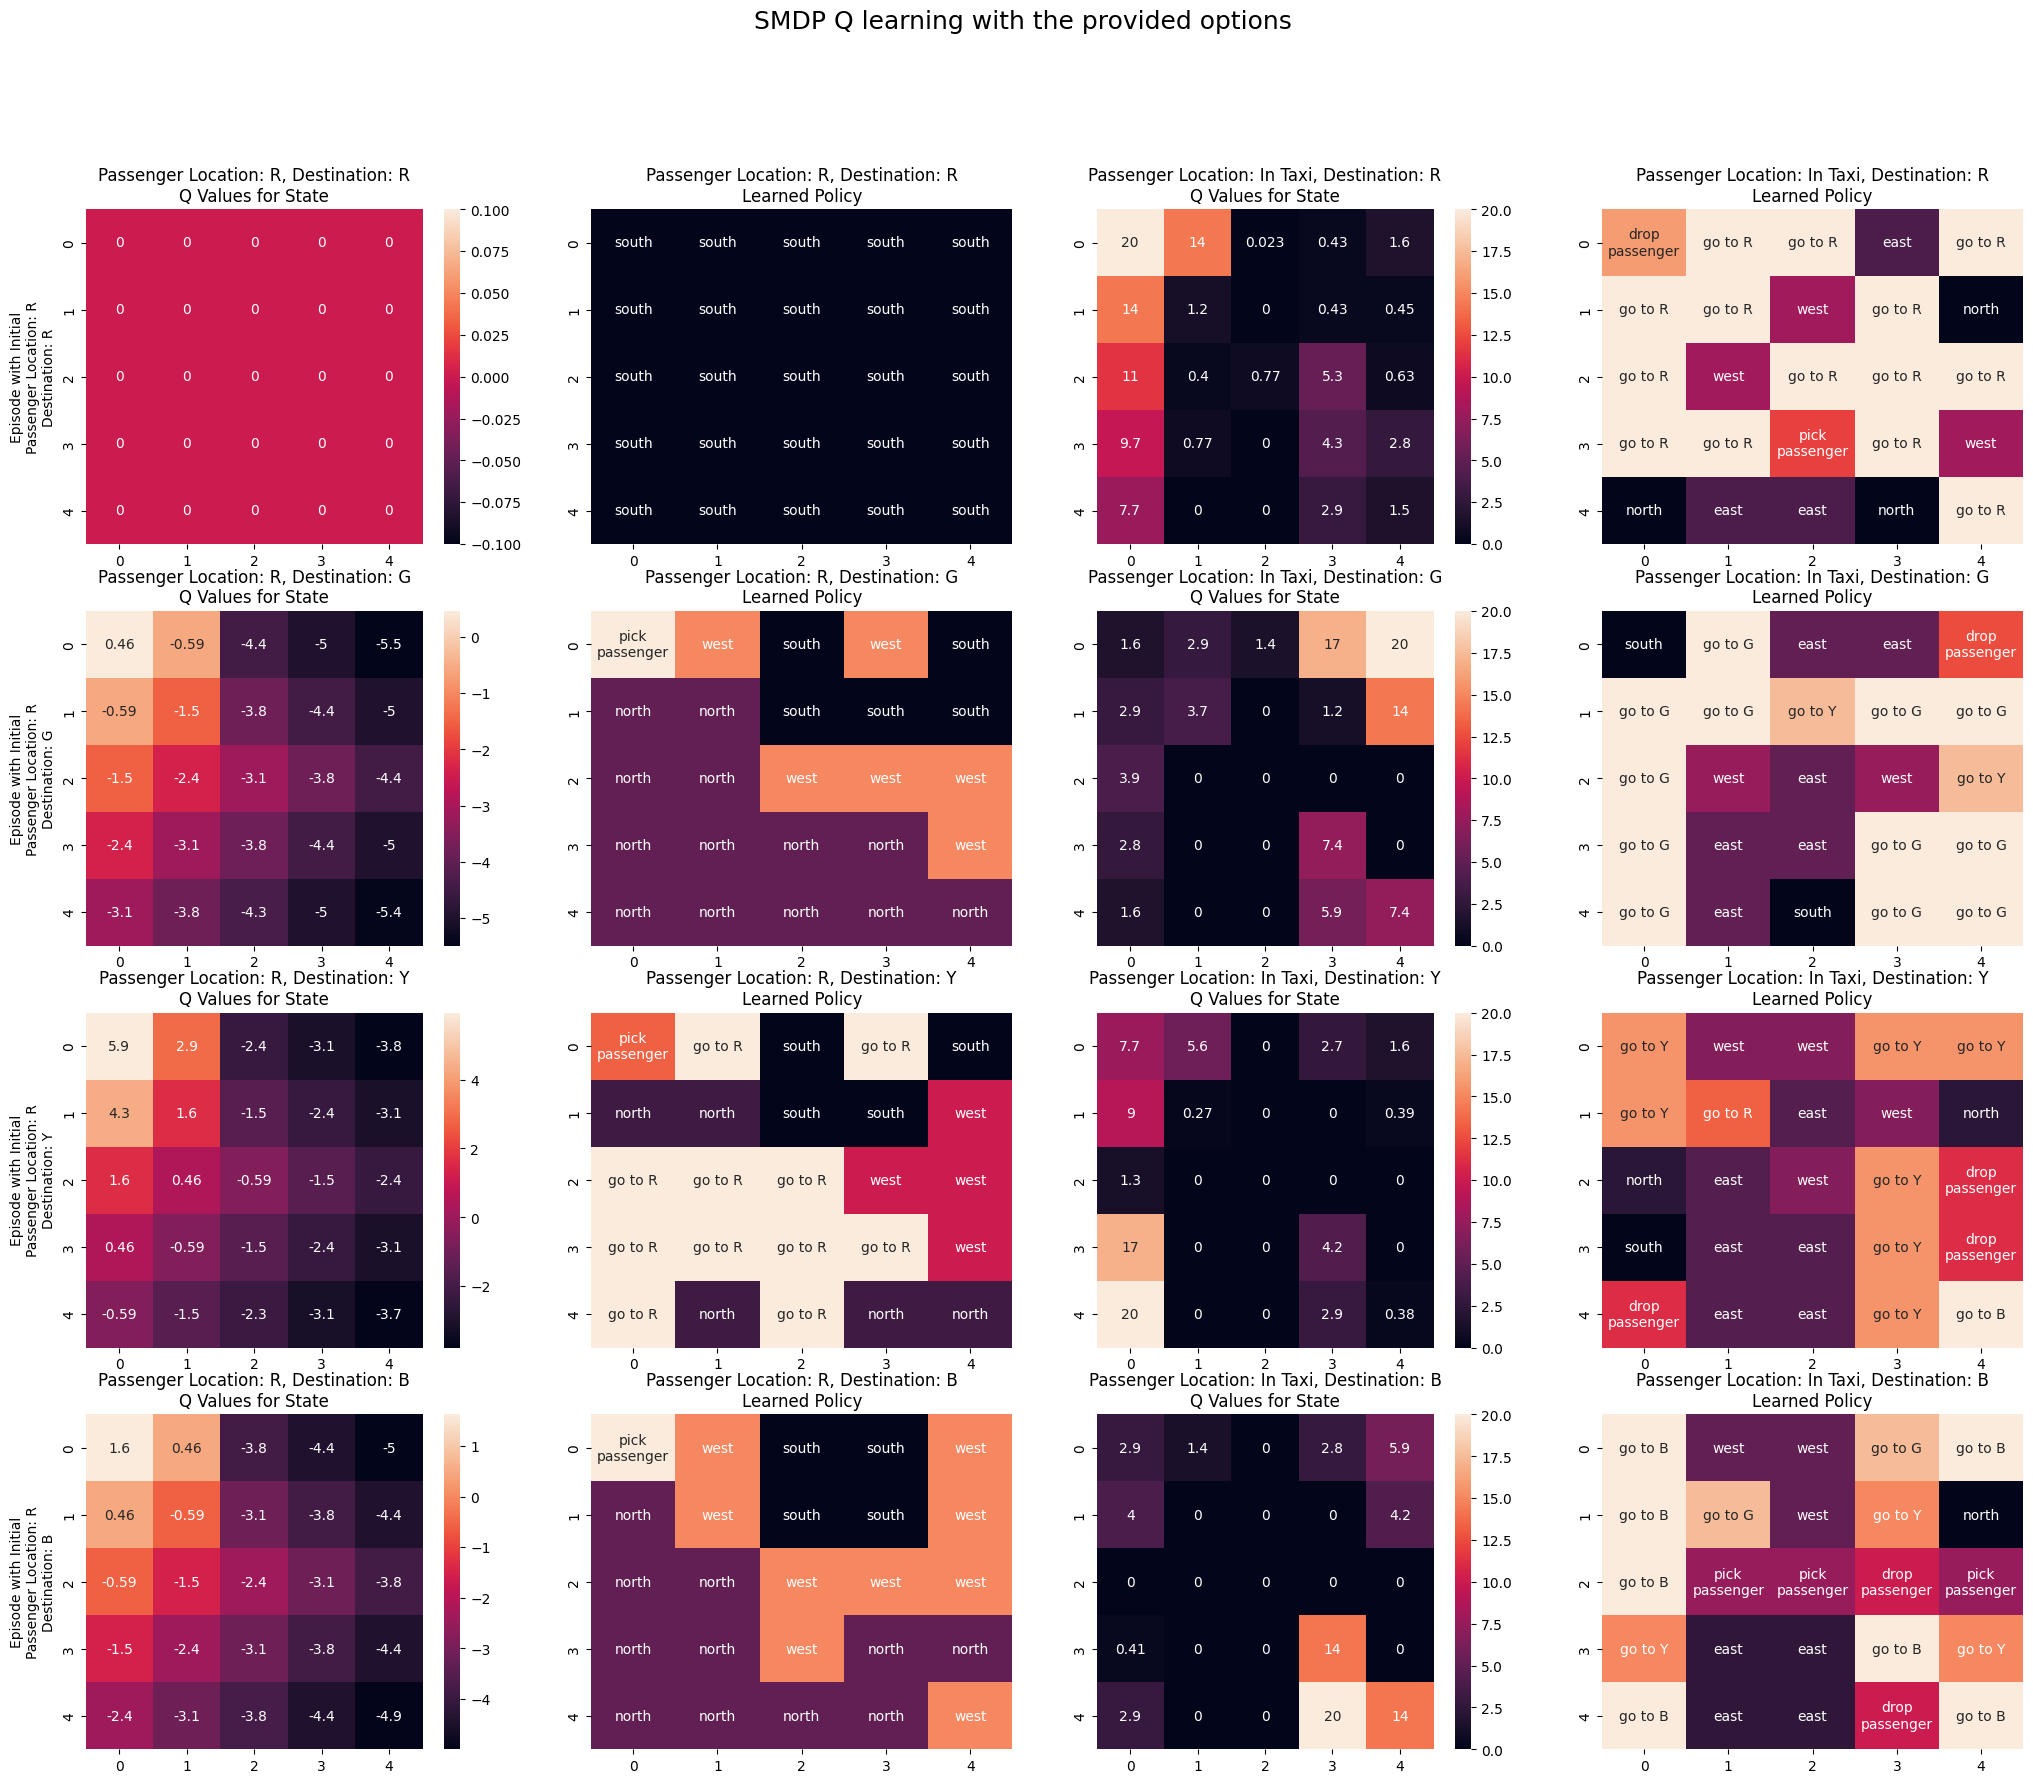

In [ ]:
# passenger outside taxi
idx = np.arange(20)

pass_loc = 0 # can be 0,1,2,3,4

id = idx[pass_loc*4:pass_loc*4 + 4]
id_in_taxi = idx[16:20]

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(25, 20))

plt.suptitle(f'SMDP Q learning with the provided options', fontsize=18)
for n, i in enumerate(id):
    # print(n,i)
    _, _, passenger_loc, destination = env.decode(i)
    # print("Final Q-Table:\n", argmax_Q_matrix[i::20].reshape(5,5))
    axs[n][0].set_title(f'Passenger Location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}\nQ Values for State')
    sns.heatmap(max_Q_matrix[i::20].reshape(5, 5), annot=True, ax=axs[n][0]).set(ylabel=f'Episode with Initial\nPassenger Location: {pass_map[passenger_loc]}\nDestination: {pass_map[destination]}')
    t = labeled_argmax_Q_matrix[i::20].reshape(5, 5)
    sns.heatmap(argmax_Q_matrix[i::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][1], cbar=False)
    axs[n][1].set_title(f'Passenger Location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}\nLearned Policy')

    axs[n][2].set_title(f'Passenger Location: In Taxi, Destination: {pass_map[destination]}\nQ Values for State')
    sns.heatmap(max_Q_matrix[id_in_taxi[n]::20].reshape(5, 5), annot=True, ax=axs[n][2])
    t = labeled_argmax_Q_matrix[id_in_taxi[n]::20].reshape(5, 5)
    sns.heatmap(argmax_Q_matrix[id_in_taxi[n]::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][3], cbar=False)
    axs[n][3].set_title(f'Passenger Location: In Taxi, Destination: {pass_map[destination]}\nLearned Policy')


Text(220.72222222222223, 0.5, 'States')

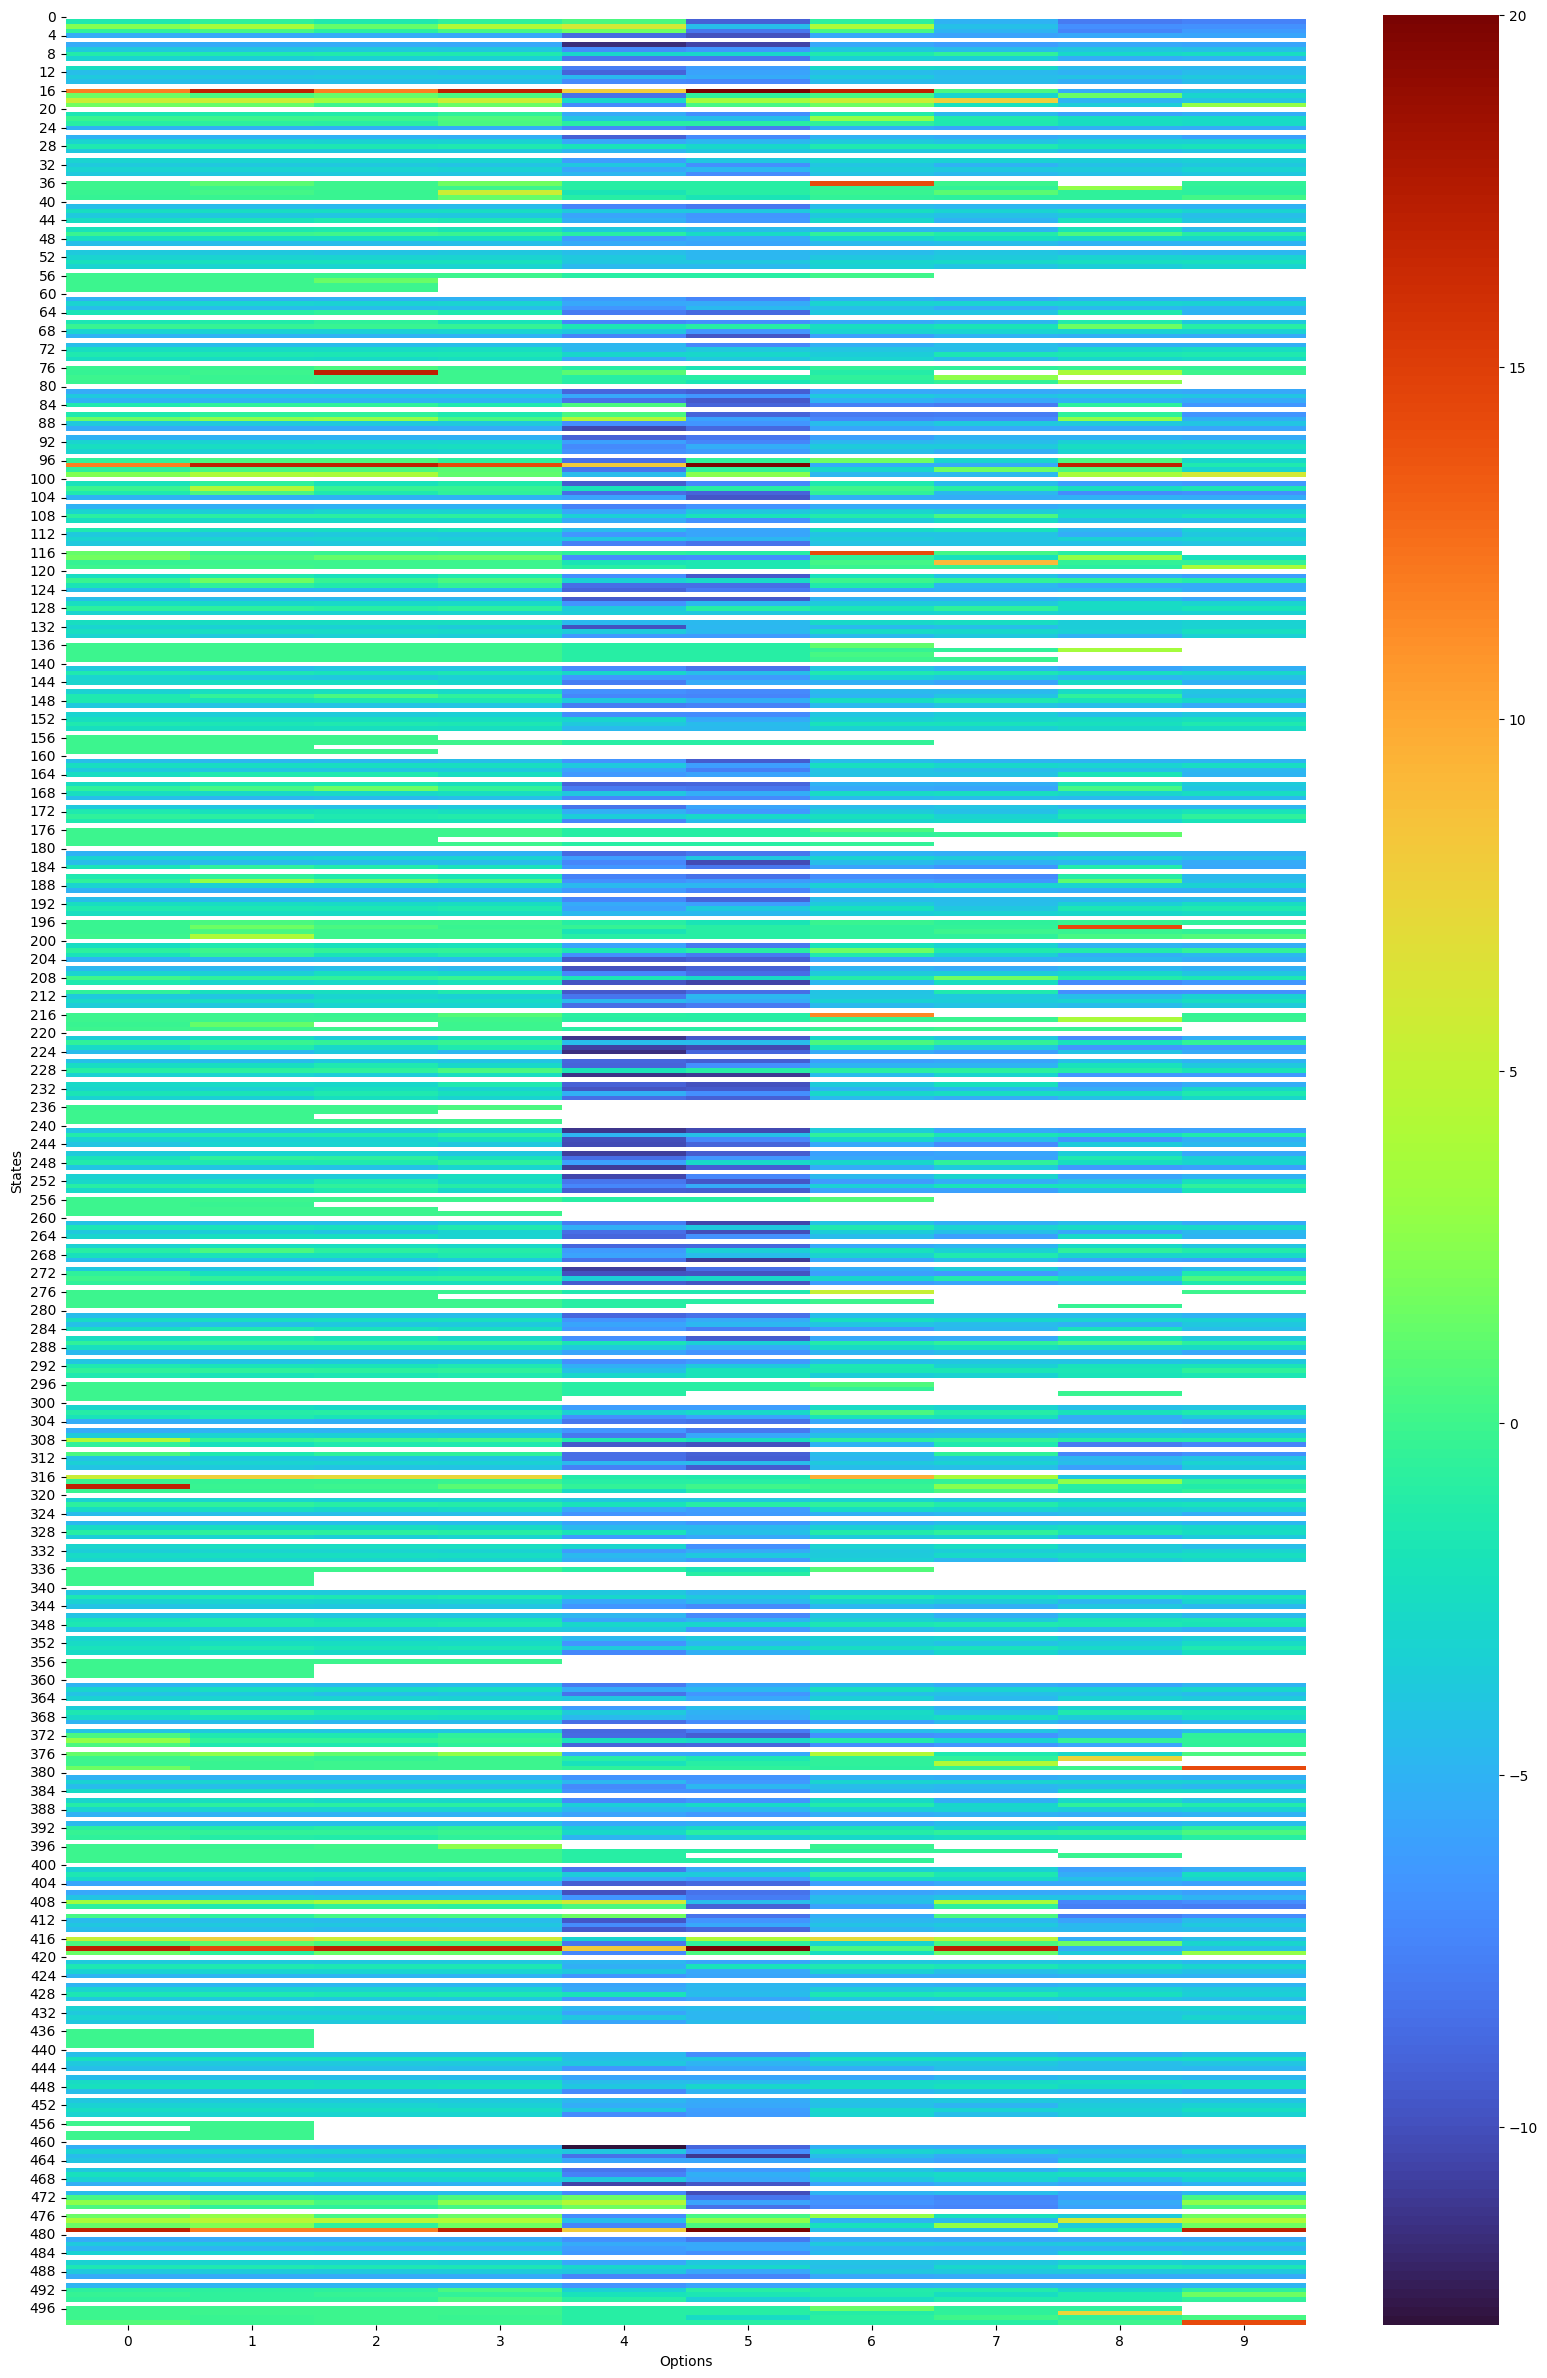

In [ ]:
fig, ax = plt.subplots(figsize=(20, 30))
cmap = plt.get_cmap('RdYlBu_r', np.max(reshaped_Q_matrix) - np.min(reshaped_Q_matrix) + 1)
sns.heatmap(reshaped_Q_matrix, ax=ax, cmap='turbo', mask=reshaped_Q_matrix == 0)
ax.set_xlabel('Options')
ax.set_ylabel('States')


/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search t

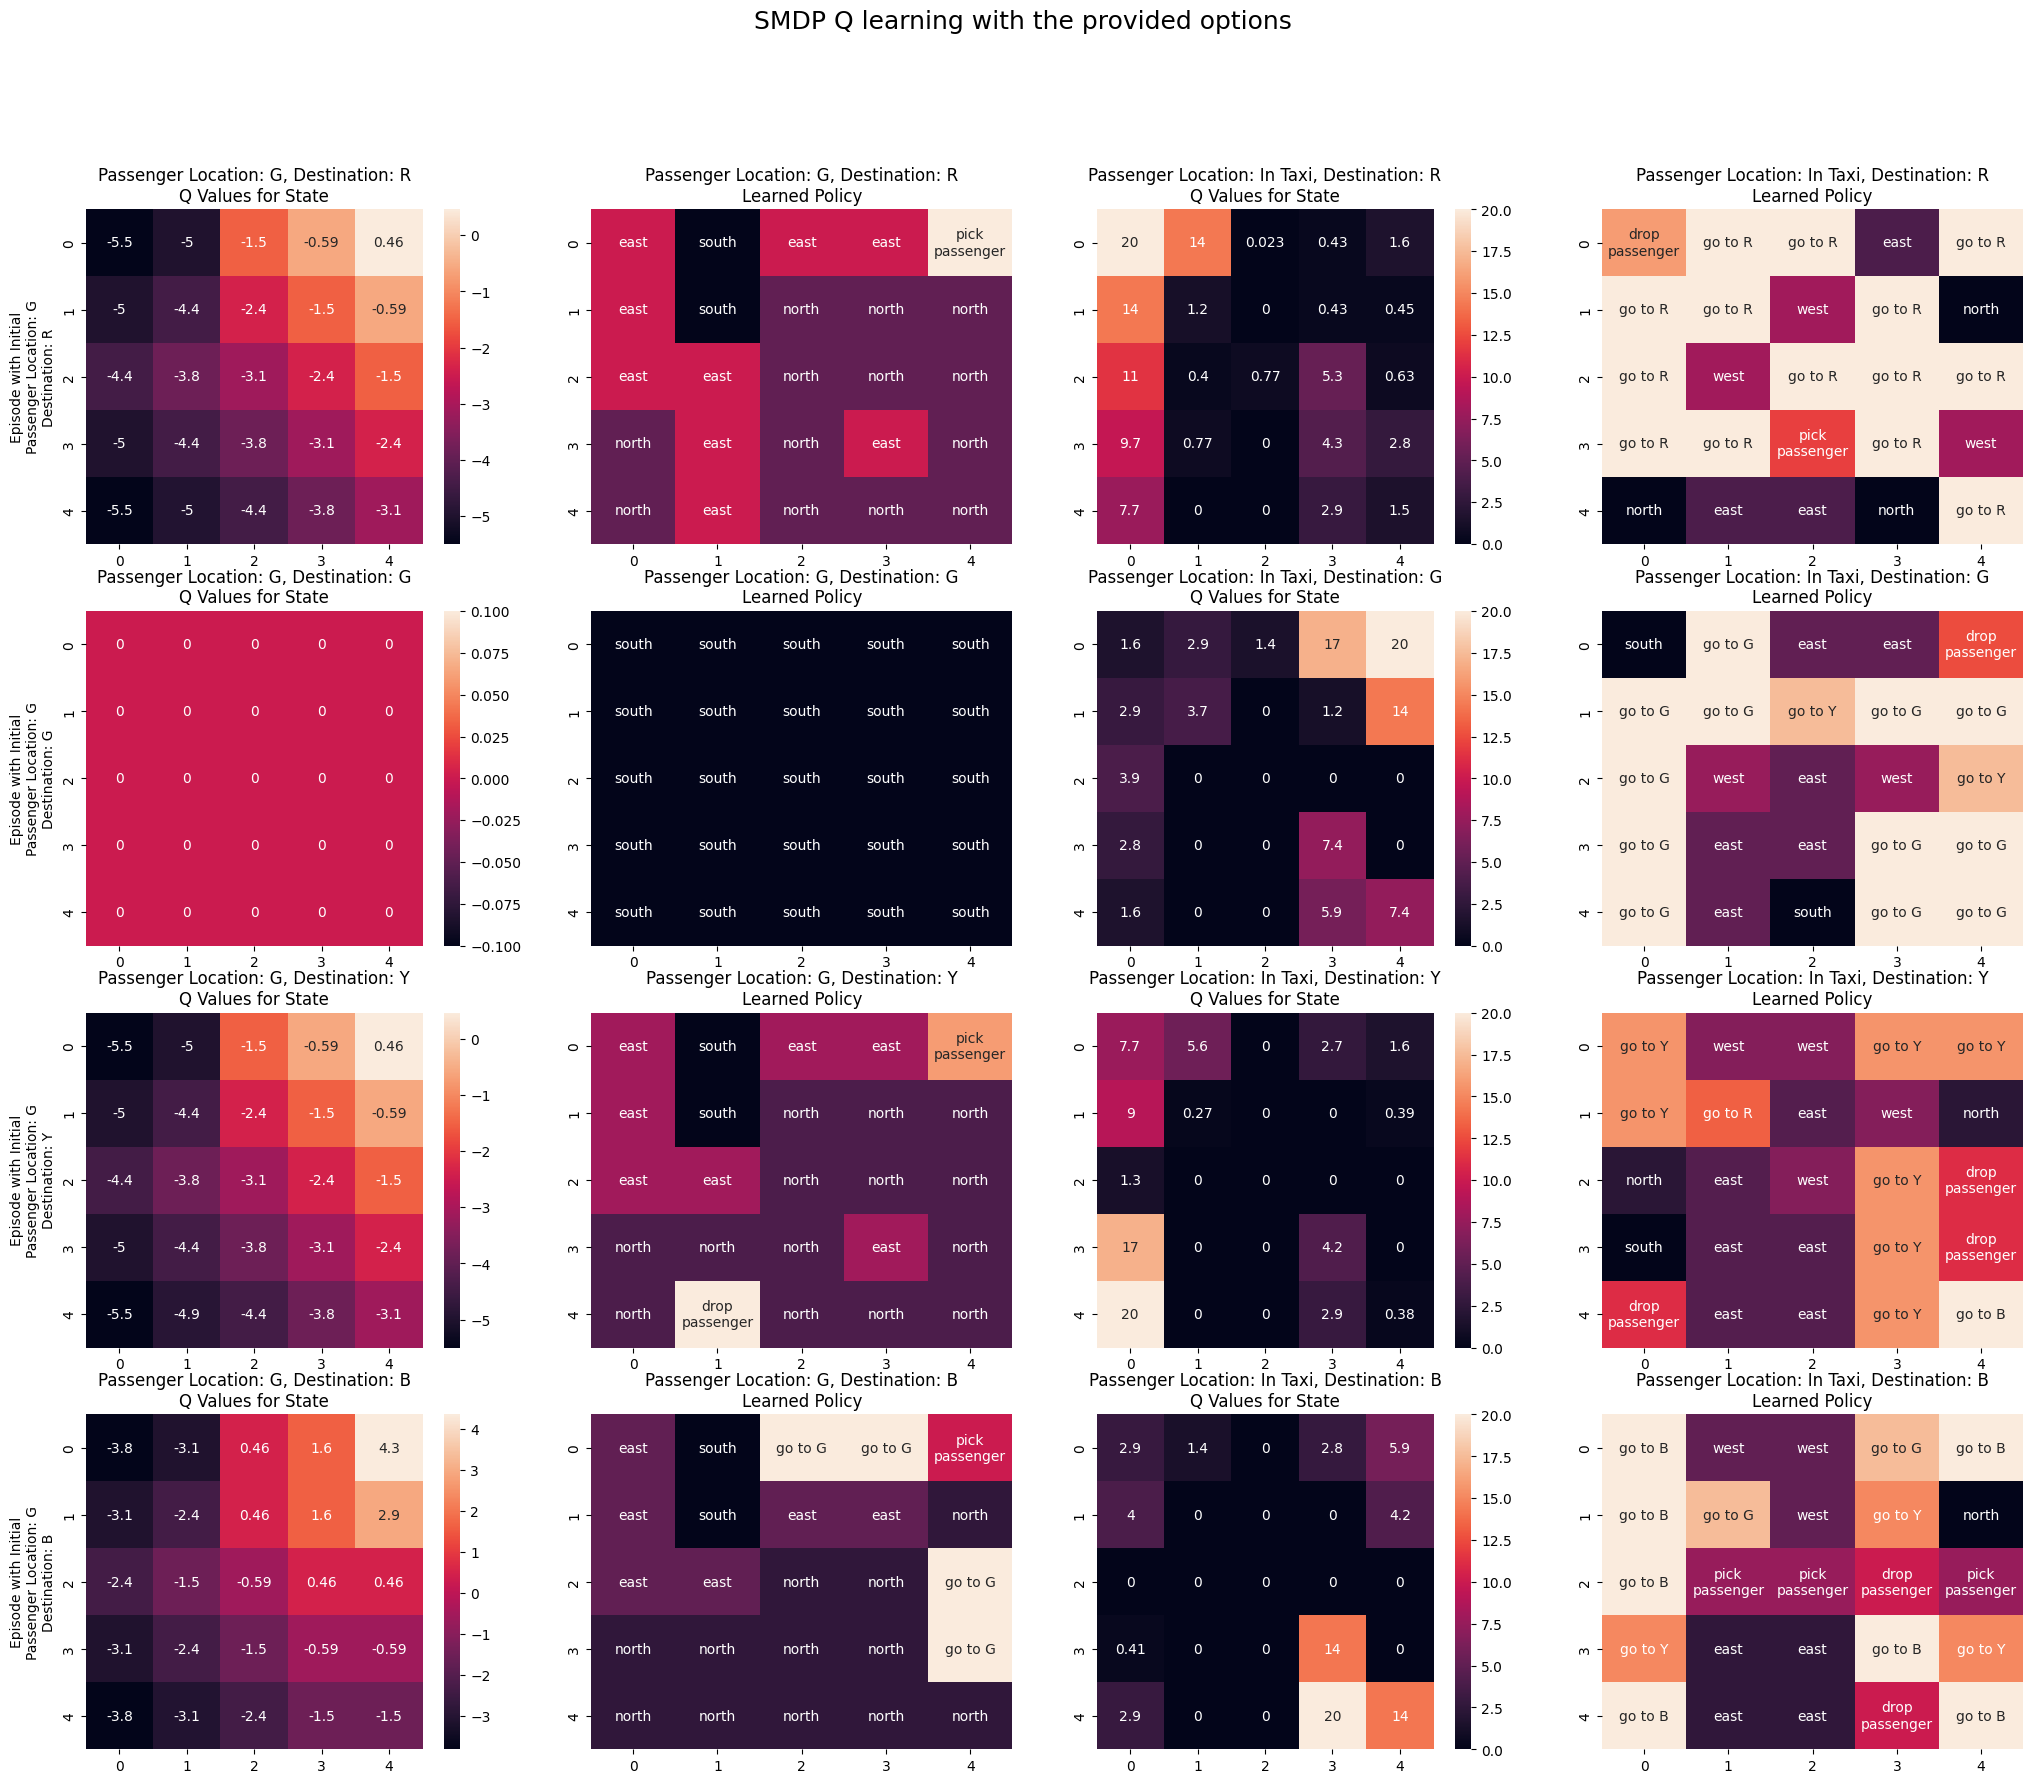

In [ ]:
# passenger outside taxi
idx = np.arange(20)

pass_loc = 1 # can be 0,1,2,3,4

id = idx[pass_loc*4:pass_loc*4 + 4]
id_in_taxi = idx[16:20]

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(25, 20))

plt.suptitle(f'SMDP Q learning with the provided options', fontsize=18)
for n, i in enumerate(id):
    # print(n,i)
    _, _, passenger_loc, destination = env.decode(i)
    # print("Final Q-Table:\n", argmax_Q_matrix[i::20].reshape(5,5))
    axs[n][0].set_title(f'Passenger Location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}\nQ Values for State')
    sns.heatmap(max_Q_matrix[i::20].reshape(5, 5), annot=True, ax=axs[n][0]).set(ylabel=f'Episode with Initial\nPassenger Location: {pass_map[passenger_loc]}\nDestination: {pass_map[destination]}')
    t = labeled_argmax_Q_matrix[i::20].reshape(5, 5)
    sns.heatmap(argmax_Q_matrix[i::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][1], cbar=False)
    axs[n][1].set_title(f'Passenger Location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}\nLearned Policy')

    axs[n][2].set_title(f'Passenger Location: In Taxi, Destination: {pass_map[destination]}\nQ Values for State')
    sns.heatmap(max_Q_matrix[id_in_taxi[n]::20].reshape(5, 5), annot=True, ax=axs[n][2])
    t = labeled_argmax_Q_matrix[id_in_taxi[n]::20].reshape(5, 5)
    sns.heatmap(argmax_Q_matrix[id_in_taxi[n]::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][3], cbar=False)
    axs[n][3].set_title(f'Passenger Location: In Taxi, Destination: {pass_map[destination]}\nLearned Policy')


/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search t

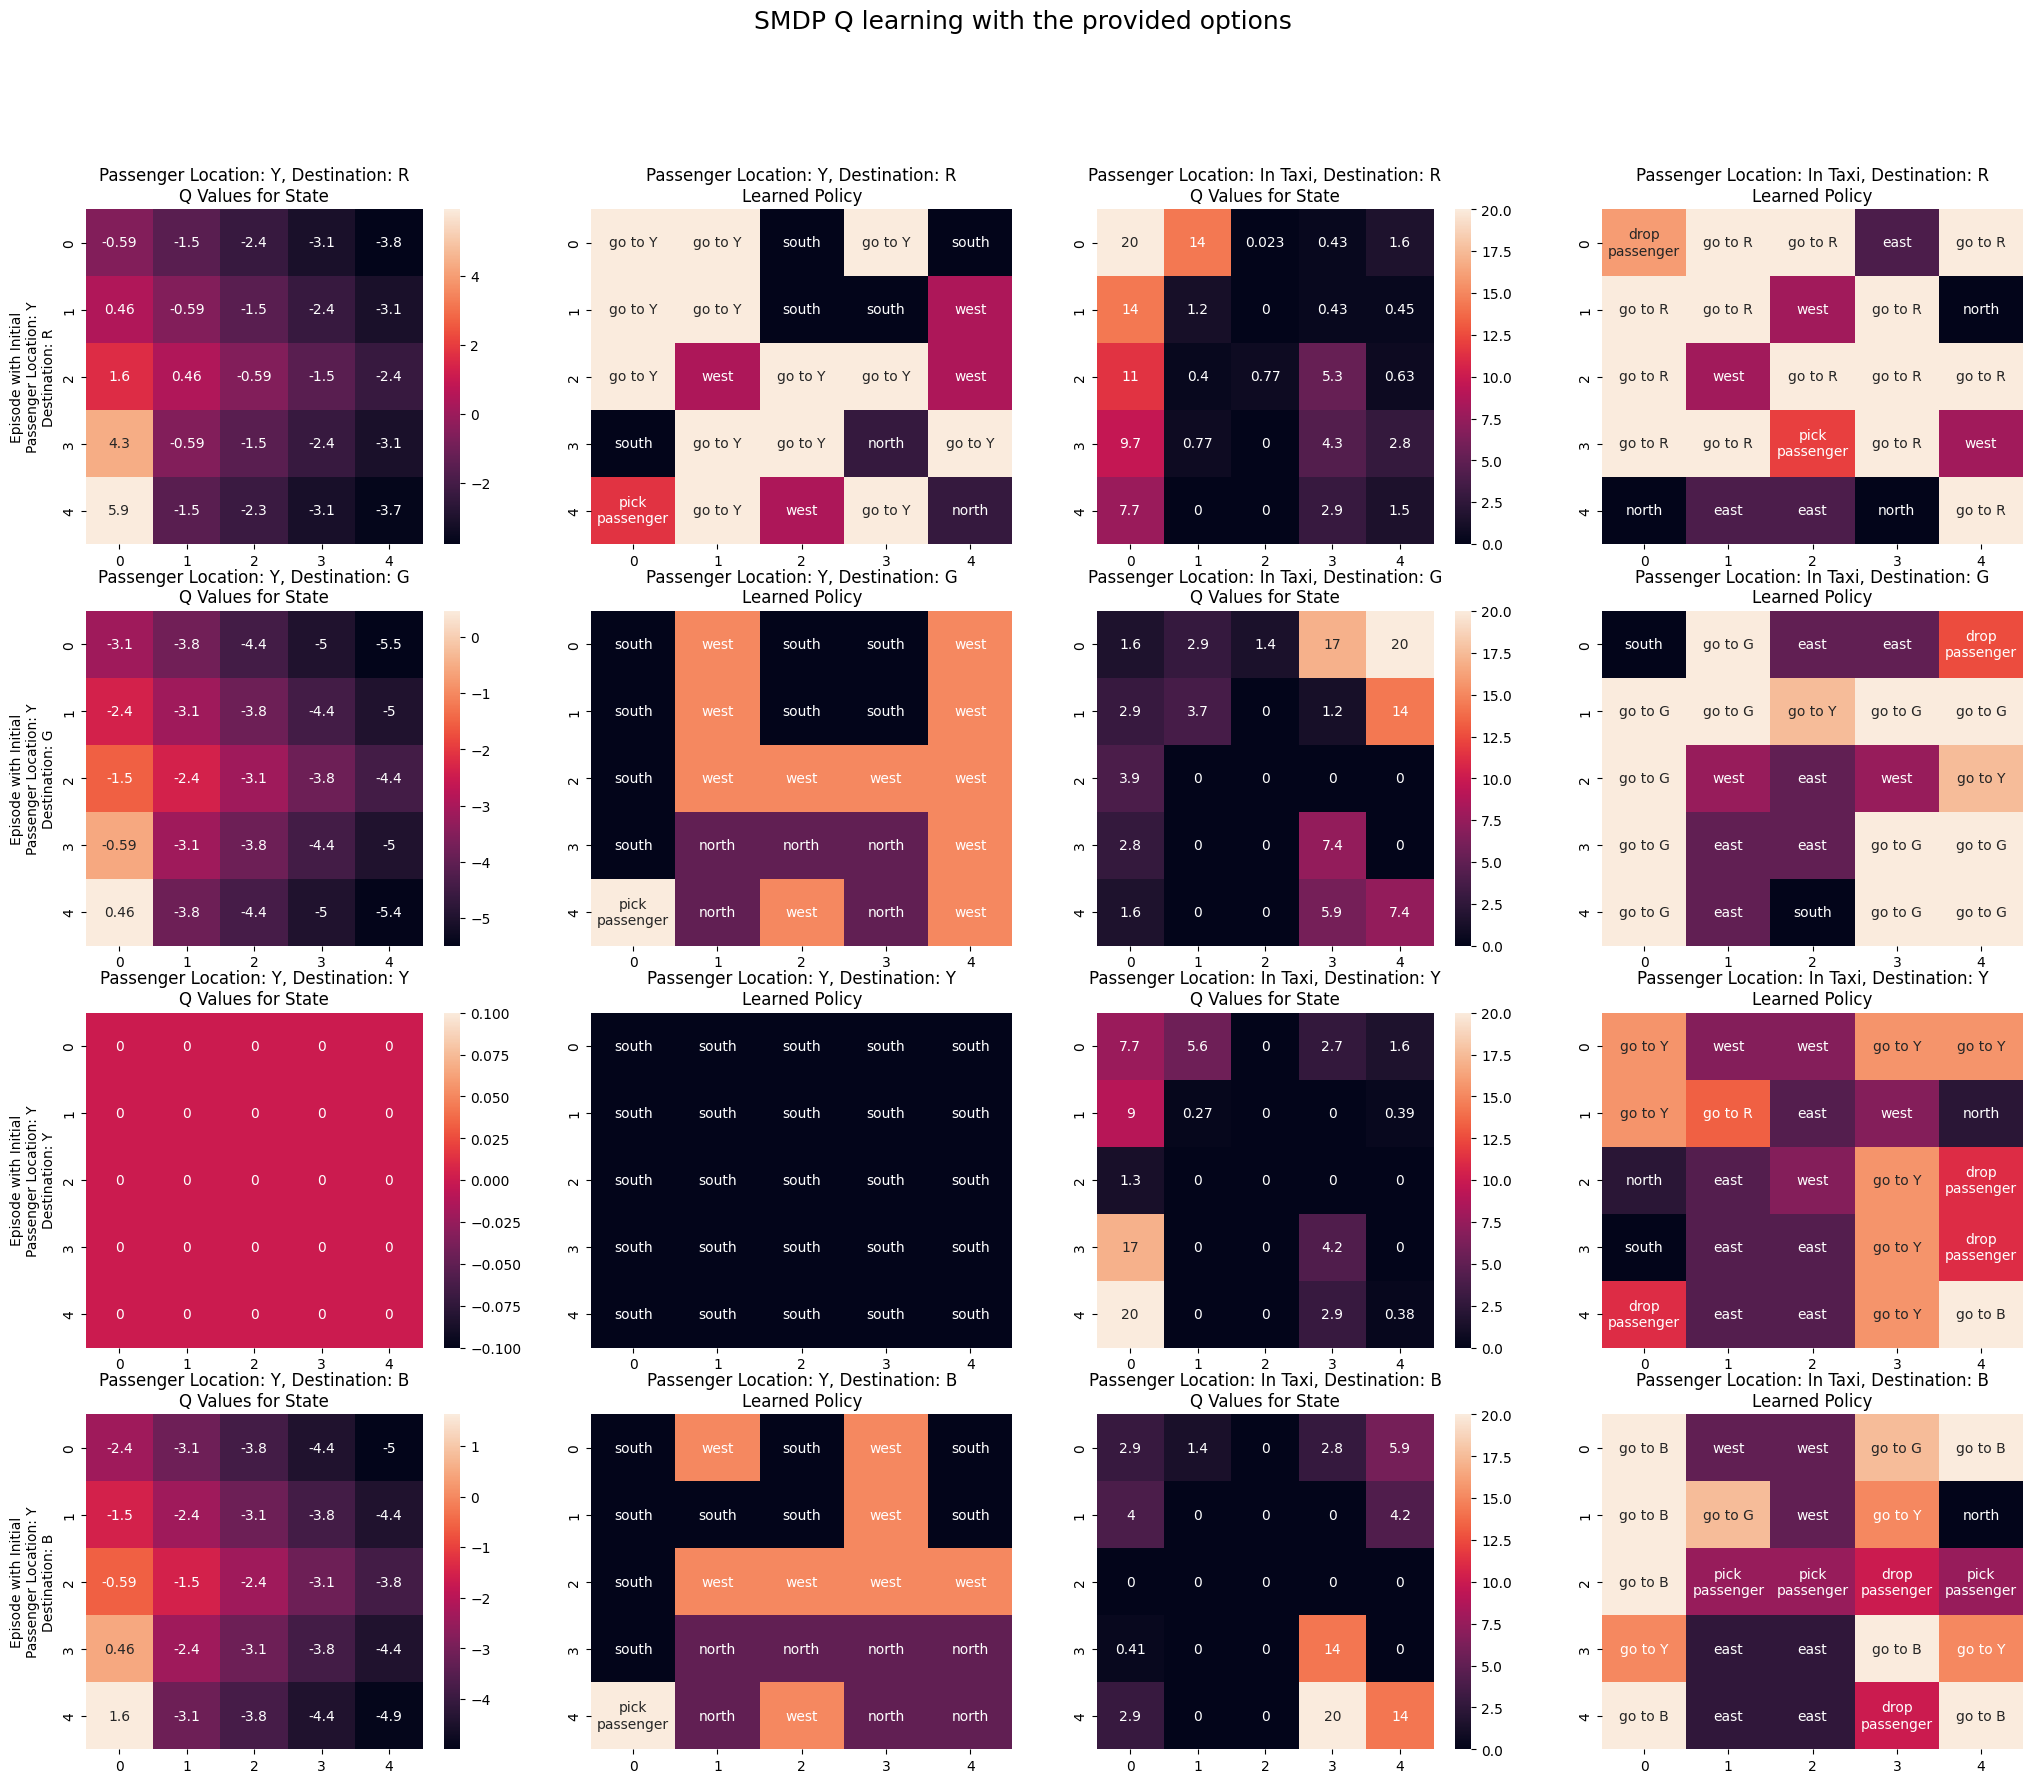

In [ ]:
# passenger outside taxi
idx = np.arange(20)

pass_loc = 2 # can be 0,1,2,3,4

id = idx[pass_loc*4:pass_loc*4 + 4]
id_in_taxi = idx[16:20]

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(25, 20))

plt.suptitle(f'SMDP Q learning with the provided options', fontsize=18)
for n, i in enumerate(id):
    # print(n,i)
    _, _, passenger_loc, destination = env.decode(i)
    # print("Final Q-Table:\n", argmax_Q_matrix[i::20].reshape(5,5))
    axs[n][0].set_title(f'Passenger Location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}\nQ Values for State')
    sns.heatmap(max_Q_matrix[i::20].reshape(5, 5), annot=True, ax=axs[n][0]).set(ylabel=f'Episode with Initial\nPassenger Location: {pass_map[passenger_loc]}\nDestination: {pass_map[destination]}')
    t = labeled_argmax_Q_matrix[i::20].reshape(5, 5)
    sns.heatmap(argmax_Q_matrix[i::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][1], cbar=False)
    axs[n][1].set_title(f'Passenger Location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}\nLearned Policy')

    axs[n][2].set_title(f'Passenger Location: In Taxi, Destination: {pass_map[destination]}\nQ Values for State')
    sns.heatmap(max_Q_matrix[id_in_taxi[n]::20].reshape(5, 5), annot=True, ax=axs[n][2])
    t = labeled_argmax_Q_matrix[id_in_taxi[n]::20].reshape(5, 5)
    sns.heatmap(argmax_Q_matrix[id_in_taxi[n]::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][3], cbar=False)
    axs[n][3].set_title(f'Passenger Location: In Taxi, Destination: {pass_map[destination]}\nLearned Policy')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will

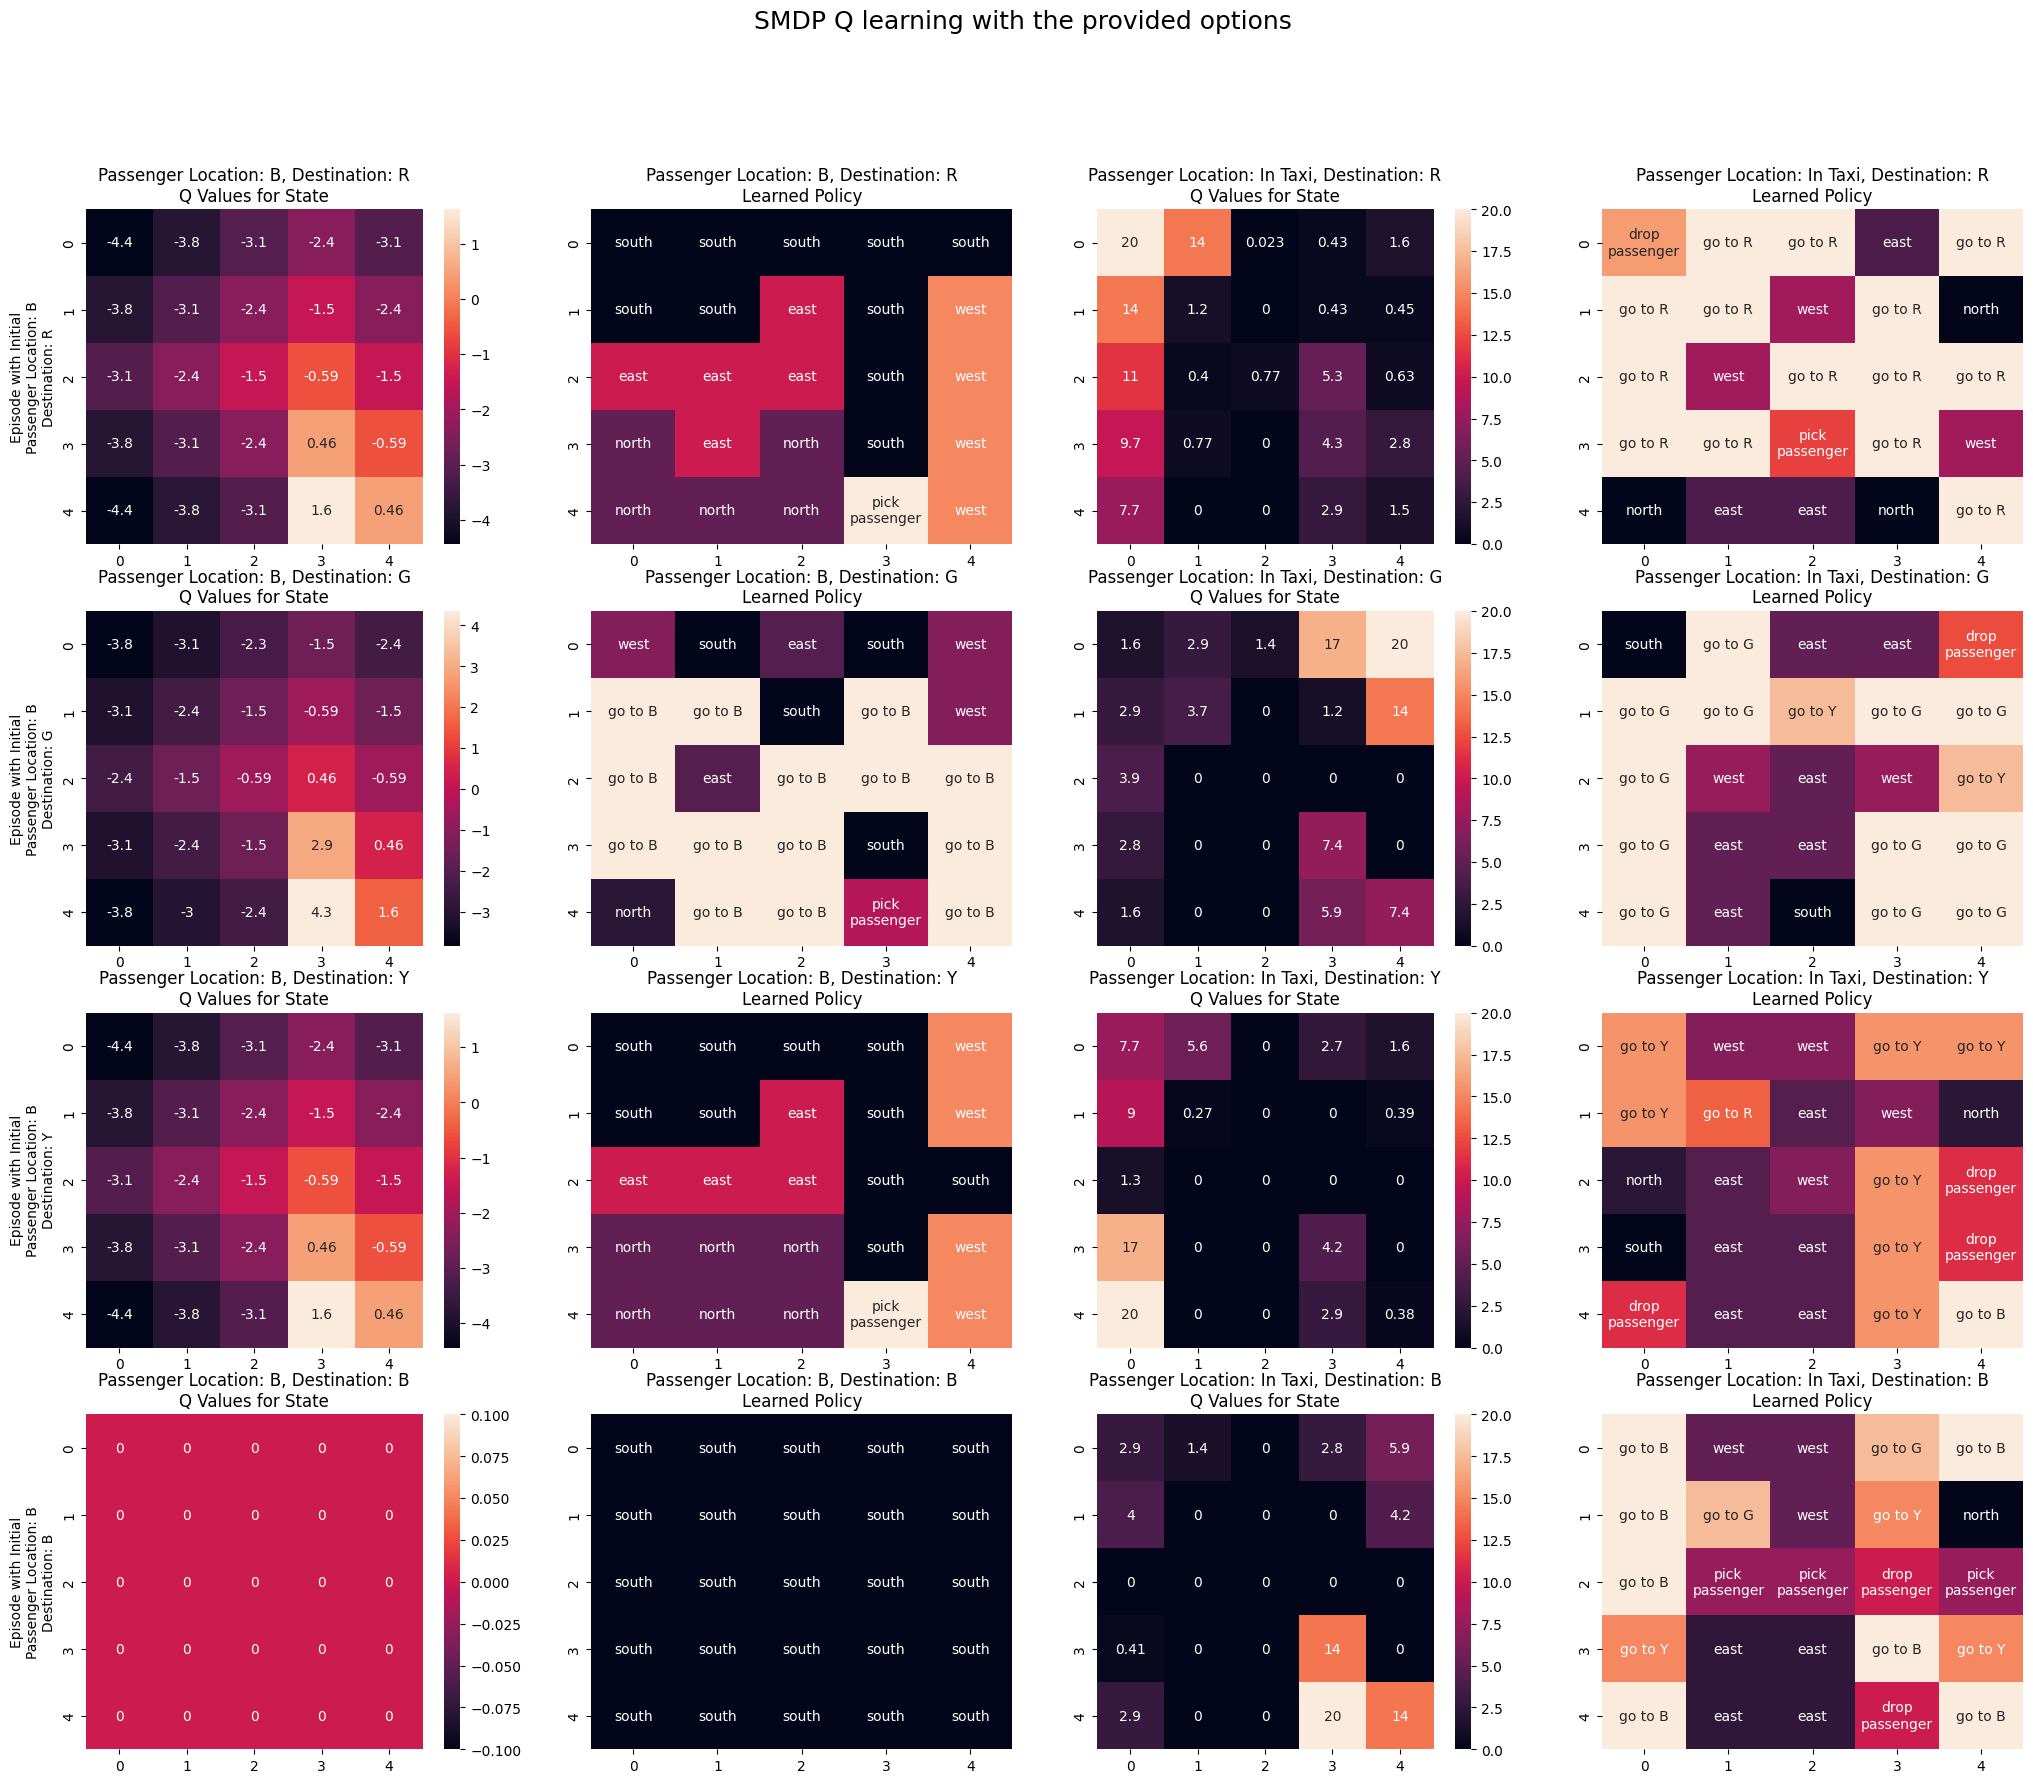

In [ ]:
# passenger outside taxi
idx = np.arange(20)

pass_loc = 3 # can be 0,1,2,3,4

id = idx[pass_loc*4:pass_loc*4 + 4]
id_in_taxi = idx[16:20]

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(25, 20))

plt.suptitle(f'SMDP Q learning with the provided options', fontsize=18)
for n, i in enumerate(id):
    # print(n,i)
    _, _, passenger_loc, destination = env.decode(i)
    # print("Final Q-Table:\n", argmax_Q_matrix[i::20].reshape(5,5))
    axs[n][0].set_title(f'Passenger Location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}\nQ Values for State')
    sns.heatmap(max_Q_matrix[i::20].reshape(5, 5), annot=True, ax=axs[n][0]).set(ylabel=f'Episode with Initial\nPassenger Location: {pass_map[passenger_loc]}\nDestination: {pass_map[destination]}')
    t = labeled_argmax_Q_matrix[i::20].reshape(5, 5)
    sns.heatmap(argmax_Q_matrix[i::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][1], cbar=False)
    axs[n][1].set_title(f'Passenger Location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}\nLearned Policy')

    axs[n][2].set_title(f'Passenger Location: In Taxi, Destination: {pass_map[destination]}\nQ Values for State')
    sns.heatmap(max_Q_matrix[id_in_taxi[n]::20].reshape(5, 5), annot=True, ax=axs[n][2])
    t = labeled_argmax_Q_matrix[id_in_taxi[n]::20].reshape(5, 5)
    sns.heatmap(argmax_Q_matrix[id_in_taxi[n]::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][3], cbar=False)
    axs[n][3].set_title(f'Passenger Location: In Taxi, Destination: {pass_map[destination]}\nLearned Policy')


## IOQL



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Intra Option Q Learning with the given options

In [ ]:
#Q-Table: (States x Actions) === (env.ns(48) x total actions(6))
q_values_IOQL = np.zeros((500,10))

#Update_Frequency Data structure? Check TODO 4
update_freq_IOQL = np.zeros((500,10))


#### Intra-Option Q-Learning

# At every step, the state-action value for the
# primitive action as well as the state-action value
# for all options that would have selected the same
# action are updated, regardless of the option in
# effect.

# Since option 4(away) and 5(close) have different
# action policy, we won't have to update state-action
# values for another option when one occurs.

# But we still have to update for the primitive actions

# Add parameters you might need here
gamma = 0.9

# lr
alpha = 0.1

rewards_IOQL = []

n_eps = 30000

max_eps = 0.1
eps_decay=1
eps_min=0.01

eps = max_eps
# Iterate over 1000 episodes
for episode in tqdm(range(n_eps)):
    total_rewards = 0
    state = env.reset()[0] # get the initial state
    done = False # while not terminating step

    # While episode is not over
    while not done:

        # Choose action
        action = egreedy_policy(q_values_IOQL, state, epsilon=min(eps_min, eps))
        eps *= eps_decay
        # Checking if primitive action
        if action < 6:
            # Perform regular Q-Learning update for state-action pair
            next_state, reward, done, _, _ = env.step(action)
            total_rewards += reward
            # store in Q table and update frequency table

            ##############################
            # Usual Q-Learning update rule
            q_values_IOQL[state][action] += alpha * (reward + gamma * np.max(q_values_IOQL[next_state]) - q_values_IOQL[state][action])
            ##############################
            ##############################
            # update frequency
            update_freq_IOQL[state][action] += 1
            ##############################
            state = next_state


        # Checking if action chosen is an option
        reward_bar = 0
        if action == 6: # action => go_to_R option
            optdone = False
            while (optdone == False and not done):

                optact, optdone = go_to_R(env, state) # away option
                next_state, reward, done, _, _ = env.step(optact)
                # total_reward += reward

                ##############################
                # update for primitive action
                q_values_IOQL[state][optact] += alpha * (reward + gamma * np.max(q_values_IOQL[next_state]) - q_values_IOQL[state][optact])
                update_freq_IOQL[state][optact] += 1
                ##############################

                ##############################
                # update for option
                q_values_IOQL[state][action] += alpha * (reward + gamma * ((optdone) * np.max(q_values_IOQL[next_state]) + (1-optdone) * (q_values_IOQL[next_state][action])) - q_values_IOQL[state][action])
                update_freq_IOQL[state][action] += 1
                ##############################

                # other option having similar action policy, we would update that option here
                taxi_row, taxi_col, passenger_index, destination_index = env.decode(state)
                if(taxi_col) > 0:
                    q_values_IOQL[state][7] += alpha * (reward + gamma * np.max(q_values_IOQL[next_state]) - q_values_IOQL[state][7])
                    update_freq_IOQL[state][7] += 1

                state = next_state
                reward_bar += gamma*reward
            total_rewards += reward_bar

        if action == 7: # action => go_to_Y option
            optdone = False
            while (optdone == False and not done):

                # Think about what this function might do?
                optact, optdone = go_to_Y(env, state) # close option
                next_state, reward, done, _, _ = env.step(optact)
                # total_reward += reward

                ##############################
                # update for primitive action
                q_values_IOQL[state][optact] += alpha * (reward + gamma * np.max(q_values_IOQL[next_state]) - q_values_IOQL[state][optact])
                update_freq_IOQL[state][optact] += 1
                ##############################

                ##############################
                # update for option
                q_values_IOQL[state][action] += alpha * (reward + gamma * ((optdone) * np.max(q_values_IOQL[next_state]) + (1-optdone) * (q_values_IOQL[next_state][action])) - q_values_IOQL[state][action])
                update_freq_IOQL[state][action] += 1
                ##############################

                # other option having similar action policy, we would update that option here
                taxi_row, taxi_col, passenger_index, destination_index = env.decode(state)
                if(taxi_col) > 0:
                    q_values_IOQL[state][6] += alpha * (reward + gamma * np.max(q_values_IOQL[next_state]) - q_values_IOQL[state][6])
                    update_freq_IOQL[state][6] += 1

                state = next_state
                reward_bar += gamma*reward
            total_rewards += reward_bar

        if action == 8: # action => go_to_G option
            optdone = False
            while (optdone == False and not done):

                # Think about what this function might do?
                optact, optdone = go_to_G(env, state) # close option
                next_state, reward, done, _, _ = env.step(optact)
                # total_reward += reward

                ##############################
                # update for primitive action
                q_values_IOQL[state][optact] += alpha * (reward + gamma * np.max(q_values_IOQL[next_state]) - q_values_IOQL[state][optact])
                update_freq_IOQL[state][optact] += 1
                ##############################

                ##############################
                # update for option
                q_values_IOQL[state][action] += alpha * (reward + gamma * ((optdone) * np.max(q_values_IOQL[next_state]) + (1-optdone) * (q_values_IOQL[next_state][action])) - q_values_IOQL[state][action])
                update_freq_IOQL[state][action] += 1
                ##############################

                # other option having similar action policy, we would update that option here
                taxi_row, taxi_col, passenger_index, destination_index = env.decode(state)
                if(taxi_col) < 3:
                    q_values_IOQL[state][9] += alpha * (reward + gamma * np.max(q_values_IOQL[next_state]) - q_values_IOQL[state][9])
                    update_freq_IOQL[state][9] += 1

                state = next_state
                reward_bar += gamma*reward
            total_rewards += reward_bar

        if action == 9: # action => go_to_B option
            optdone = False
            while (optdone == False and not done):

                # Think about what this function might do?
                optact, optdone = go_to_B(env, state) # close option
                next_state, reward, done, _, _ = env.step(optact)
                # total_reward += reward

                ##############################
                # update for primitive action
                q_values_IOQL[state][optact] += alpha * (reward + gamma * np.max(q_values_IOQL[next_state]) - q_values_IOQL[state][optact])
                update_freq_IOQL[state][optact] += 1
                ##############################

                ##############################
                # update for option
                q_values_IOQL[state][action] += alpha * (reward + gamma * ((optdone) * np.max(q_values_IOQL[next_state]) + (1-optdone) * (q_values_IOQL[next_state][action])) - q_values_IOQL[state][action])
                update_freq_IOQL[state][action] += 1
                ##############################

                # other option having similar action policy, we would update that option here
                taxi_row, taxi_col, passenger_index, destination_index = env.decode(state)
                if(taxi_col) < 3:
                    q_values_IOQL[state][8] += alpha * (reward + gamma * np.max(q_values_IOQL[next_state]) - q_values_IOQL[state][8])
                    update_freq_IOQL[state][8] += 1

                state = next_state
                reward_bar += gamma*reward
            total_rewards += reward_bar

    rewards_IOQL.append(total_rewards)

  0%|          | 0/30000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
100%|██████████| 30000/30000 [00:34<00:00, 877.06it/s] 


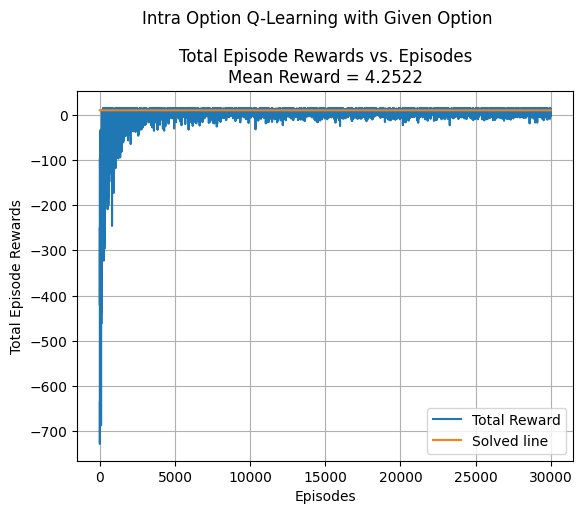

In [ ]:
plt.plot(np.arange(n_eps), rewards_IOQL, label='Total Reward')
plt.title(f'Total Episode Rewards vs. Episodes\nMean Reward = {np.mean(rewards_IOQL):.4f}')
plt.suptitle('Intra Option Q-Learning with Given Option', y=1.05)
plt.plot(np.arange(n_eps), [9.7] * n_eps, label='Solved line')
plt.xlabel('Episodes')
plt.ylabel('Total Episode Rewards')
plt.grid()
plt.legend()


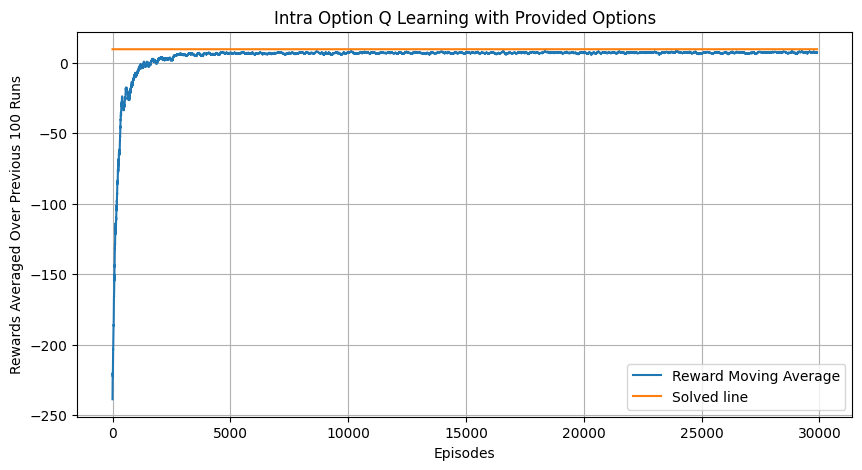

In [ ]:
plt.figure(figsize=(10, 5))
avg_rews0 = [np.average(rewards_IOQL[i:i+100]) for i in range(len(rewards_IOQL)-100)]
plt.plot(avg_rews0, label='Reward Moving Average')
plt.plot([9.7 for _ in range(len(avg_rews0))], label='Solved line')
plt.xlabel('Episodes')
plt.ylabel('Rewards Averaged Over Previous 100 Runs')
plt.title('Intra Option Q Learning with Provided Options')
plt.legend()
plt.grid()


In [ ]:
# Total Actions :["up", "right", "down", "left", "Away", "Close"]

reshaped_IOQL_matrix = q_values_IOQL.reshape(500, 10)
argmax_IOQL_matrix = np.argmax(reshaped_IOQL_matrix, axis=-1)
max_IOQL_matrix = np.max(reshaped_IOQL_matrix, axis=-1)
labeled_argmax_IOQL_matrix = np.vectorize(opt_map.get)(argmax_IOQL_matrix)

Text(220.72222222222223, 0.5, 'states')

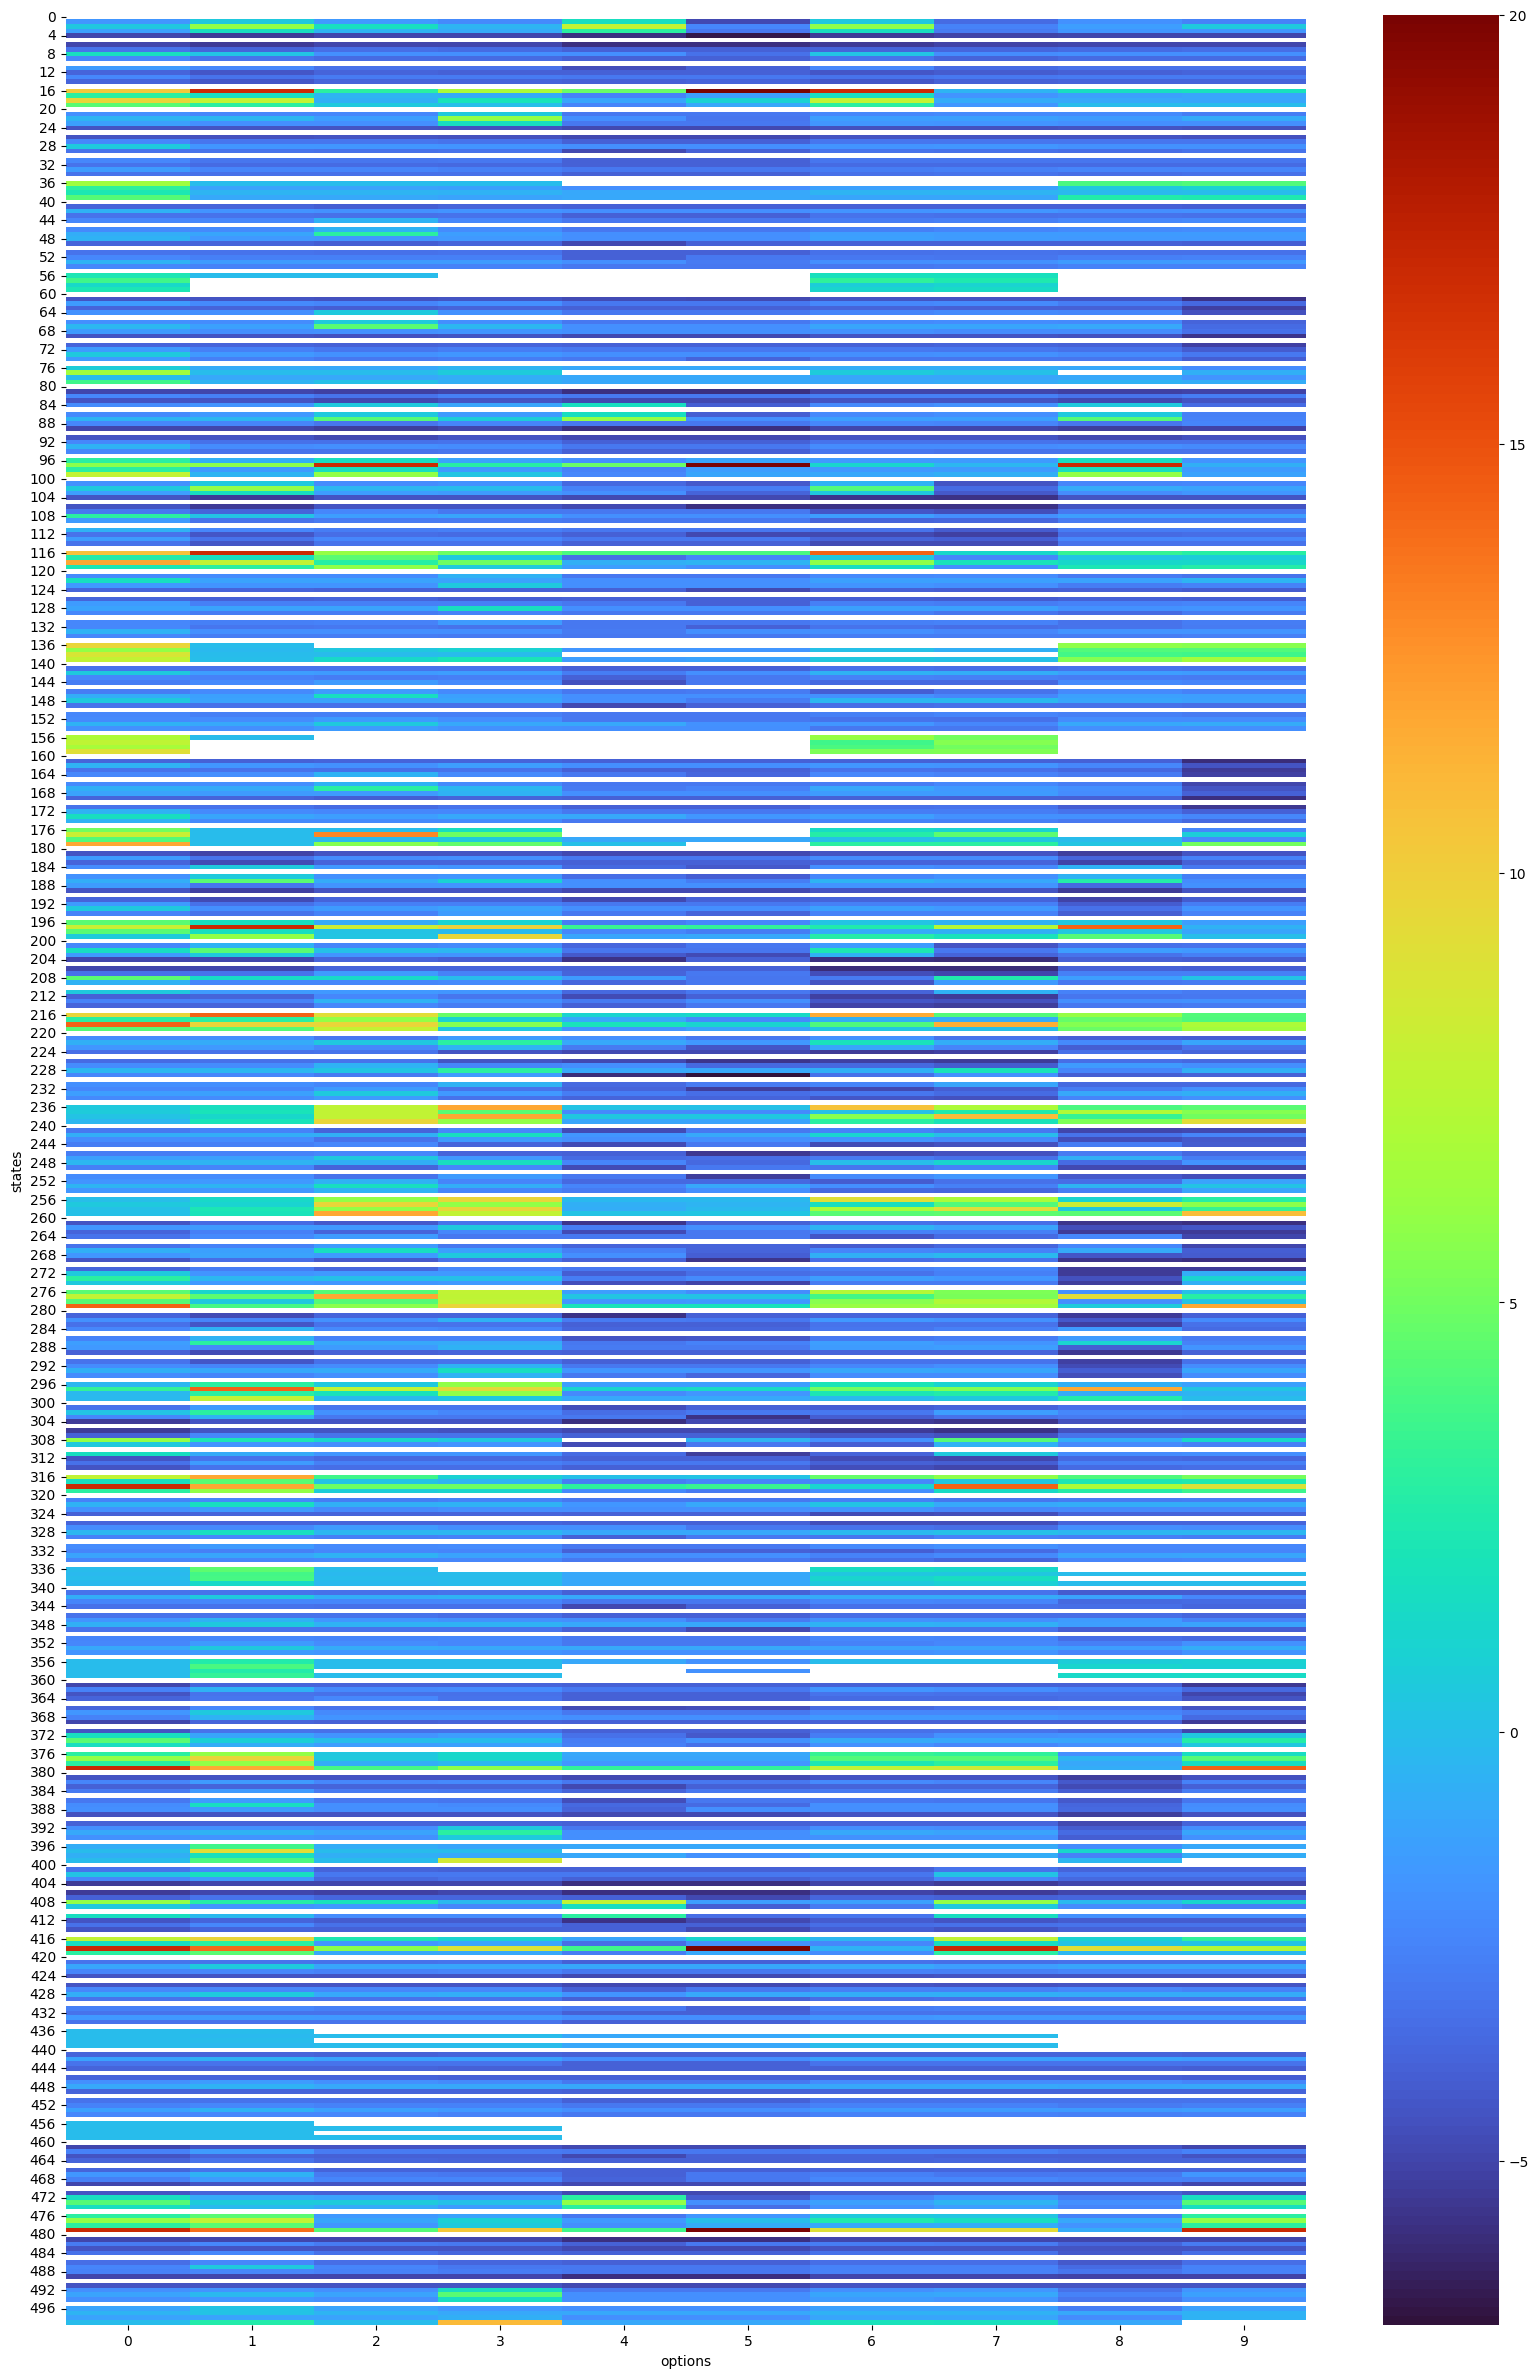

In [ ]:
fig, ax = plt.subplots(figsize=(20,30))
sns.heatmap(reshaped_IOQL_matrix, ax=ax, cmap='turbo', mask=reshaped_IOQL_matrix==0)
ax.set_xlabel('options')
ax.set_ylabel('states')

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search t

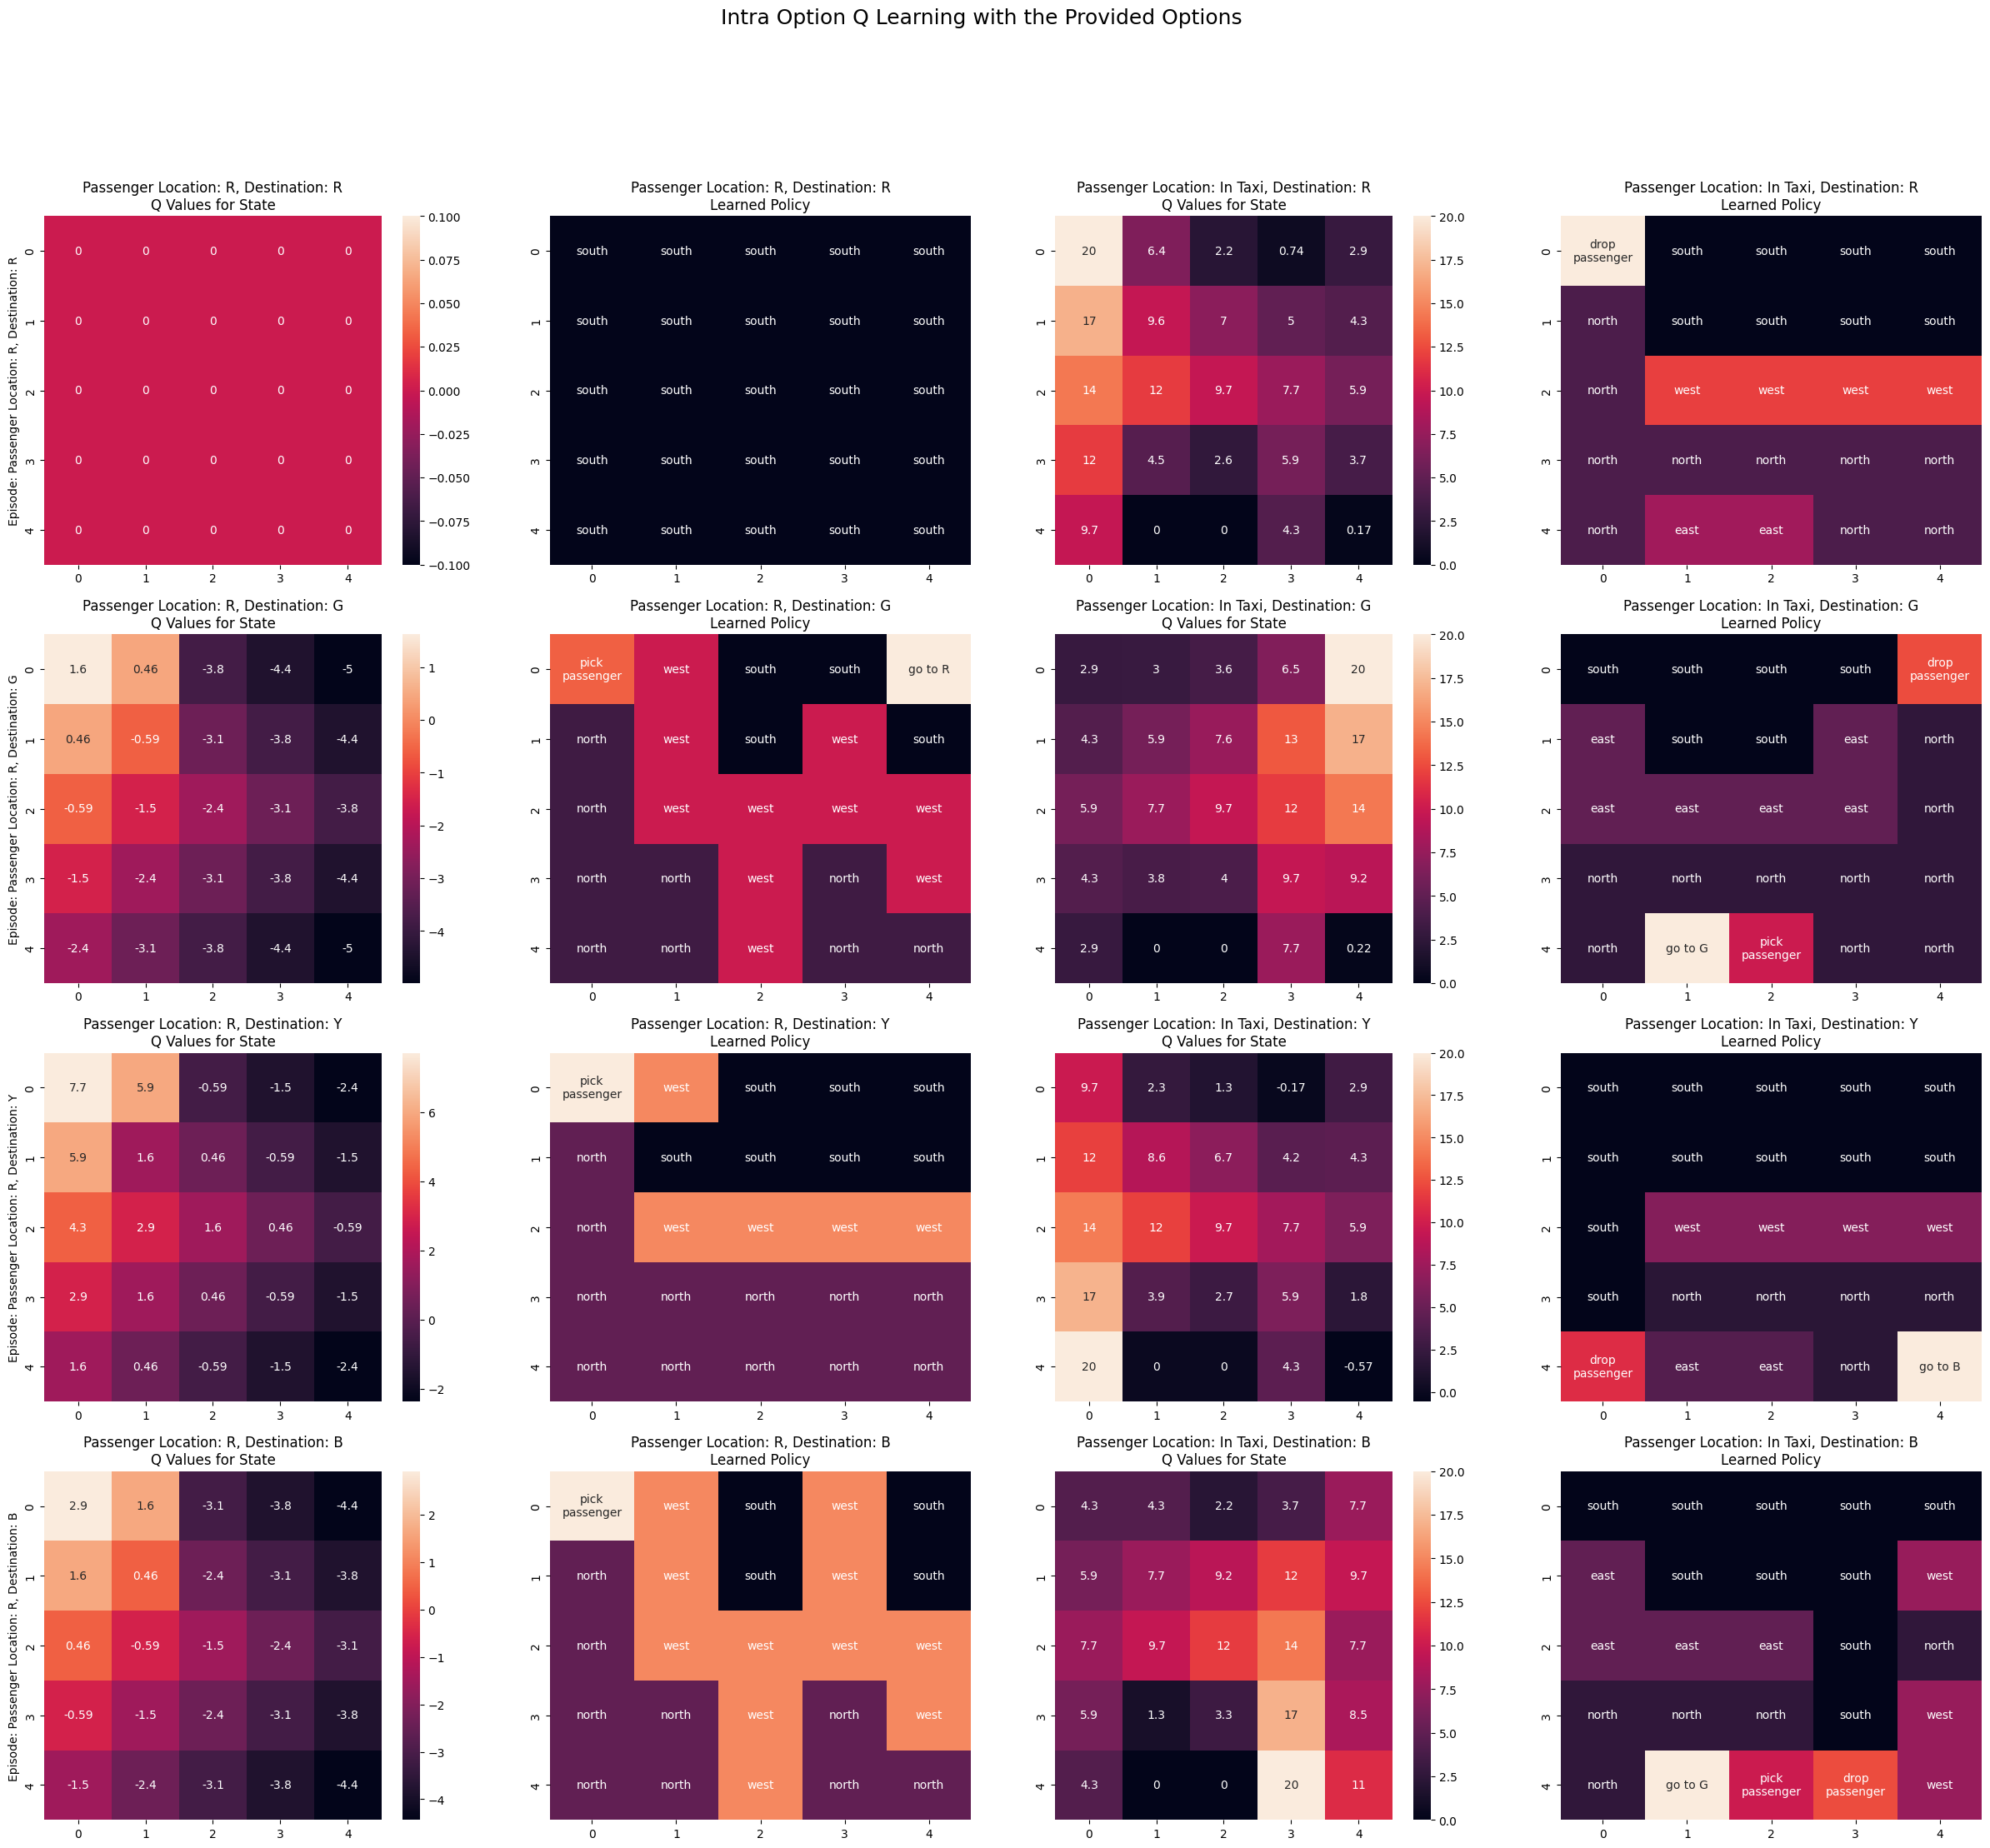

In [ ]:
# Passenger outside taxi
idx = np.arange(20)

pass_loc = 0  # Can be 0, 1, 2, 3, 4

id = idx[pass_loc * 4:pass_loc * 4 + 4]
id_in_taxi = idx[16:20]

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(30, 25))

plt.suptitle('Intra Option Q Learning with the Provided Options', fontsize=18)
for n, i in enumerate(id):
    _, _, passenger_loc, destination = env.decode(i)
    axs[n][0].set_title(f'Passenger Location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}\nQ Values for State')
    sns.heatmap(max_IOQL_matrix[i::20].reshape(5, 5), annot=True, ax=axs[n][0]).set(ylabel=f'Episode: Passenger Location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}')
    t = labeled_argmax_IOQL_matrix[i::20].reshape(5, 5)
    sns.heatmap(argmax_IOQL_matrix[i::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][1], cbar=False)
    axs[n][1].set_title(f'Passenger Location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}\nLearned Policy')

    axs[n][2].set_title(f'Passenger Location: In Taxi, Destination: {pass_map[destination]}\nQ Values for State')
    sns.heatmap(max_IOQL_matrix[id_in_taxi[n]::20].reshape(5, 5), annot=True, ax=axs[n][2])
    t = labeled_argmax_IOQL_matrix[id_in_taxi[n]::20].reshape(5, 5)
    sns.heatmap(argmax_IOQL_matrix[id_in_taxi[n]::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][3], cbar=False)
    axs[n][3].set_title(f'Passenger Location: In Taxi, Destination: {pass_map[destination]}\nLearned Policy')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will

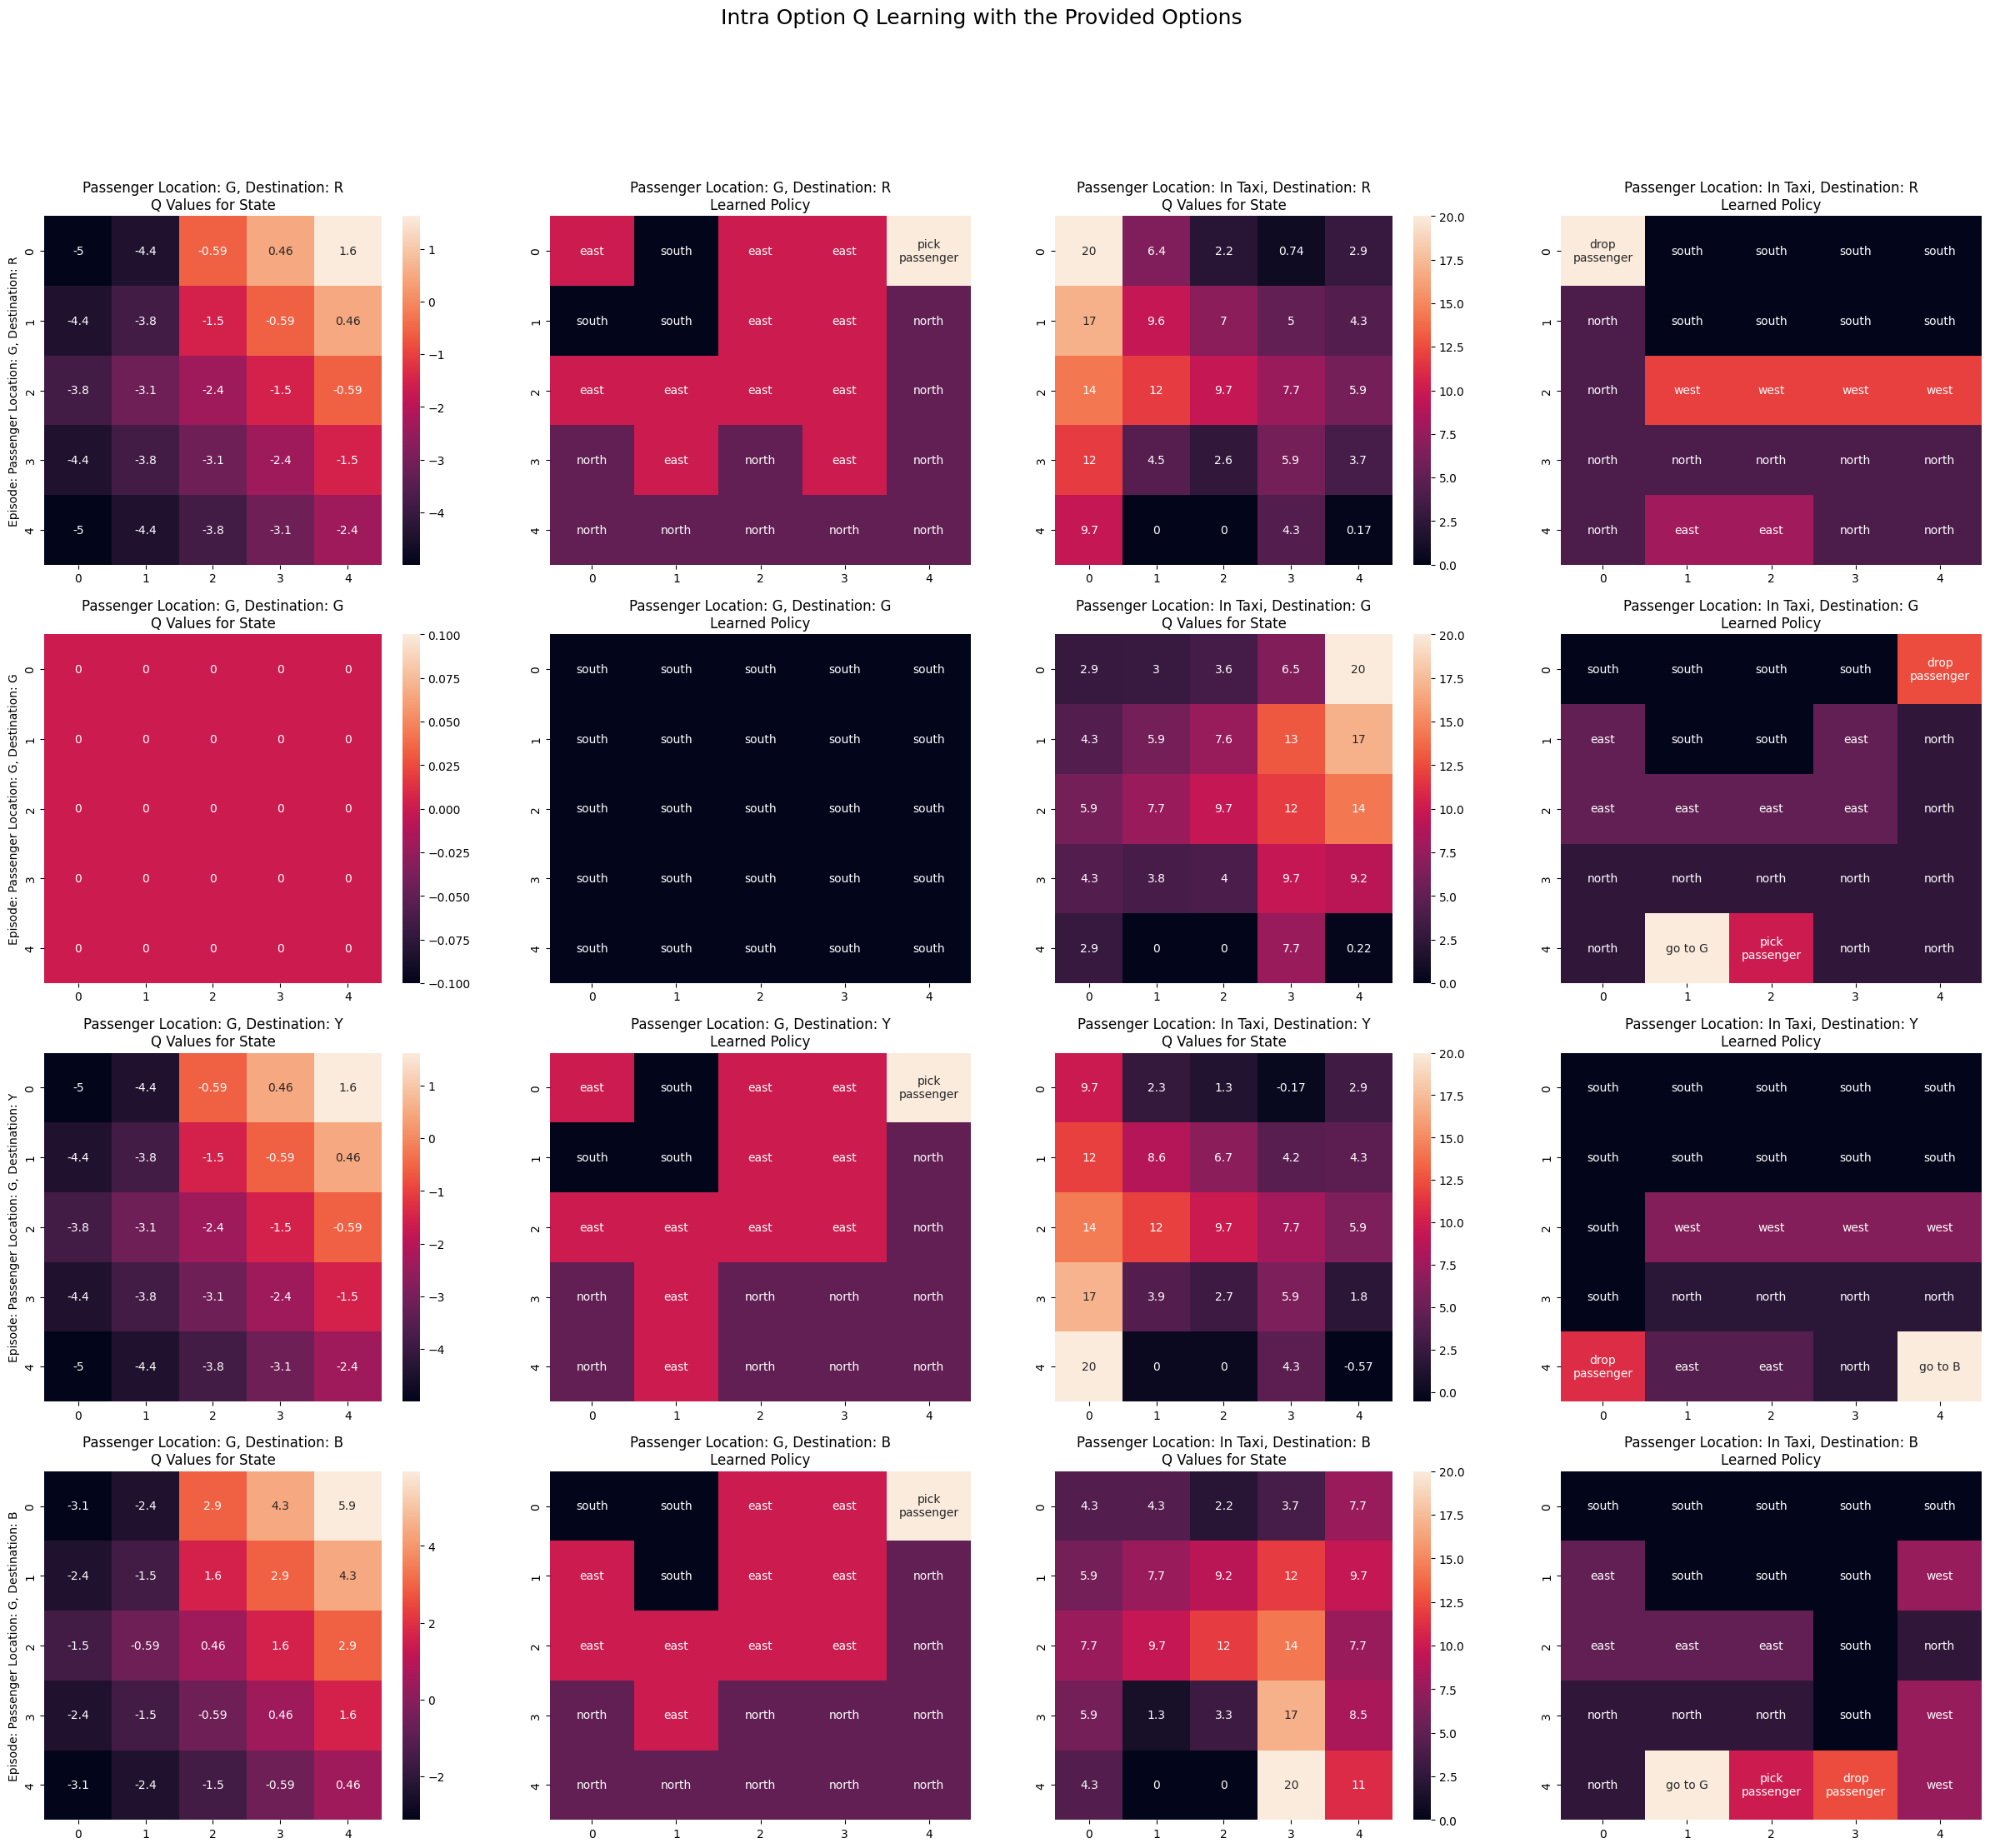

In [ ]:
# Passenger outside taxi
idx = np.arange(20)

pass_loc = 1  # Can be 0, 1, 2, 3, 4

id = idx[pass_loc * 4:pass_loc * 4 + 4]
id_in_taxi = idx[16:20]

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(30, 25))

plt.suptitle('Intra Option Q Learning with the Provided Options', fontsize=18)
for n, i in enumerate(id):
    _, _, passenger_loc, destination = env.decode(i)
    axs[n][0].set_title(f'Passenger Location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}\nQ Values for State')
    sns.heatmap(max_IOQL_matrix[i::20].reshape(5, 5), annot=True, ax=axs[n][0]).set(ylabel=f'Episode: Passenger Location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}')
    t = labeled_argmax_IOQL_matrix[i::20].reshape(5, 5)
    sns.heatmap(argmax_IOQL_matrix[i::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][1], cbar=False)
    axs[n][1].set_title(f'Passenger Location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}\nLearned Policy')

    axs[n][2].set_title(f'Passenger Location: In Taxi, Destination: {pass_map[destination]}\nQ Values for State')
    sns.heatmap(max_IOQL_matrix[id_in_taxi[n]::20].reshape(5, 5), annot=True, ax=axs[n][2])
    t = labeled_argmax_IOQL_matrix[id_in_taxi[n]::20].reshape(5, 5)
    sns.heatmap(argmax_IOQL_matrix[id_in_taxi[n]::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][3], cbar=False)
    axs[n][3].set_title(f'Passenger Location: In Taxi, Destination: {pass_map[destination]}\nLearned Policy')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will

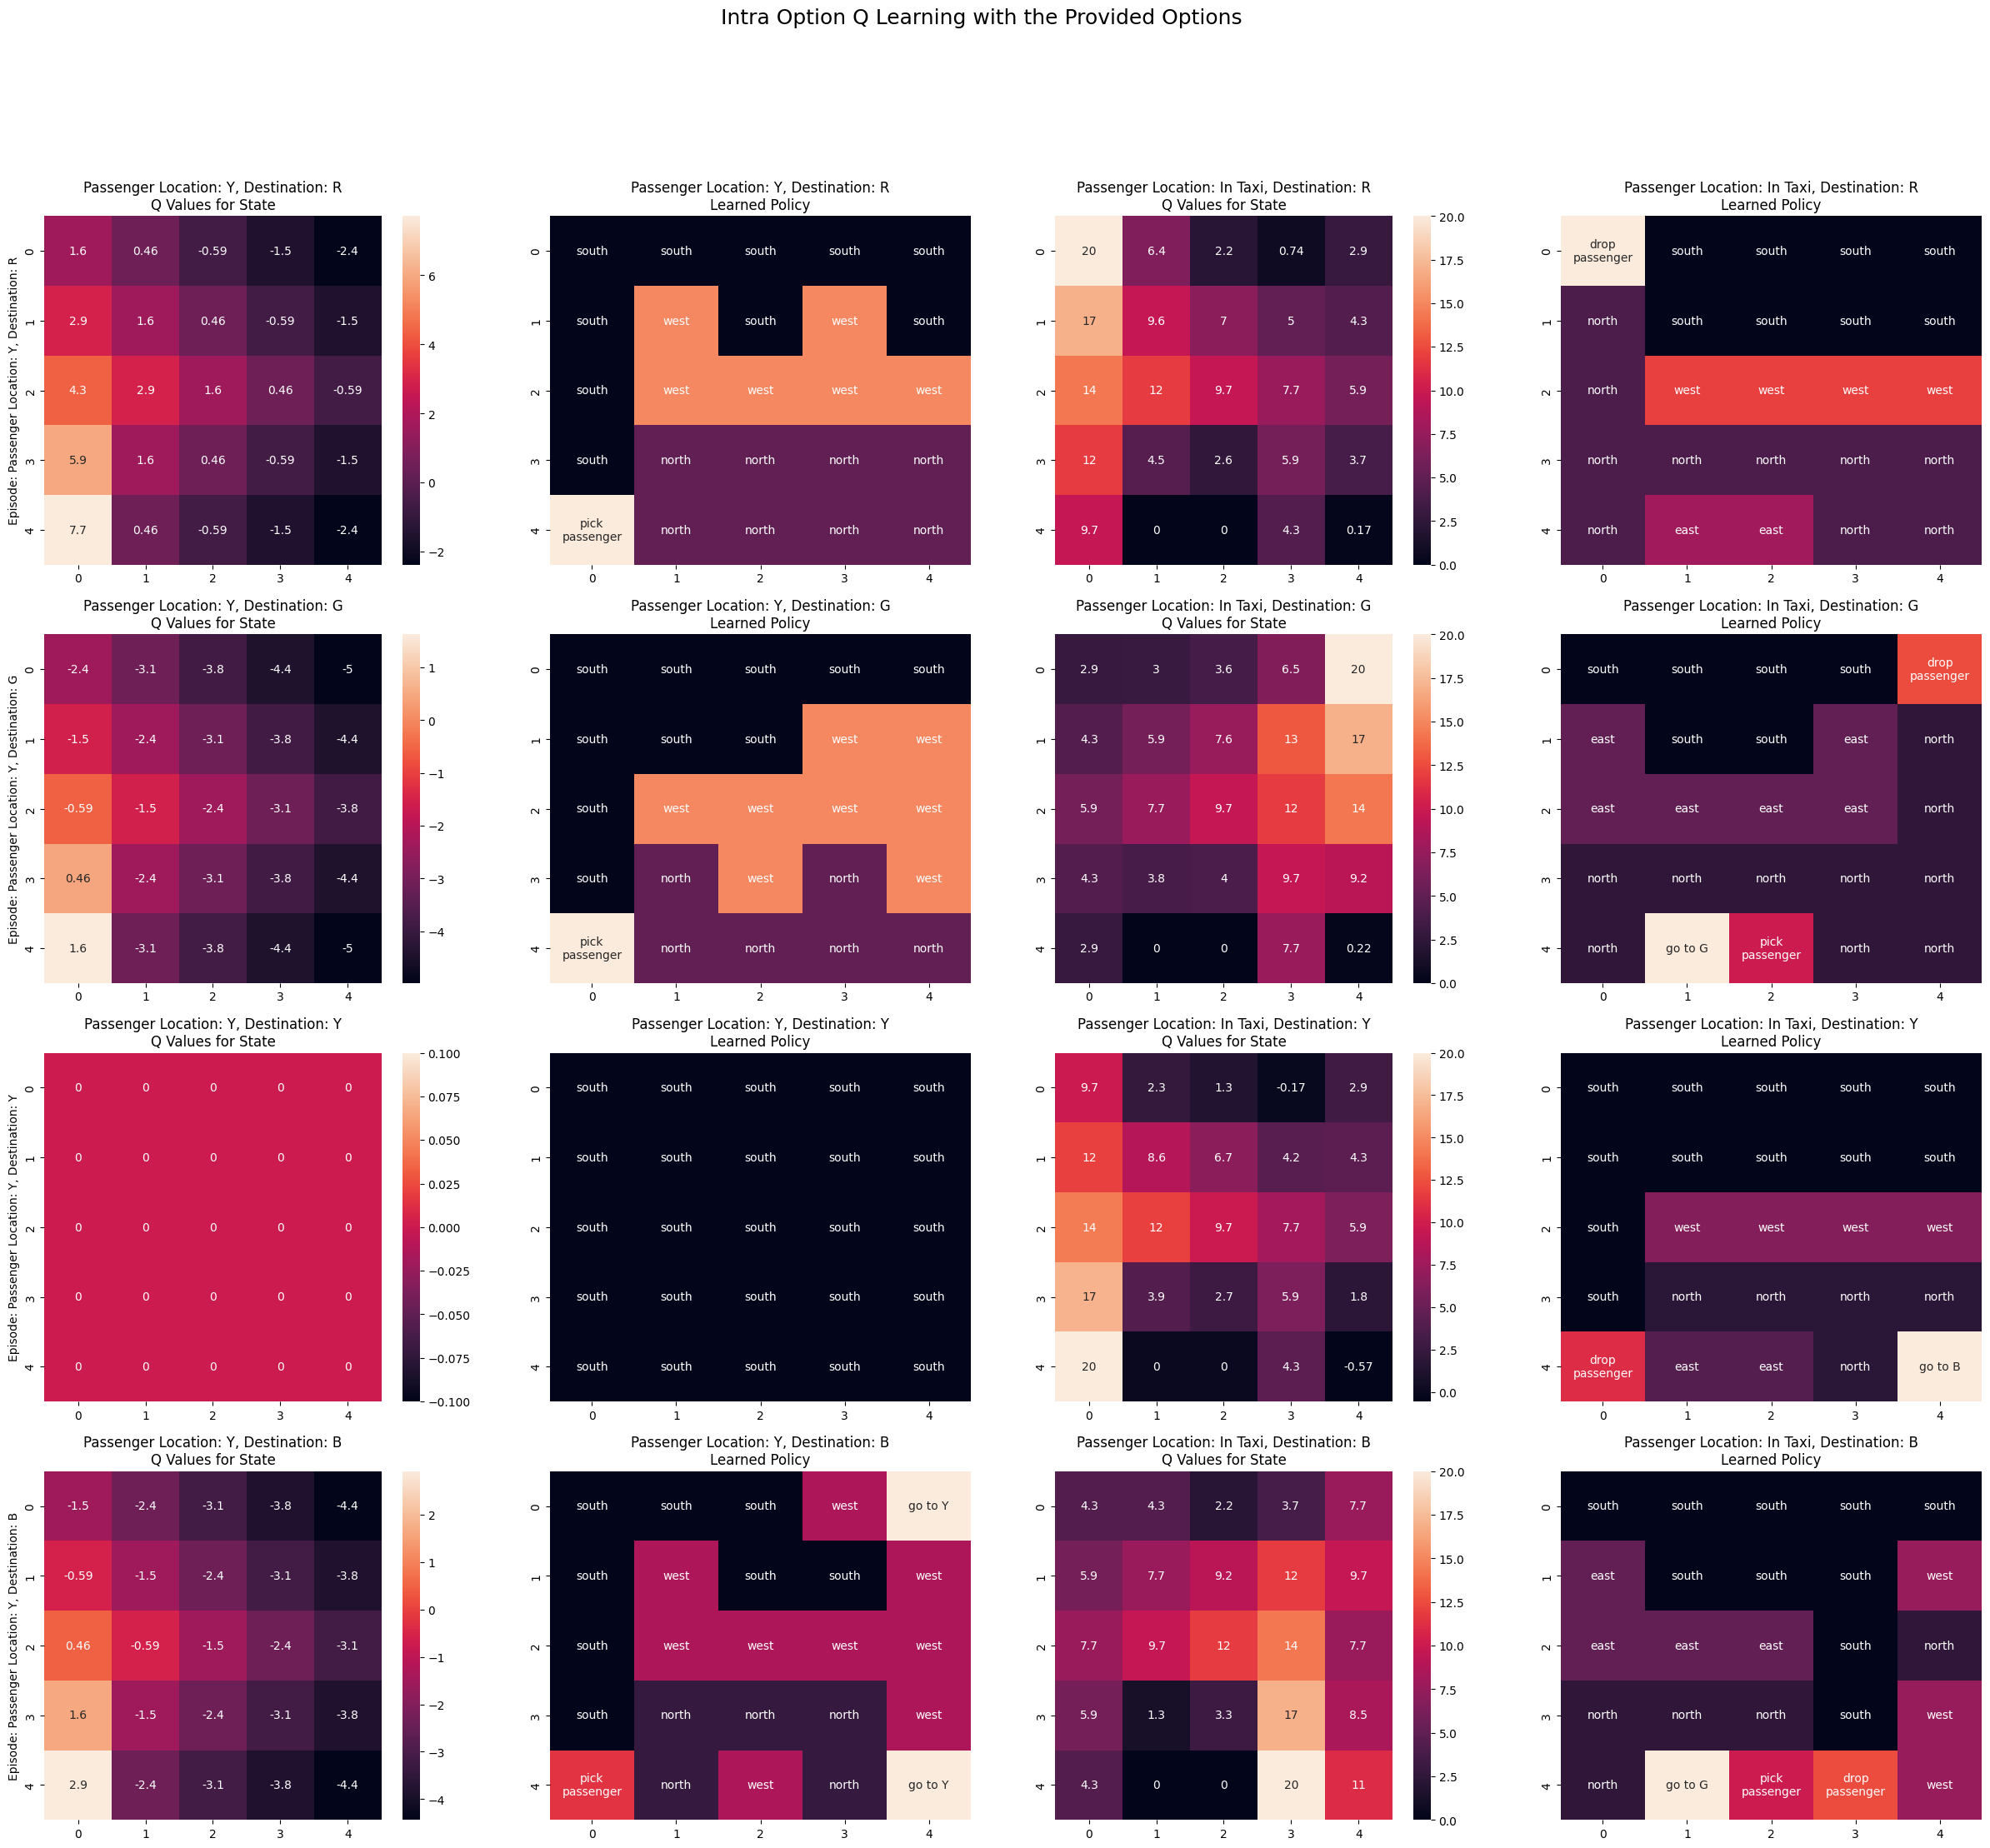

In [ ]:
# Passenger outside taxi
idx = np.arange(20)

pass_loc = 2  # Can be 0, 1, 2, 3, 4

id = idx[pass_loc * 4:pass_loc * 4 + 4]
id_in_taxi = idx[16:20]

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(30, 25))

plt.suptitle('Intra Option Q Learning with the Provided Options', fontsize=18)
for n, i in enumerate(id):
    _, _, passenger_loc, destination = env.decode(i)
    axs[n][0].set_title(f'Passenger Location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}\nQ Values for State')
    sns.heatmap(max_IOQL_matrix[i::20].reshape(5, 5), annot=True, ax=axs[n][0]).set(ylabel=f'Episode: Passenger Location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}')
    t = labeled_argmax_IOQL_matrix[i::20].reshape(5, 5)
    sns.heatmap(argmax_IOQL_matrix[i::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][1], cbar=False)
    axs[n][1].set_title(f'Passenger Location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}\nLearned Policy')

    axs[n][2].set_title(f'Passenger Location: In Taxi, Destination: {pass_map[destination]}\nQ Values for State')
    sns.heatmap(max_IOQL_matrix[id_in_taxi[n]::20].reshape(5, 5), annot=True, ax=axs[n][2])
    t = labeled_argmax_IOQL_matrix[id_in_taxi[n]::20].reshape(5, 5)
    sns.heatmap(argmax_IOQL_matrix[id_in_taxi[n]::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][3], cbar=False)
    axs[n][3].set_title(f'Passenger Location: In Taxi, Destination: {pass_map[destination]}\nLearned Policy')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will

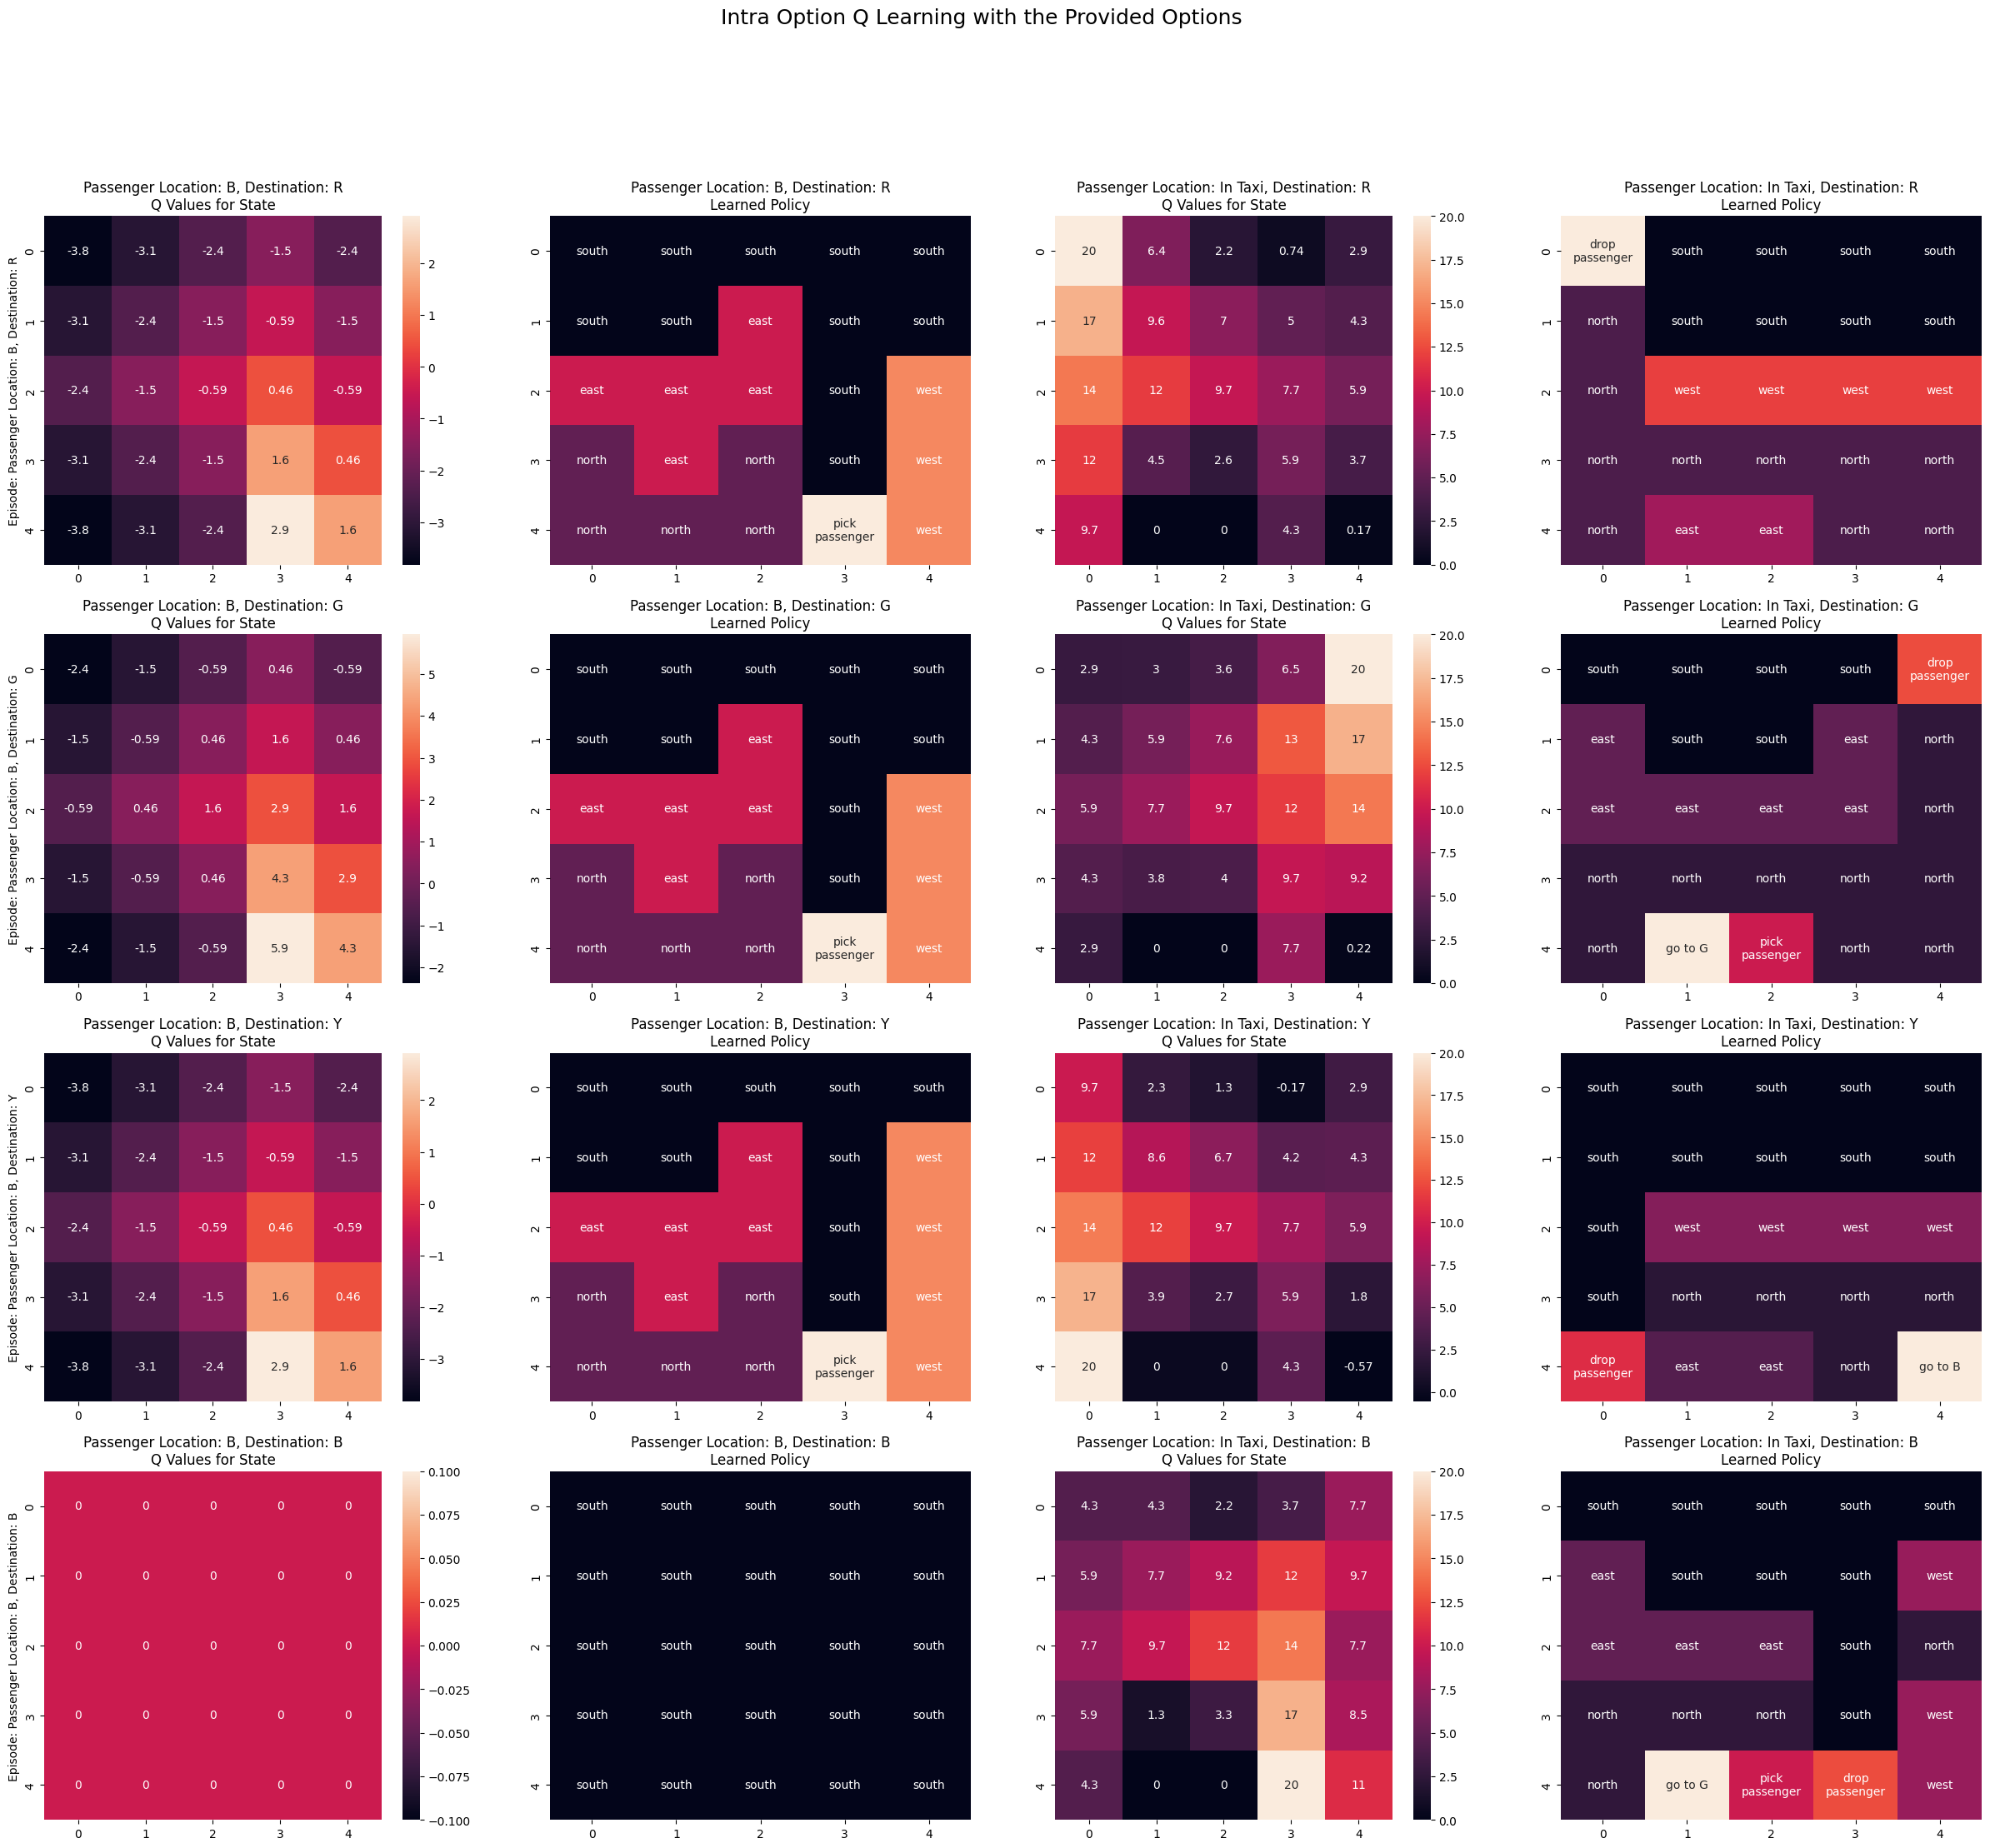

In [ ]:
# Passenger outside taxi
idx = np.arange(20)

pass_loc = 3  # Can be 0, 1, 2, 3, 4

id = idx[pass_loc * 4:pass_loc * 4 + 4]
id_in_taxi = idx[16:20]

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(30, 25))

plt.suptitle('Intra Option Q Learning with the Provided Options', fontsize=18)
for n, i in enumerate(id):
    _, _, passenger_loc, destination = env.decode(i)
    axs[n][0].set_title(f'Passenger Location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}\nQ Values for State')
    sns.heatmap(max_IOQL_matrix[i::20].reshape(5, 5), annot=True, ax=axs[n][0]).set(ylabel=f'Episode: Passenger Location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}')
    t = labeled_argmax_IOQL_matrix[i::20].reshape(5, 5)
    sns.heatmap(argmax_IOQL_matrix[i::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][1], cbar=False)
    axs[n][1].set_title(f'Passenger Location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}\nLearned Policy')

    axs[n][2].set_title(f'Passenger Location: In Taxi, Destination: {pass_map[destination]}\nQ Values for State')
    sns.heatmap(max_IOQL_matrix[id_in_taxi[n]::20].reshape(5, 5), annot=True, ax=axs[n][2])
    t = labeled_argmax_IOQL_matrix[id_in_taxi[n]::20].reshape(5, 5)
    sns.heatmap(argmax_IOQL_matrix[id_in_taxi[n]::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][3], cbar=False)
    axs[n][3].set_title(f'Passenger Location: In Taxi, Destination: {pass_map[destination]}\nLearned Policy')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q3 -> New options - go_to_left_center, go_to_right_center

In [ ]:
# new option
# going to center seems to be a bad option


# implementation of epsilon-greedy policy
def egreedy_policy(q_values,state,epsilon):
    # exploration
    if random.uniform(0, 1) < epsilon:
        # Select a random action
        action = np.random.choice(range(9)) # because we have 4 actions + 3 options
    # exploitation
    else:
        # Select the action with highest Q-value
        action = np.argmax(q_values[state])
    return action



def go_to_left_center(env,state):

    optdone = False
    optact = 3

    taxi_row, taxi_col, passenger_index, destination_index = env.decode(state)

    # taxi is at center
    if (taxi_row == 2 and taxi_col == 0): # at center
        optdone = True # option is done

    elif (taxi_row < 2):
        optact = 0 # move south

    elif (taxi_row > 2):
        optact = 1 # move north

    elif (taxi_col > 0):
        optact = 3 # move west

    return [optact,optdone]

def go_to_right_center(env,state):

    optdone = False
    optact = 2

    taxi_row, taxi_col, passenger_index, destination_index = env.decode(state)

    # taxi is at center
    if (taxi_row == 2 and taxi_col == 4): # at center
        optdone = True # option is done

    elif (taxi_row < 2):
        optact = 0 # move south

    elif (taxi_row > 2):
        optact = 1 # move north

    elif (taxi_col < 4):
        optact = 2 # move east

    return [optact,optdone]

def go_to_center(env,state):

    optdone = False
    optact = 2

    taxi_row, taxi_col, passenger_index, destination_index = env.decode(state)

    # taxi is at center
    if (taxi_row == 2 and taxi_col == 2): # at center
        optdone = True # option is done

    elif (taxi_row < 2):
        optact = 0 # move south

    elif (taxi_row > 2):
        optact = 1 # move north

    elif (taxi_col < 2):
        optact = 2 # move east

    elif (taxi_col > 2):
        optact = 3 # move west

    return [optact,optdone]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


IndexError: list index out of range

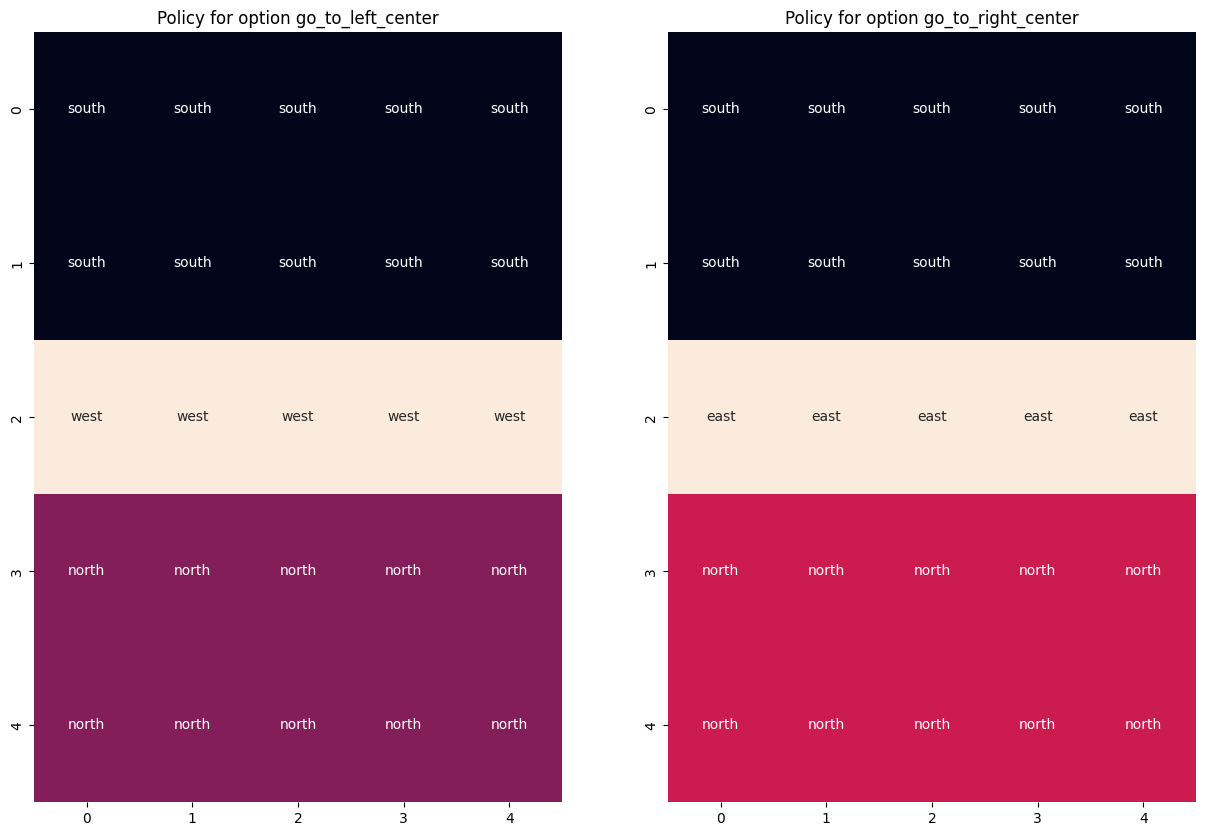

In [ ]:
left = np.array([[0,0,0,0,0],
                 [0,0,0,0,0],
                 [3,3,3,3,3],
                 [1,1,1,1,1],
                 [1,1,1,1,1]
                 ])
right = np.array([[0,0,0,0,0],
                 [0,0,0,0,0],
                 [2,2,2,2,2],
                 [1,1,1,1,1],
                 [1,1,1,1,1]
                 ])
options = [left,right]
optName = ['left_center','right_center']

figure, axis = plt.subplots(1,2,figsize=(15,10))

for i in range(2):
  for j in range(2):
    labels = {0:'south',1:'north', 2:'east', 3:'west'}
    l = np.vectorize(labels.get)((options[2*i+j]))
    sns.heatmap((options[2*i+j]),ax=axis[j],annot = l,fmt='', cbar=False)
    axis[j].set_title("Policy for option go_to_{}".format(optName[i*2+j]))
plt.suptitle(f'Policy for the new options')

SMDP with 1. go to left center, 2. go to right center options

In [ ]:
#Q-Table: (States x Actions) === (env.ns(500) x total actions(10))
q_values_SMDP = np.zeros((500,8))

update_freq = np.zeros((500,8))

from tqdm import tqdm
#### SMDP Q-Learning

# Add parameters you might need here
gamma = 0.9

# lr
alpha = 0.1

rewards = []

n_eps = 30000

# Iterate over 1000 episodes
for episode in tqdm(range(n_eps)):
    state = env.reset()[0] # get the initial state
    done = False # while not terminating step
    total_rewards = 0
    # print(state)

    # While episode is not over
    while not done:

        # Choose action
        action = egreedy_policy(q_values_SMDP, state, epsilon=0.1)

        # Checking if primitive action
        if action < 6:
            # Perform regular Q-Learning update for state-action pair
            next_state, reward, done, _, _ = env.step(action)
            # store in Q table and update frequency table
            total_rewards += reward

            ##############################
            # Usual Q-Learning update rule
            q_values_SMDP[state][action] += alpha * (reward + gamma * np.max(q_values_SMDP[next_state]) - q_values_SMDP[state][action])
            ##############################
            ##############################
            # update frequency
            update_freq[state][action] += 1
            ##############################
            state = next_state


        # Checking if action chosen is an option
        reward_bar = 0
        if action == 6: # action => go to R option
            optdone = False
            init_state = state
            tau=0
            while (optdone == False and not done):

                # Think about what this function might do?
                optact, optdone = go_to_left_center(env, state) # away option
                # print(optact, optdone)
                next_state, reward, done, _, _ = env.step(optact)
                # print(next_state)
                # total_rewards += reward

                # Is this formulation right? What is this term?
                ##############################
                # Compute the discounted reward
                reward_bar = gamma * reward_bar + reward
                ##############################

                # Complete SMDP Q-Learning Update
                # Remember SMDP Updates. When & What do you update?

                ##############################
                tau+=1 # tau for exponentiating gamma
                ##############################

                state = next_state
            ##############################
            # SMDP update after finishing the trajectory
            q_values_SMDP[init_state][action] += alpha * (reward_bar + (gamma**tau) * np.max(q_values_SMDP[state]) - q_values_SMDP[init_state][action])
            ##############################
            ##############################
            # update frequency
            update_freq[init_state][action] += 1
            ##############################
            total_rewards += reward_bar

        if action == 7: # action => go to R option
            optdone = False
            init_state = state
            tau=0
            while (optdone == False and not done):

                # Think about what this function might do?
                optact, optdone = go_to_right_center(env, state) # away option
                # print(optact, optdone)
                next_state, reward, done, _, _ = env.step(optact)
                # print(next_state)
                # total_rewards += reward

                # Is this formulation right? What is this term?
                ##############################
                # Compute the discounted reward
                reward_bar = gamma * reward_bar + reward
                ##############################

                # Complete SMDP Q-Learning Update
                # Remember SMDP Updates. When & What do you update?

                ##############################
                tau+=1 # tau for exponentiating gamma
                ##############################

                state = next_state
            ##############################
            total_rewards += reward_bar
            # SMDP update after finishing the trajectory
            q_values_SMDP[init_state][action] += alpha * (reward_bar + (gamma**tau) * np.max(q_values_SMDP[state]) - q_values_SMDP[init_state][action])
            ##############################
            ##############################
            # update frequency
            update_freq[init_state][action] += 1
            ##############################
    rewards.append(total_rewards)

  0%|          | 0/30000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
100%|██████████| 30000/30000 [00:37<00:00, 801.98it/s] 


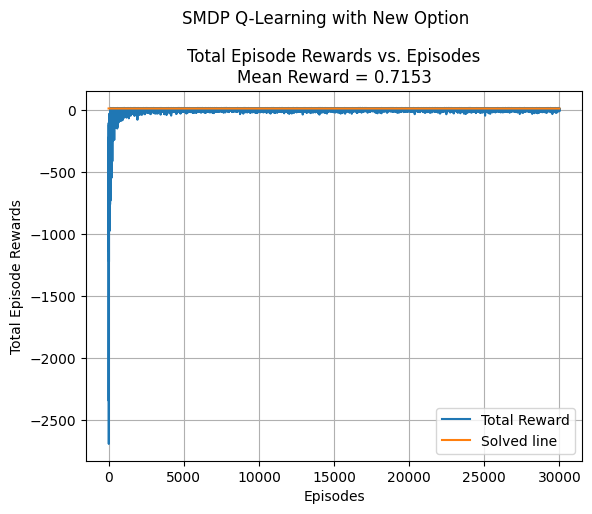

In [ ]:
plt.plot(np.arange(n_eps), rewards, label='Total Reward')
plt.title(f'Total Episode Rewards vs. Episodes\nMean Reward = {np.mean(rewards):.4f}')
plt.suptitle('SMDP Q-Learning with New Option', y=1.05)
plt.plot(np.arange(n_eps), [9.7] * n_eps, label='Solved line')
plt.xlabel('Episodes')
plt.ylabel('Total Episode Rewards')
plt.grid()
plt.legend()


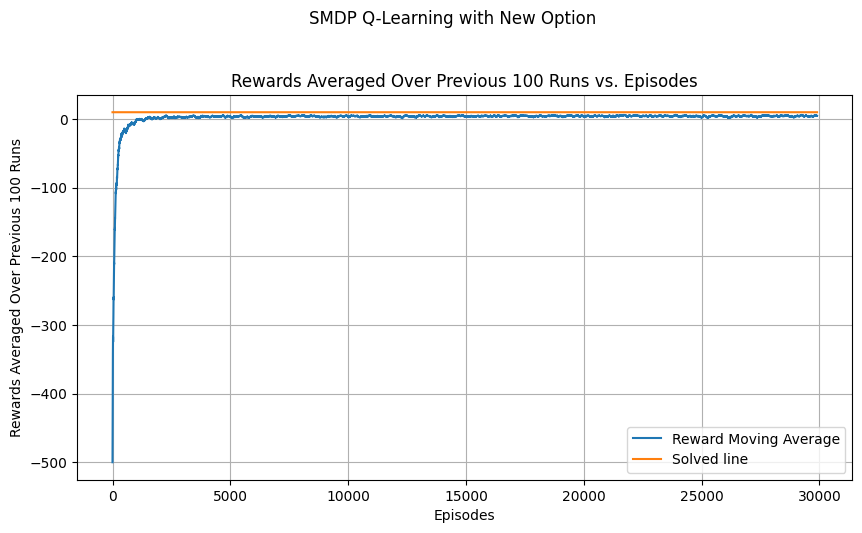

In [ ]:
plt.figure(figsize=(10, 5))
avg_rews0 = [np.average(rewards[i:i+100]) for i in range(len(rewards)-100)]
plt.plot(avg_rews0, label='Reward Moving Average')
plt.plot([9.7 for _ in range(len(avg_rews0))], label='Solved line')
plt.xlabel('Episodes')
plt.ylabel('Rewards Averaged Over Previous 100 Runs')
plt.suptitle('SMDP Q-Learning with New Option', y=1.05)
plt.title('Rewards Averaged Over Previous 100 Runs vs. Episodes')
plt.grid()
plt.legend()


In [ ]:
# {0: 'move south', 1: 'move north', 2: 'move east', 3: 'move west', 4: 'pick passenger up', 5: 'drop passenger off'}

reshaped_Q_matrix = q_values_SMDP.reshape(500, 8)
max_Q_matrix = np.max(reshaped_Q_matrix, axis=-1)
argmax_Q_matrix = np.argmax(reshaped_Q_matrix, axis=-1)

Text(220.72222222222223, 0.5, 'states')

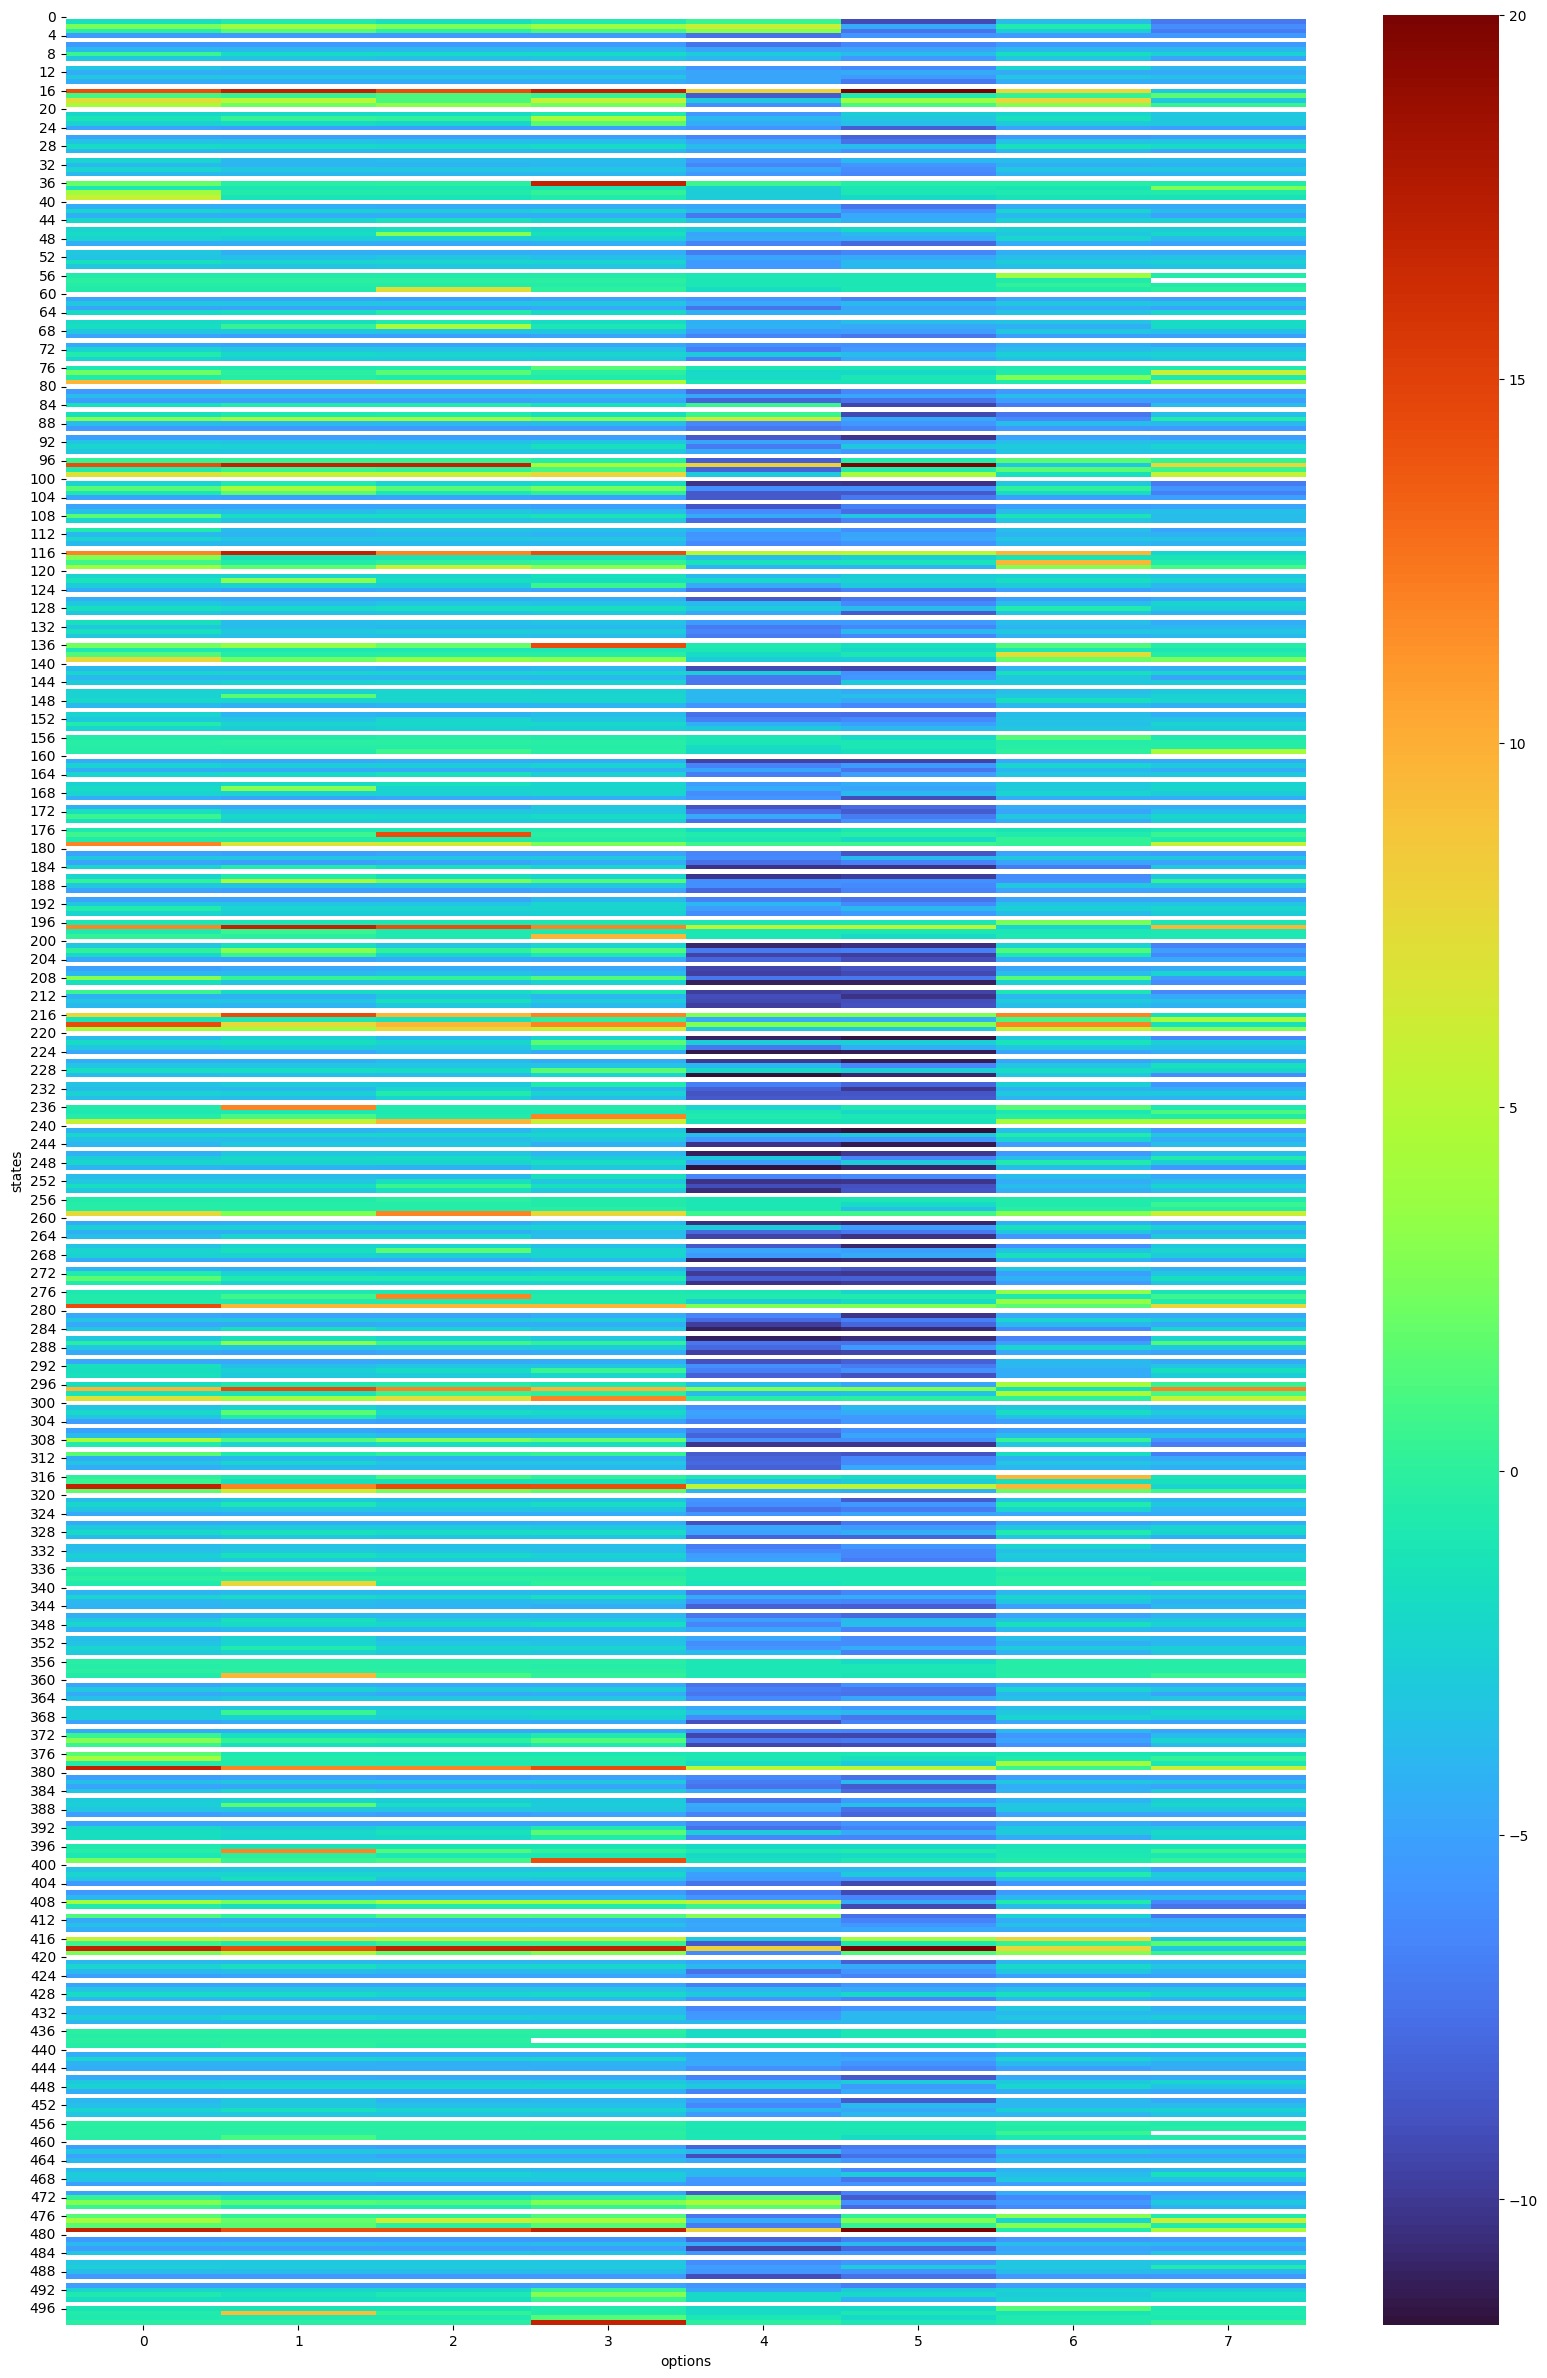

In [ ]:
fig, ax = plt.subplots(figsize=(20,30))
sns.heatmap(reshaped_Q_matrix, ax=ax, cmap='turbo', mask=reshaped_Q_matrix==0)
ax.set_xlabel('options')
ax.set_ylabel('states')

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search t

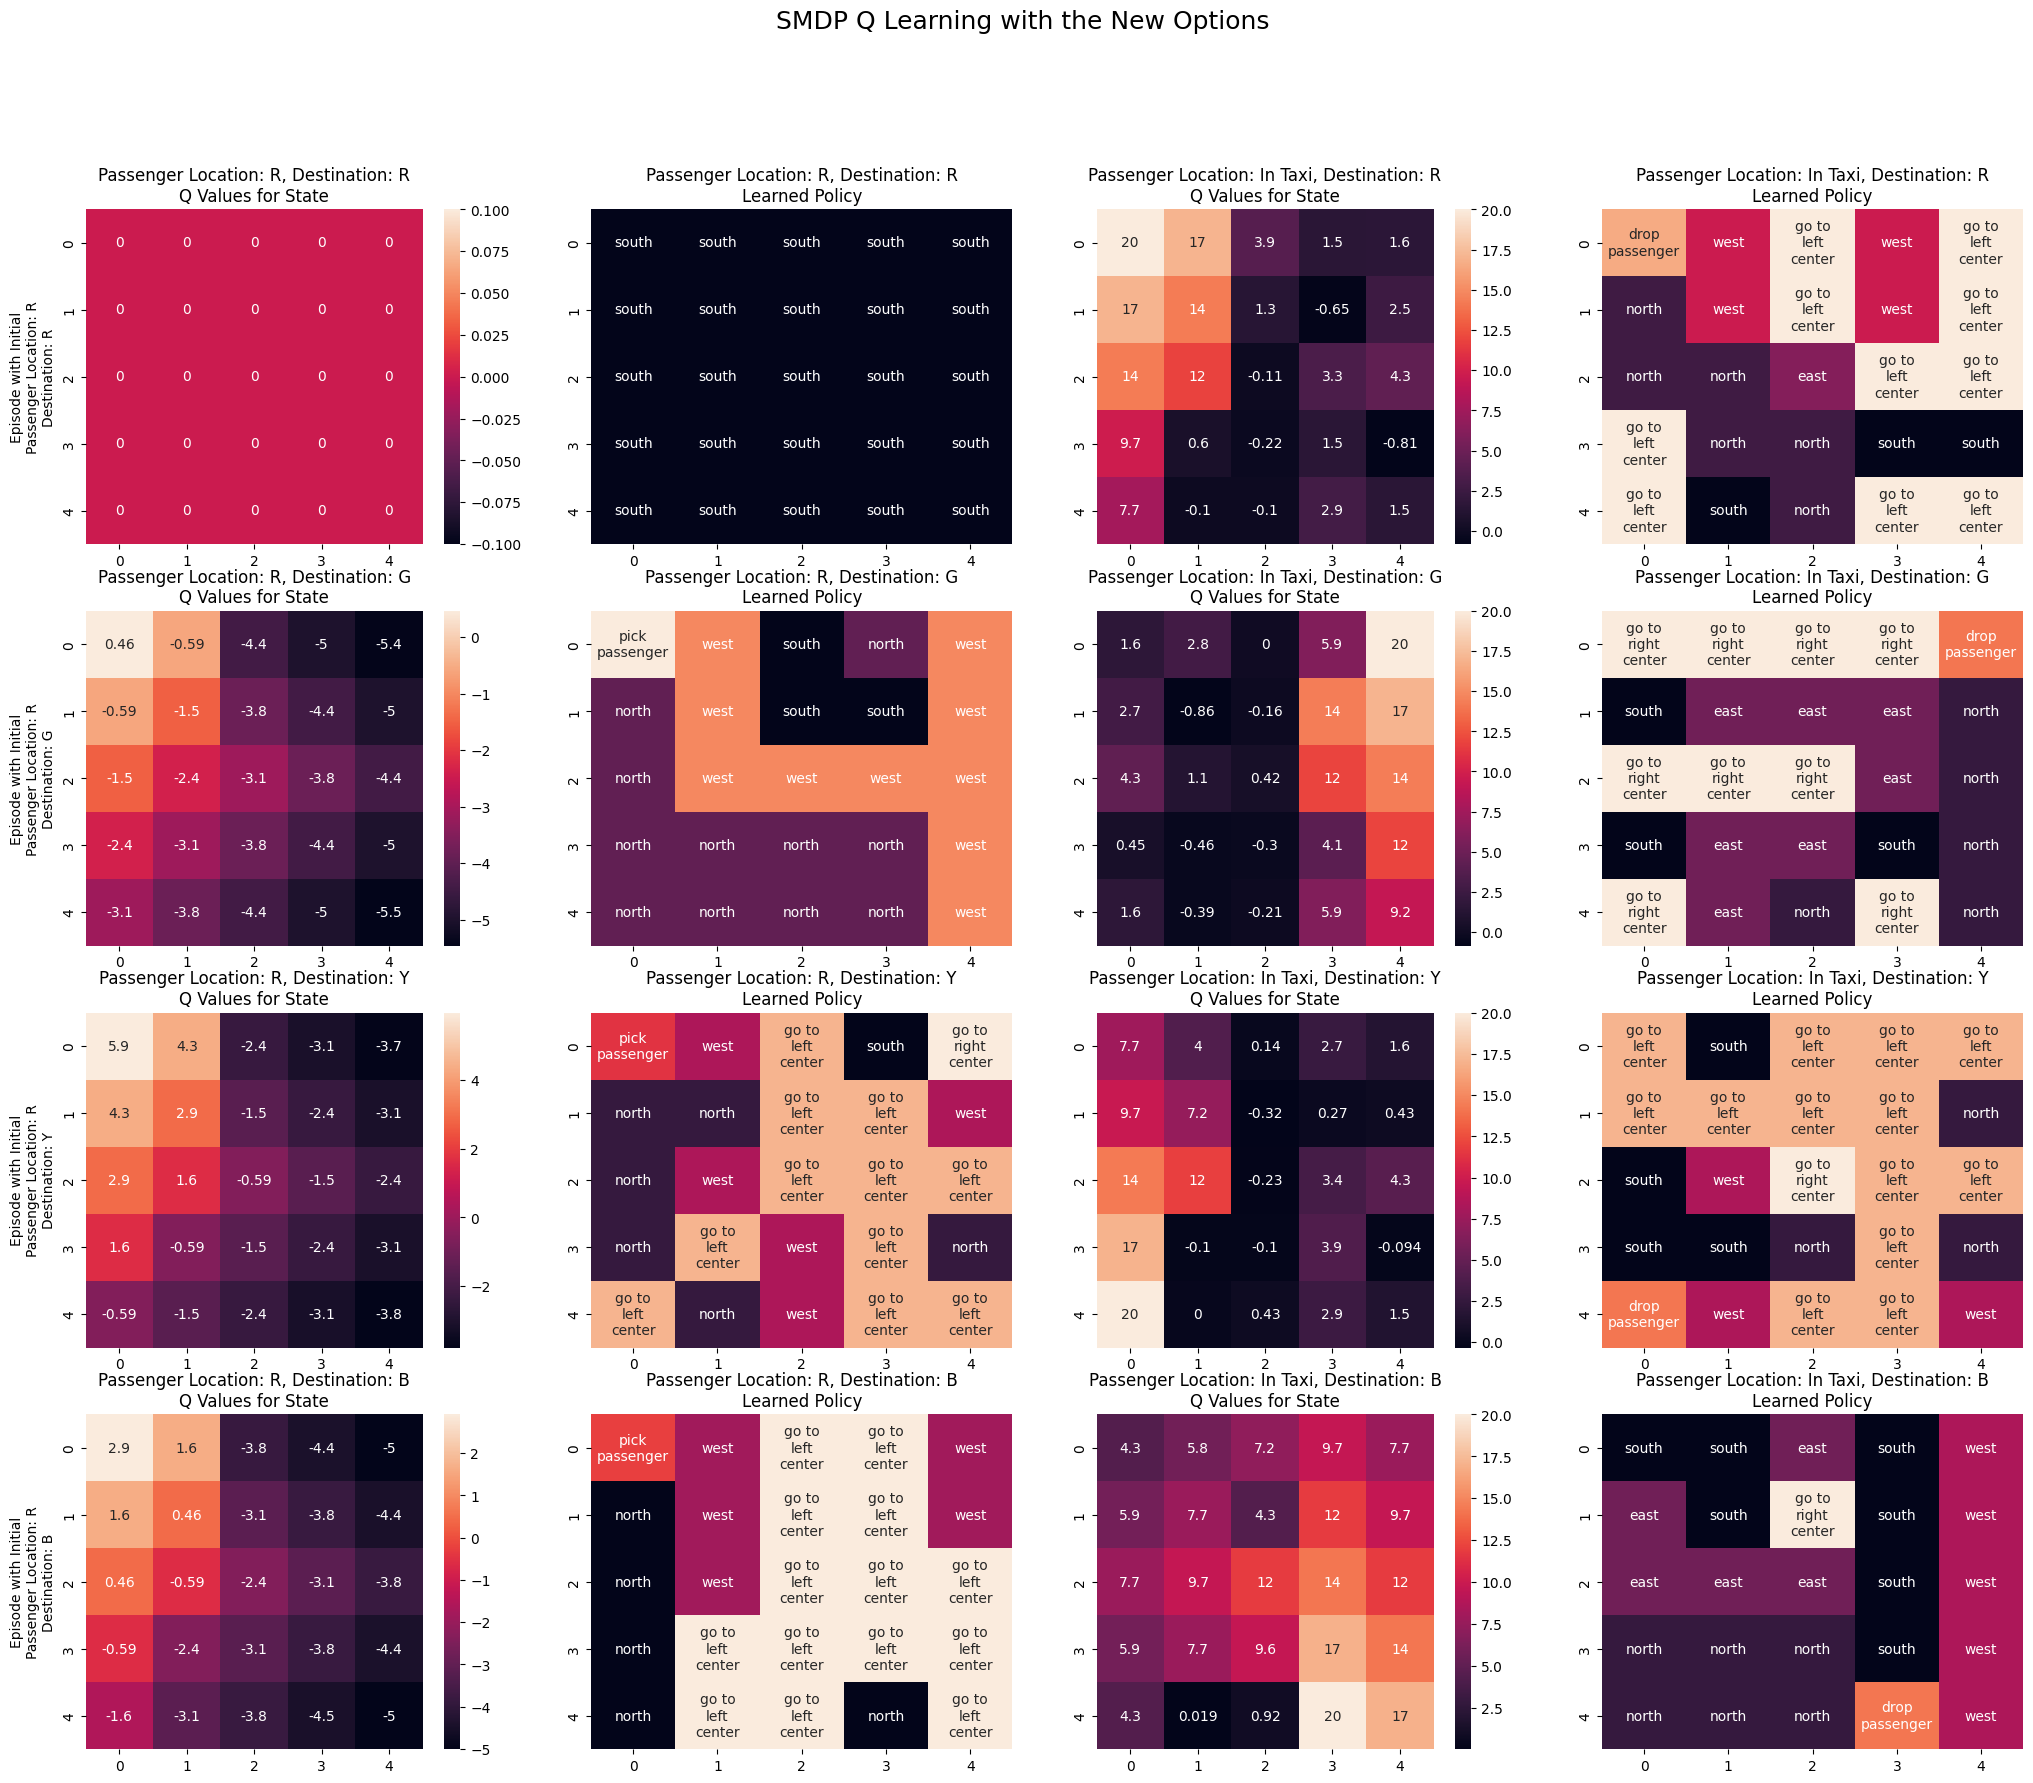

In [ ]:
opt_map = {0: 'south', 1: 'north', 2: 'east', 3: 'west', 4: 'pick\npassenger', 5: 'drop\npassenger', 6: 'go to\nleft\ncenter', 7: 'go to\nright\ncenter'}
pass_map = {0: 'R', 1:'G', 2: 'Y', 3:'B'}
labeled_argmax_Q_matrix = np.vectorize(opt_map.get)(argmax_Q_matrix)

# passenger outside taxi
idx = np.arange(20)

pass_loc = 0 # can be 0, 1, 2, 3, 4

id = idx[pass_loc * 4:pass_loc * 4 + 4]
id_in_taxi = idx[16:20]

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(25, 20))

plt.suptitle('SMDP Q Learning with the New Options', fontsize=18)

for n, i in enumerate(id):
    _, _, passenger_loc, destination = env.decode(i)
    axs[n][0].set_title(f'Passenger Location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}\nQ Values for State')
    sns.heatmap(max_Q_matrix[i::20].reshape(5, 5), annot=True, ax=axs[n][0]).set(ylabel=f'Episode with Initial\nPassenger Location: {pass_map[passenger_loc]}\nDestination: {pass_map[destination]}')
    t = labeled_argmax_Q_matrix[i::20].reshape(5, 5)
    sns.heatmap(argmax_Q_matrix[i::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][1], cbar=False)
    axs[n][1].set_title(f'Passenger Location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}\nLearned Policy')

    axs[n][2].set_title(f'Passenger Location: In Taxi, Destination: {pass_map[destination]}\nQ Values for State')
    sns.heatmap(max_Q_matrix[id_in_taxi[n]::20].reshape(5, 5), annot=True, ax=axs[n][2])
    t = labeled_argmax_Q_matrix[id_in_taxi[n]::20].reshape(5, 5)
    sns.heatmap(argmax_Q_matrix[id_in_taxi[n]::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][3], cbar=False)
    axs[n][3].set_title(f'Passenger Location: In Taxi, Destination: {pass_map[destination]}\nLearned Policy')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will

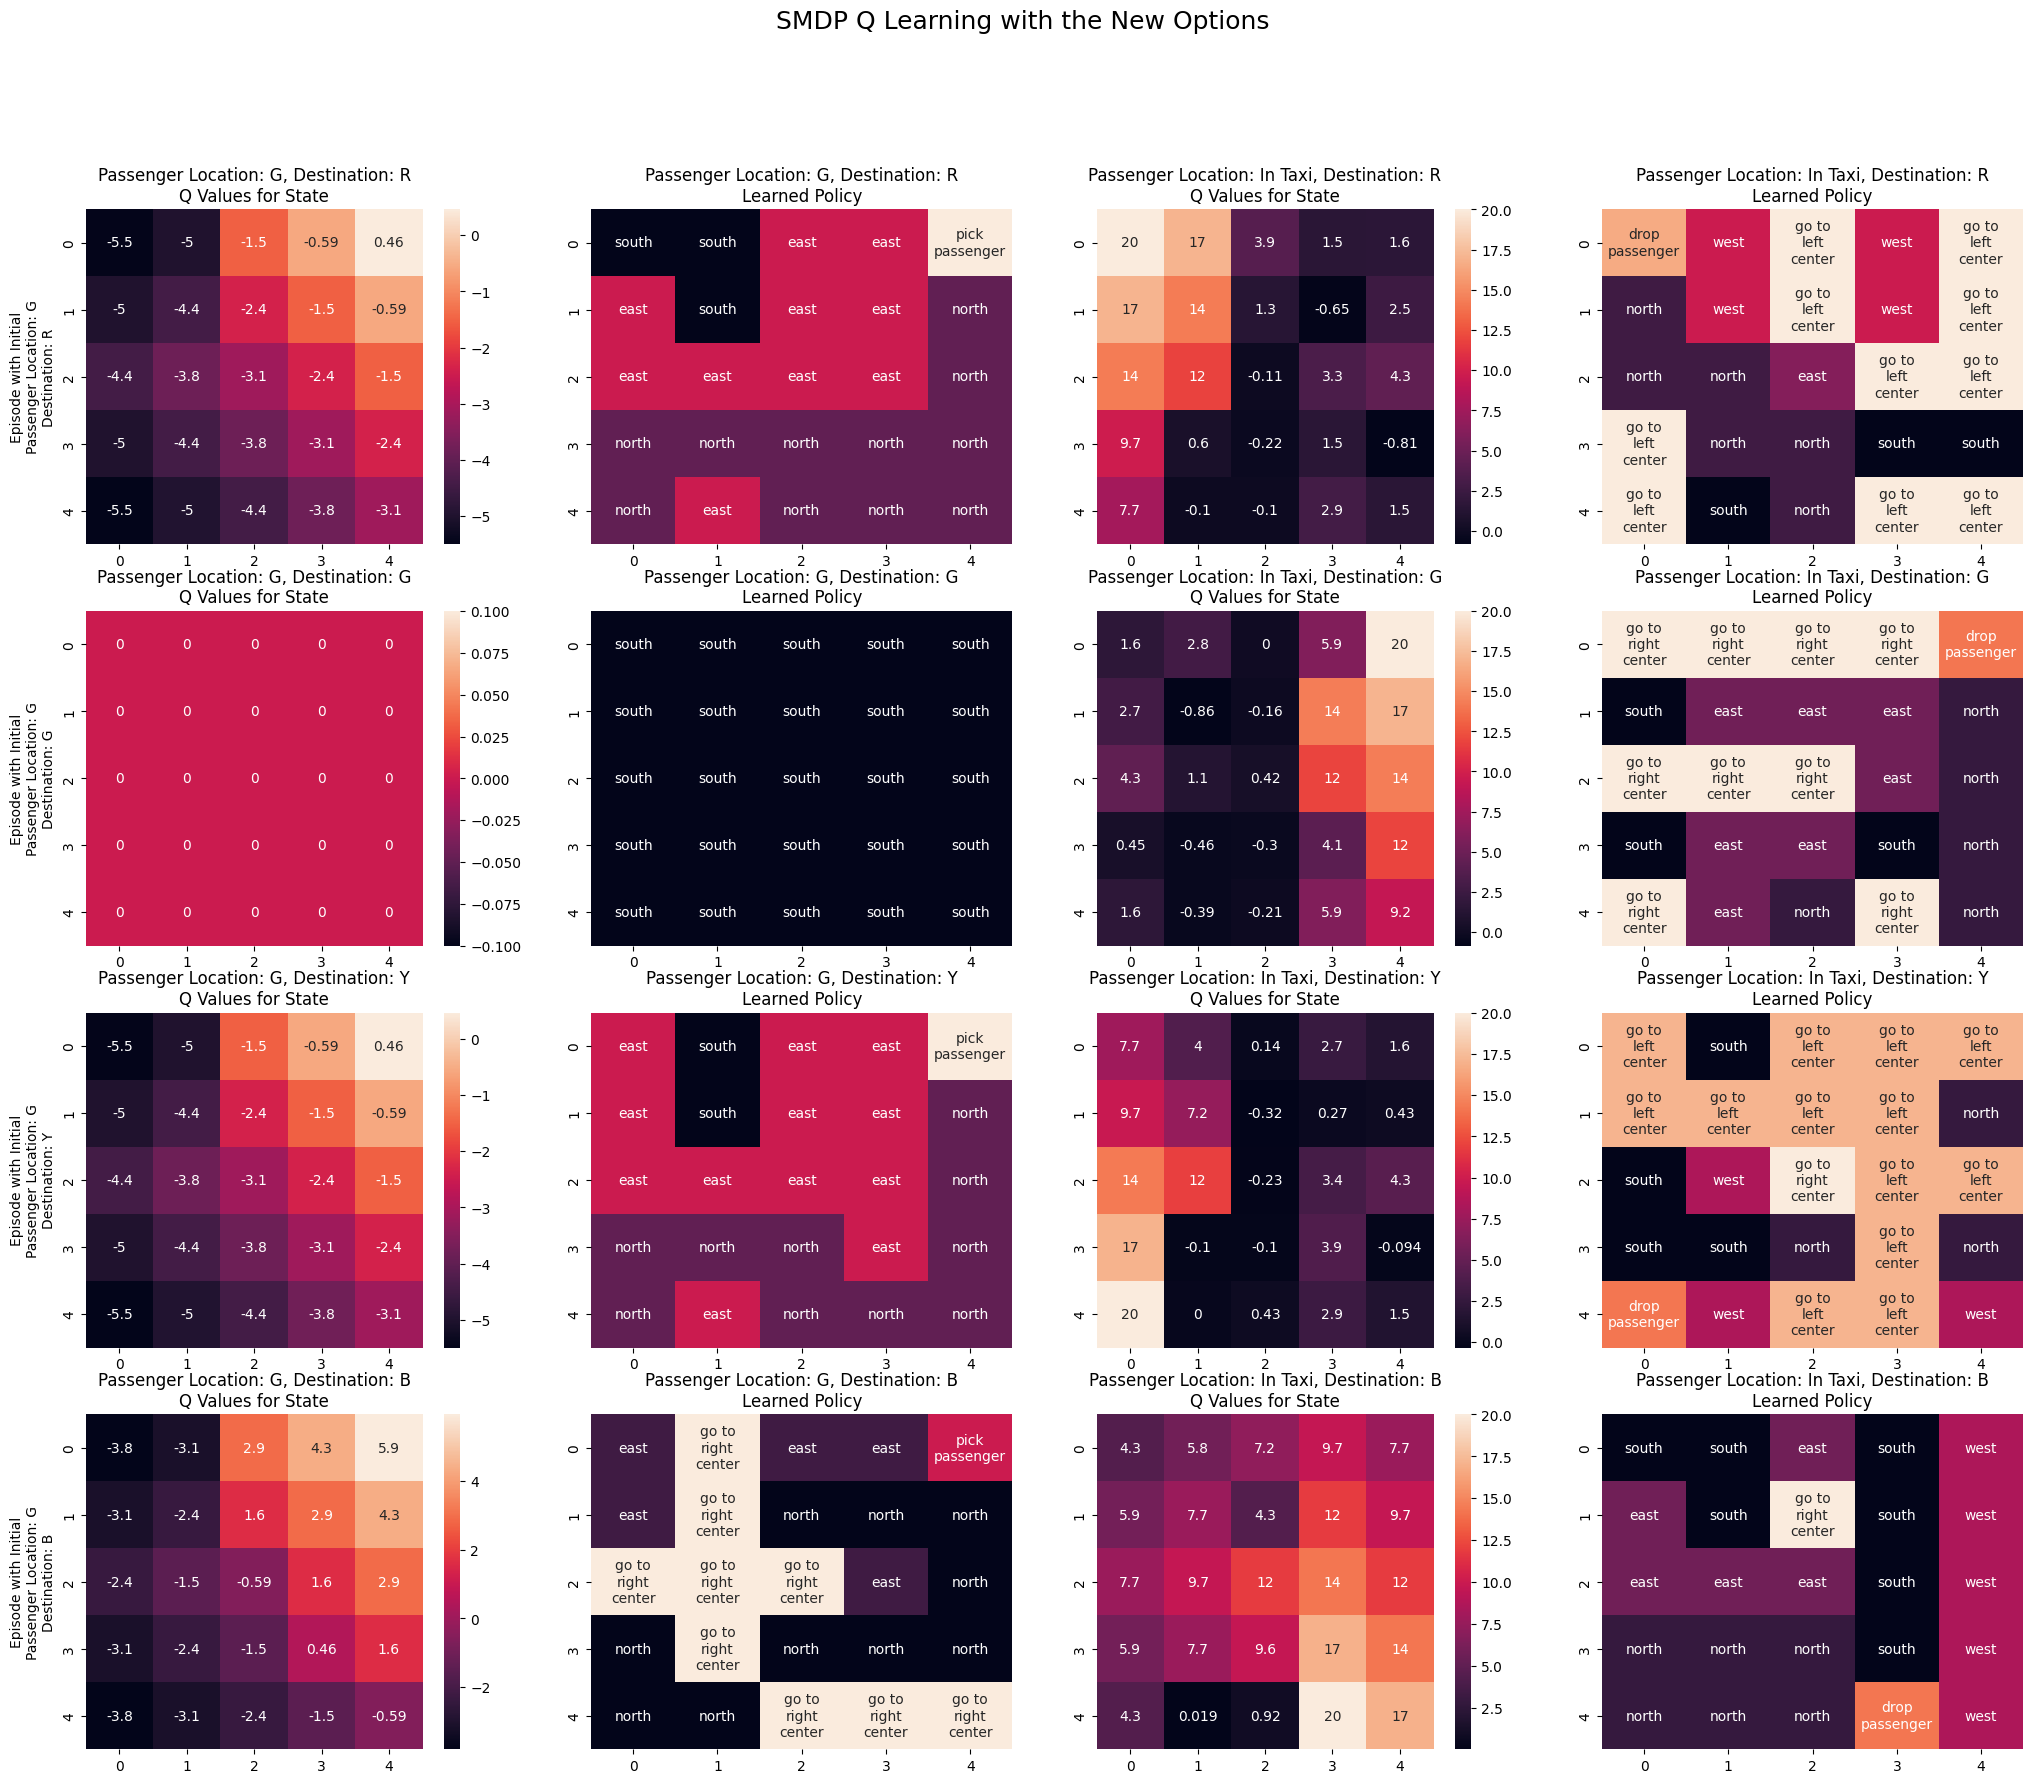

In [ ]:

# {0: 'move south', 1: 'move north', 2: 'move east', 3: 'move west', 4: 'pick passenger up', 5: 'drop passenger off'}

reshaped_Q_matrix = q_values_SMDP.reshape(500, 8)
max_Q_matrix = np.max(reshaped_Q_matrix, axis=-1)
argmax_Q_matrix = np.argmax(reshaped_Q_matrix, axis=-1)

opt_map = {0: 'south', 1: 'north', 2: 'east', 3: 'west', 4: 'pick\npassenger', 5: 'drop\npassenger', 6: 'go to\nleft\ncenter', 7: 'go to\nright\ncenter'}
pass_map = {0: 'R', 1:'G', 2: 'Y', 3:'B'}
labeled_argmax_Q_matrix = np.vectorize(opt_map.get)(argmax_Q_matrix)

opt_map = {0: 'south', 1: 'north', 2: 'east', 3: 'west', 4: 'pick\npassenger', 5: 'drop\npassenger', 6: 'go to\nleft\ncenter', 7: 'go to\nright\ncenter'}
pass_map = {0: 'R', 1:'G', 2: 'Y', 3:'B'}
labeled_argmax_Q_matrix = np.vectorize(opt_map.get)(argmax_Q_matrix)

# passenger outside taxi
idx = np.arange(20)

pass_loc = 1 # can be 0, 1, 2, 3, 4

id = idx[pass_loc * 4:pass_loc * 4 + 4]
id_in_taxi = idx[16:20]

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(25, 20))

plt.suptitle('SMDP Q Learning with the New Options', fontsize=18)

for n, i in enumerate(id):
    _, _, passenger_loc, destination = env.decode(i)
    axs[n][0].set_title(f'Passenger Location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}\nQ Values for State')
    sns.heatmap(max_Q_matrix[i::20].reshape(5, 5), annot=True, ax=axs[n][0]).set(ylabel=f'Episode with Initial\nPassenger Location: {pass_map[passenger_loc]}\nDestination: {pass_map[destination]}')
    t = labeled_argmax_Q_matrix[i::20].reshape(5, 5)
    sns.heatmap(argmax_Q_matrix[i::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][1], cbar=False)
    axs[n][1].set_title(f'Passenger Location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}\nLearned Policy')

    axs[n][2].set_title(f'Passenger Location: In Taxi, Destination: {pass_map[destination]}\nQ Values for State')
    sns.heatmap(max_Q_matrix[id_in_taxi[n]::20].reshape(5, 5), annot=True, ax=axs[n][2])
    t = labeled_argmax_Q_matrix[id_in_taxi[n]::20].reshape(5, 5)
    sns.heatmap(argmax_Q_matrix[id_in_taxi[n]::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][3], cbar=False)
    axs[n][3].set_title(f'Passenger Location: In Taxi, Destination: {pass_map[destination]}\nLearned Policy')


/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search t

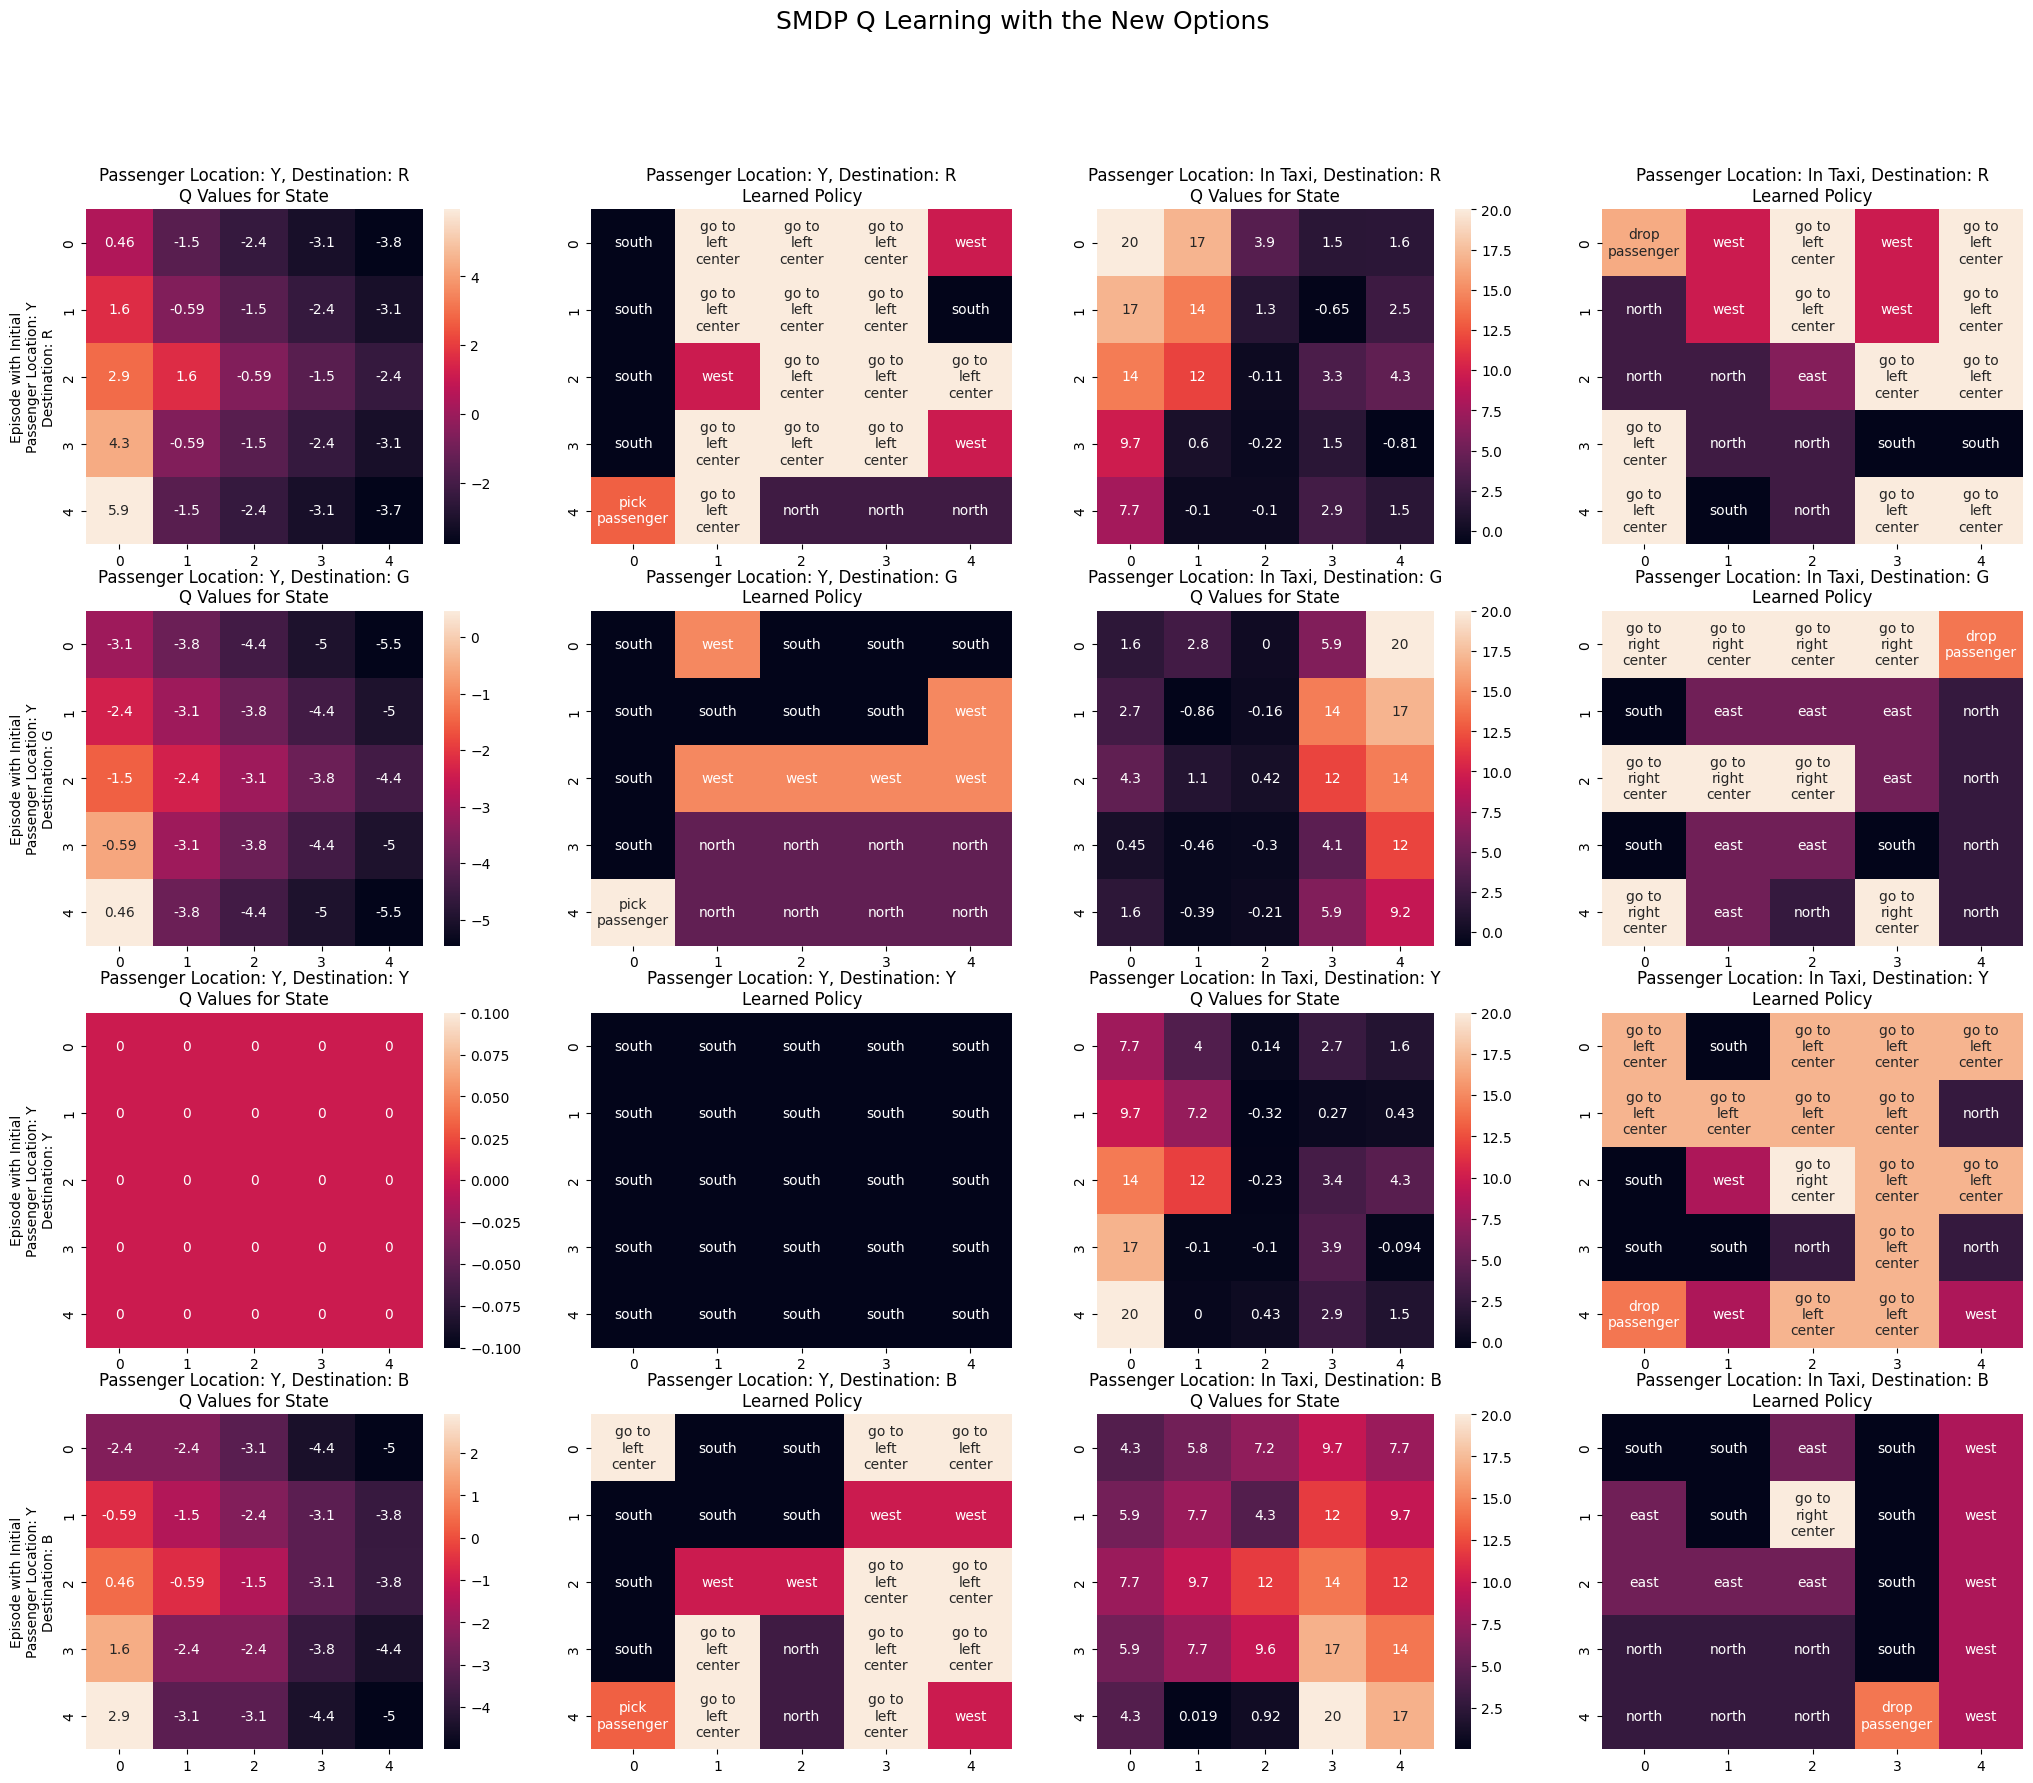

In [ ]:

# {0: 'move south', 1: 'move north', 2: 'move east', 3: 'move west', 4: 'pick passenger up', 5: 'drop passenger off'}

reshaped_Q_matrix = q_values_SMDP.reshape(500, 8)
max_Q_matrix = np.max(reshaped_Q_matrix, axis=-1)
argmax_Q_matrix = np.argmax(reshaped_Q_matrix, axis=-1)

opt_map = {0: 'south', 1: 'north', 2: 'east', 3: 'west', 4: 'pick\npassenger', 5: 'drop\npassenger', 6: 'go to\nleft\ncenter', 7: 'go to\nright\ncenter'}
pass_map = {0: 'R', 1:'G', 2: 'Y', 3:'B'}
labeled_argmax_Q_matrix = np.vectorize(opt_map.get)(argmax_Q_matrix)

opt_map = {0: 'south', 1: 'north', 2: 'east', 3: 'west', 4: 'pick\npassenger', 5: 'drop\npassenger', 6: 'go to\nleft\ncenter', 7: 'go to\nright\ncenter'}
pass_map = {0: 'R', 1:'G', 2: 'Y', 3:'B'}
labeled_argmax_Q_matrix = np.vectorize(opt_map.get)(argmax_Q_matrix)

# passenger outside taxi
idx = np.arange(20)

pass_loc = 2 # can be 0, 1, 2, 3, 4

id = idx[pass_loc * 4:pass_loc * 4 + 4]
id_in_taxi = idx[16:20]

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(25, 20))

plt.suptitle('SMDP Q Learning with the New Options', fontsize=18)

for n, i in enumerate(id):
    _, _, passenger_loc, destination = env.decode(i)
    axs[n][0].set_title(f'Passenger Location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}\nQ Values for State')
    sns.heatmap(max_Q_matrix[i::20].reshape(5, 5), annot=True, ax=axs[n][0]).set(ylabel=f'Episode with Initial\nPassenger Location: {pass_map[passenger_loc]}\nDestination: {pass_map[destination]}')
    t = labeled_argmax_Q_matrix[i::20].reshape(5, 5)
    sns.heatmap(argmax_Q_matrix[i::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][1], cbar=False)
    axs[n][1].set_title(f'Passenger Location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}\nLearned Policy')

    axs[n][2].set_title(f'Passenger Location: In Taxi, Destination: {pass_map[destination]}\nQ Values for State')
    sns.heatmap(max_Q_matrix[id_in_taxi[n]::20].reshape(5, 5), annot=True, ax=axs[n][2])
    t = labeled_argmax_Q_matrix[id_in_taxi[n]::20].reshape(5, 5)
    sns.heatmap(argmax_Q_matrix[id_in_taxi[n]::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][3], cbar=False)
    axs[n][3].set_title(f'Passenger Location: In Taxi, Destination: {pass_map[destination]}\nLearned Policy')


/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search t

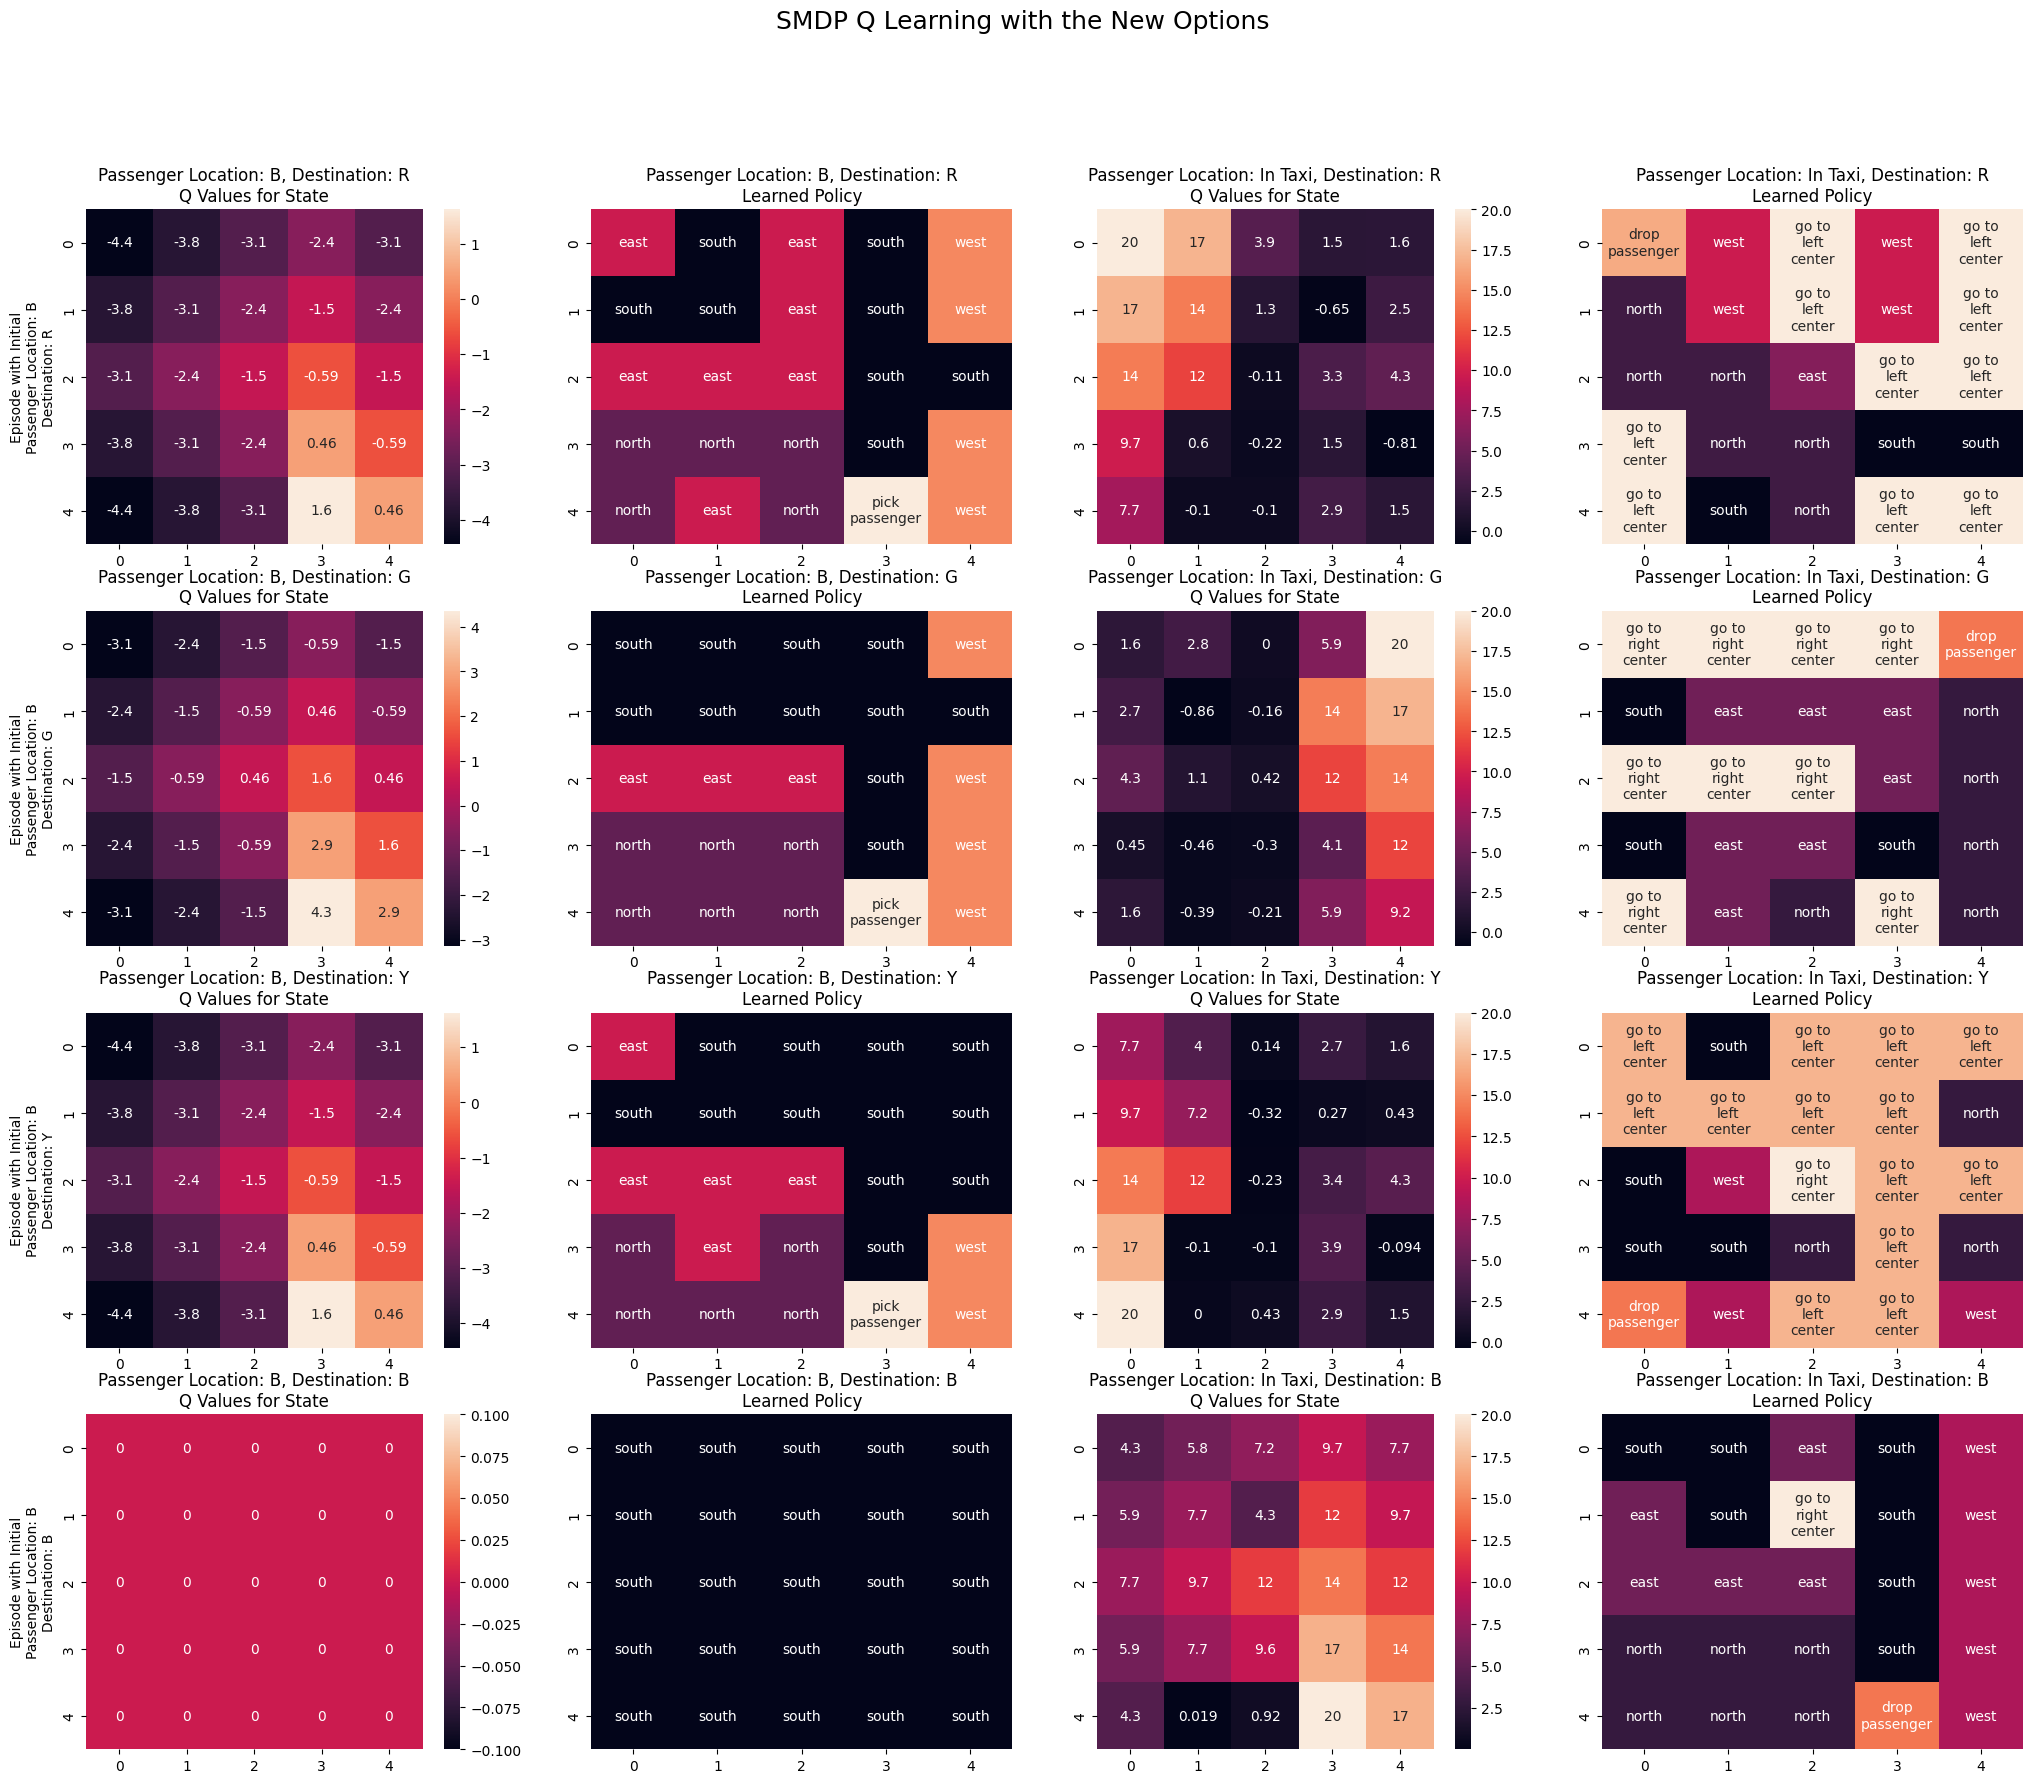

In [ ]:

# {0: 'move south', 1: 'move north', 2: 'move east', 3: 'move west', 4: 'pick passenger up', 5: 'drop passenger off'}

reshaped_Q_matrix = q_values_SMDP.reshape(500, 8)
max_Q_matrix = np.max(reshaped_Q_matrix, axis=-1)
argmax_Q_matrix = np.argmax(reshaped_Q_matrix, axis=-1)

opt_map = {0: 'south', 1: 'north', 2: 'east', 3: 'west', 4: 'pick\npassenger', 5: 'drop\npassenger', 6: 'go to\nleft\ncenter', 7: 'go to\nright\ncenter'}
pass_map = {0: 'R', 1:'G', 2: 'Y', 3:'B'}
labeled_argmax_Q_matrix = np.vectorize(opt_map.get)(argmax_Q_matrix)

opt_map = {0: 'south', 1: 'north', 2: 'east', 3: 'west', 4: 'pick\npassenger', 5: 'drop\npassenger', 6: 'go to\nleft\ncenter', 7: 'go to\nright\ncenter'}
pass_map = {0: 'R', 1:'G', 2: 'Y', 3:'B'}
labeled_argmax_Q_matrix = np.vectorize(opt_map.get)(argmax_Q_matrix)

# passenger outside taxi
idx = np.arange(20)

pass_loc = 3 # can be 0, 1, 2, 3, 4

id = idx[pass_loc * 4:pass_loc * 4 + 4]
id_in_taxi = idx[16:20]

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(25, 20))

plt.suptitle('SMDP Q Learning with the New Options', fontsize=18)

for n, i in enumerate(id):
    _, _, passenger_loc, destination = env.decode(i)
    axs[n][0].set_title(f'Passenger Location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}\nQ Values for State')
    sns.heatmap(max_Q_matrix[i::20].reshape(5, 5), annot=True, ax=axs[n][0]).set(ylabel=f'Episode with Initial\nPassenger Location: {pass_map[passenger_loc]}\nDestination: {pass_map[destination]}')
    t = labeled_argmax_Q_matrix[i::20].reshape(5, 5)
    sns.heatmap(argmax_Q_matrix[i::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][1], cbar=False)
    axs[n][1].set_title(f'Passenger Location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}\nLearned Policy')

    axs[n][2].set_title(f'Passenger Location: In Taxi, Destination: {pass_map[destination]}\nQ Values for State')
    sns.heatmap(max_Q_matrix[id_in_taxi[n]::20].reshape(5, 5), annot=True, ax=axs[n][2])
    t = labeled_argmax_Q_matrix[id_in_taxi[n]::20].reshape(5, 5)
    sns.heatmap(argmax_Q_matrix[id_in_taxi[n]::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][3], cbar=False)
    axs[n][3].set_title(f'Passenger Location: In Taxi, Destination: {pass_map[destination]}\nLearned Policy')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## IOQL

Intra option Q learning with new options

In [ ]:
#Q-Table: (States x Actions) === (env.ns(48) x total actions(6))
q_values_IOQL = np.zeros((500,8))

#Update_Frequency Data structure? Check TODO 4
update_freq_IOQL = np.zeros((500, 8))

#### Intra-Option Q-Learning

# At every step, the state-action value for the
# primitive action as well as the state-action value
# for all options that would have selected the same
# action are updated, regardless of the option in
# effect.

# Since option 4(away) and 5(close) have different
# action policy, we won't have to update state-action
# values for another option when one occurs.

# But we still have to update for the primitive actions

# Add parameters you might need here
gamma = 0.9

# lr
alpha = 0.1

rewards_IOQL = []

n_eps = 30000
# Iterate over 1000 episodes
for episode in tqdm(range(n_eps)):
    total_rewards = 0
    state = env.reset()[0] # get the initial state
    done = False # while not terminating step

    # While episode is not over
    while not done:

        # Choose action
        action = egreedy_policy(q_values_IOQL, state, epsilon=0.1)

        # Checking if primitive action
        if action < 6:
            # Perform regular Q-Learning update for state-action pair
            next_state, reward, done, _, _ = env.step(action)
            total_rewards += reward
            # store in Q table and update frequency table

            ##############################
            # Usual Q-Learning update rule
            q_values_IOQL[state][action] += alpha * (reward + gamma * np.max(q_values_IOQL[next_state]) - q_values_IOQL[state][action])
            ##############################
            ##############################
            # update frequency
            update_freq_IOQL[state][action] += 1
            ##############################
            state = next_state


        # Checking if action chosen is an option
        reward_bar = 0
        if action == 6: # action => Away option
            optdone = False
            while (optdone == False and not done):

                optact, optdone = go_to_left_center(env, state) # away option
                next_state, reward, done, _, _ = env.step(optact)
                # total_reward += reward
                reward_bar += gamma*reward

                ##############################
                # update for primitive action
                q_values_IOQL[state][optact] += alpha * (reward + gamma * np.max(q_values_IOQL[next_state]) - q_values_IOQL[state][optact])
                update_freq_IOQL[state][optact] += 1
                ##############################

                ##############################
                # update for option
                q_values_IOQL[state][action] += alpha * (reward + gamma * ((optdone) * np.max(q_values_IOQL[next_state]) + (1-optdone) * (q_values_IOQL[next_state][action])) - q_values_IOQL[state][action])
                update_freq_IOQL[state][action] += 1
                ##############################

                # other option having similar action policy, we would update that option here
                taxi_row, taxi_col, passenger_index, destination_index = env.decode(state)
                if (taxi_row < 2) or (taxi_row > 2) :
                    q_values_IOQL[state][7] += alpha * (reward + gamma * np.max(q_values_IOQL[next_state]) - q_values_IOQL[state][7])
                    update_freq_IOQL[state][7] += 1


                state = next_state
            total_rewards += reward_bar

        if action == 7: # action => Close option
            optdone = False
            while (optdone == False and not done):

                # Think about what this function might do?
                optact, optdone = go_to_right_center(env, state) # close option
                next_state, reward, done, _, _ = env.step(optact)
                # total_reward += reward
                reward_bar += gamma*reward

                ##############################
                # update for primitive action
                q_values_IOQL[state][optact] += alpha * (reward + gamma * np.max(q_values_IOQL[next_state]) - q_values_IOQL[state][optact])
                update_freq_IOQL[state][optact] += 1
                ##############################

                ##############################
                # update for option
                q_values_IOQL[state][action] += alpha * (reward + gamma * ((optdone) * np.max(q_values_IOQL[next_state]) + (1-optdone) * (q_values_IOQL[next_state][action])) - q_values_IOQL[state][action])
                update_freq_IOQL[state][action] += 1
                ##############################

                # other option having similar action policy, we would update that option here
                taxi_row, taxi_col, passenger_index, destination_index = env.decode(state)
                if (taxi_row < 2) or (taxi_row > 2) :
                    q_values_IOQL[state][6] += alpha * (reward + gamma * np.max(q_values_IOQL[next_state]) - q_values_IOQL[state][6])
                    update_freq_IOQL[state][6] += 1

                state = next_state
            total_rewards += reward_bar

    rewards_IOQL.append(total_rewards)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
  0%|          | 0/30000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
100%|██████████| 30000/30000 [00:31<00:00, 937.65it/s] 


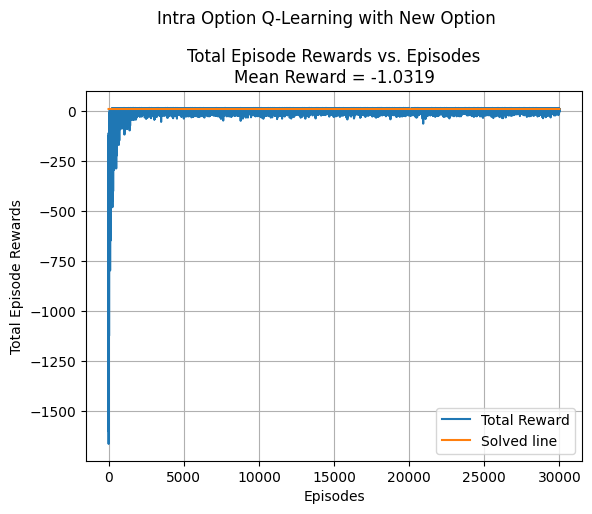

In [ ]:
plt.plot(np.arange(n_eps), rewards_IOQL, label='Total Reward')
plt.title(f'Total Episode Rewards vs. Episodes\nMean Reward = {np.mean(rewards_IOQL):.4f}')
plt.suptitle('Intra Option Q-Learning with New Option', y=1.05)
plt.plot(np.arange(n_eps), [9.7] * n_eps, label='Solved line')
plt.xlabel('Episodes')
plt.ylabel('Total Episode Rewards')
plt.grid()
plt.legend()


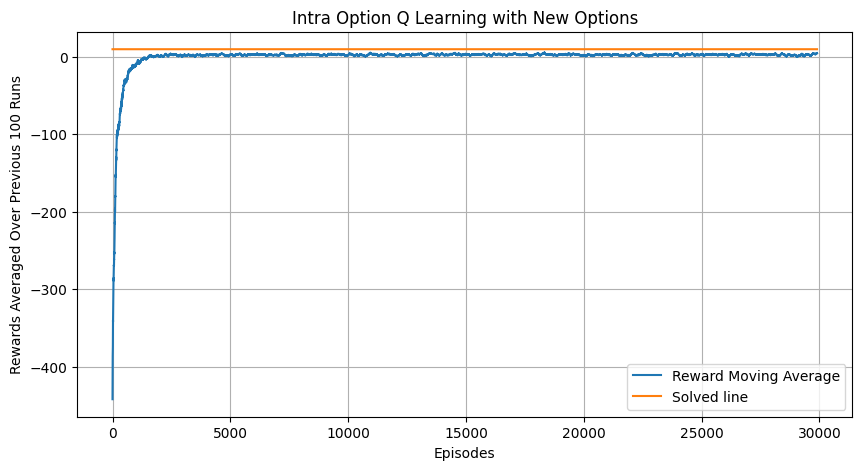

In [ ]:
plt.figure(figsize=(10, 5))
avg_rews0 = [np.average(rewards_IOQL[i:i+100]) for i in range(len(rewards_IOQL)-100)]
plt.plot(avg_rews0, label='Reward Moving Average')
plt.plot([9.7 for _ in range(len(avg_rews0))], label='Solved line')
plt.xlabel('Episodes')
plt.ylabel('Rewards Averaged Over Previous 100 Runs')
plt.title('Intra Option Q Learning with New Options')
plt.legend()
plt.grid()


In [ ]:
# Total Actions :["up", "right", "down", "left", "Away", "Close"]

reshaped_IOQL_matrix = q_values_IOQL.reshape(500, 8)
argmax_IOQL_matrix = np.argmax(reshaped_IOQL_matrix, axis=-1)
max_IOQL_matrix = np.max(reshaped_IOQL_matrix, axis=-1)
labeled_argmax_IOQL_matrix = np.vectorize(opt_map.get)(argmax_IOQL_matrix)

Text(220.72222222222223, 0.5, 'states')

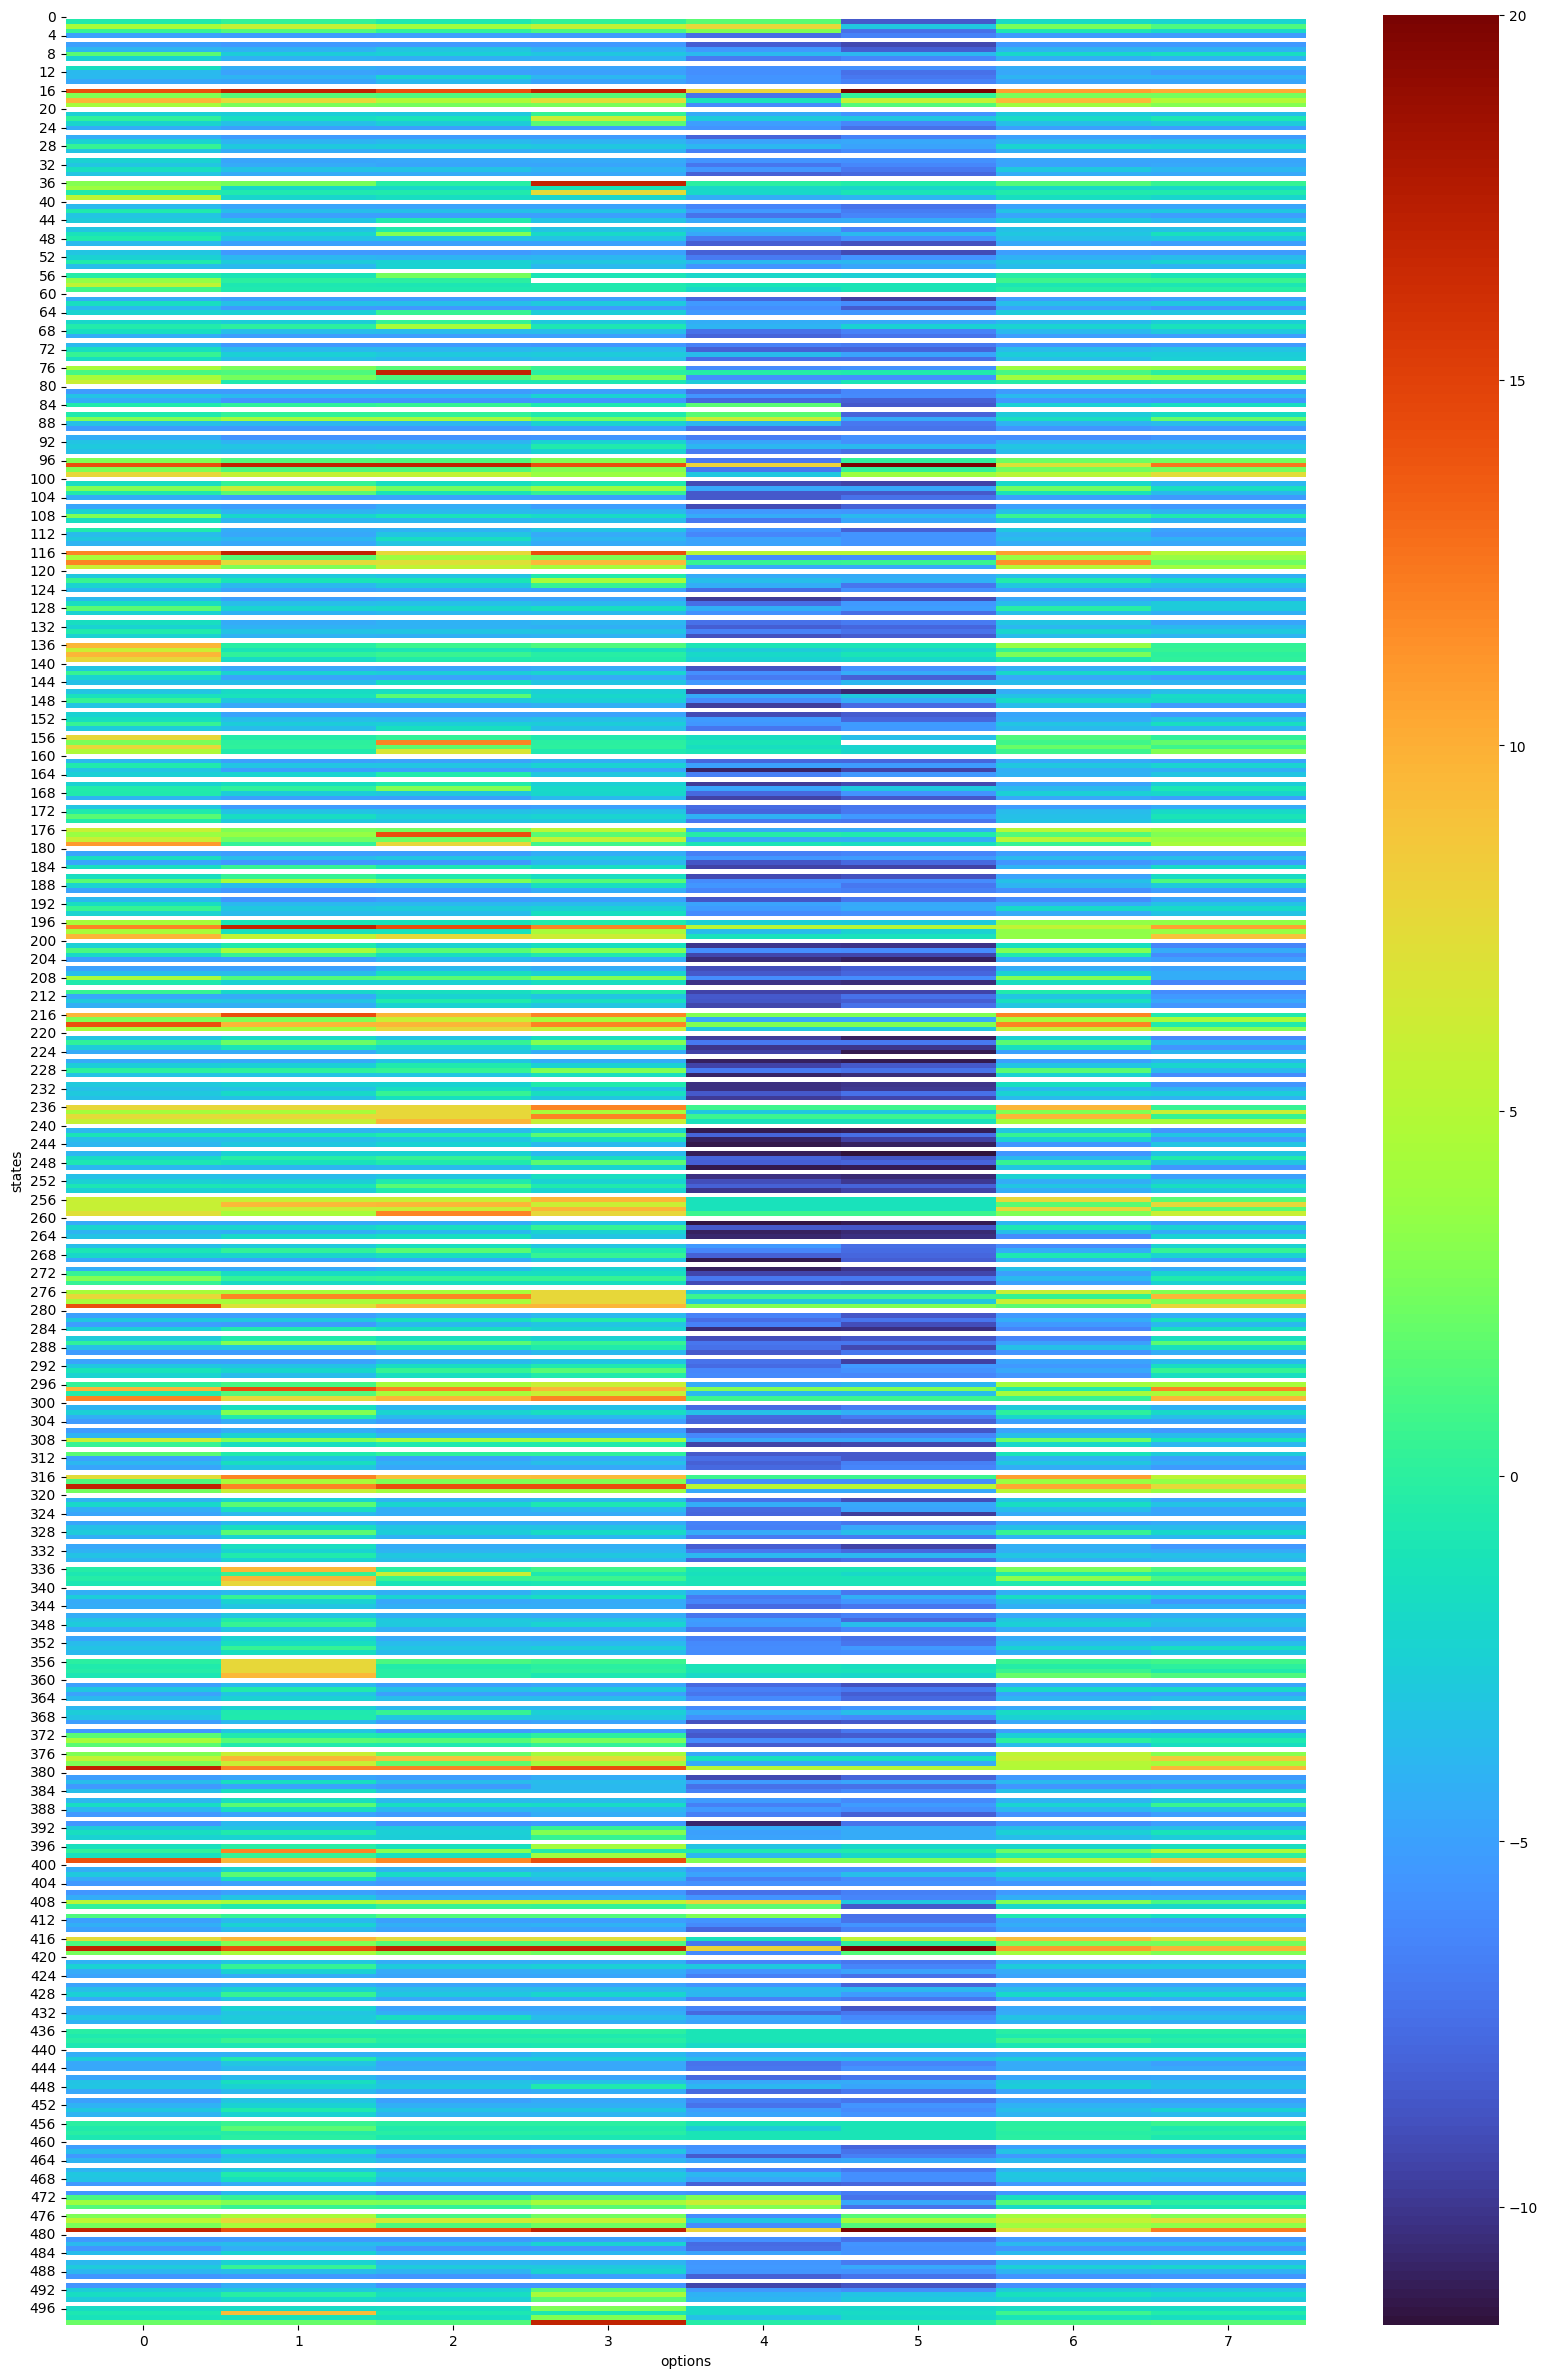

In [ ]:
fig, ax = plt.subplots(figsize=(20,30))
sns.heatmap(reshaped_IOQL_matrix, ax=ax, cmap='turbo', mask=reshaped_IOQL_matrix==0)
ax.set_xlabel('options')
ax.set_ylabel('states')

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search t

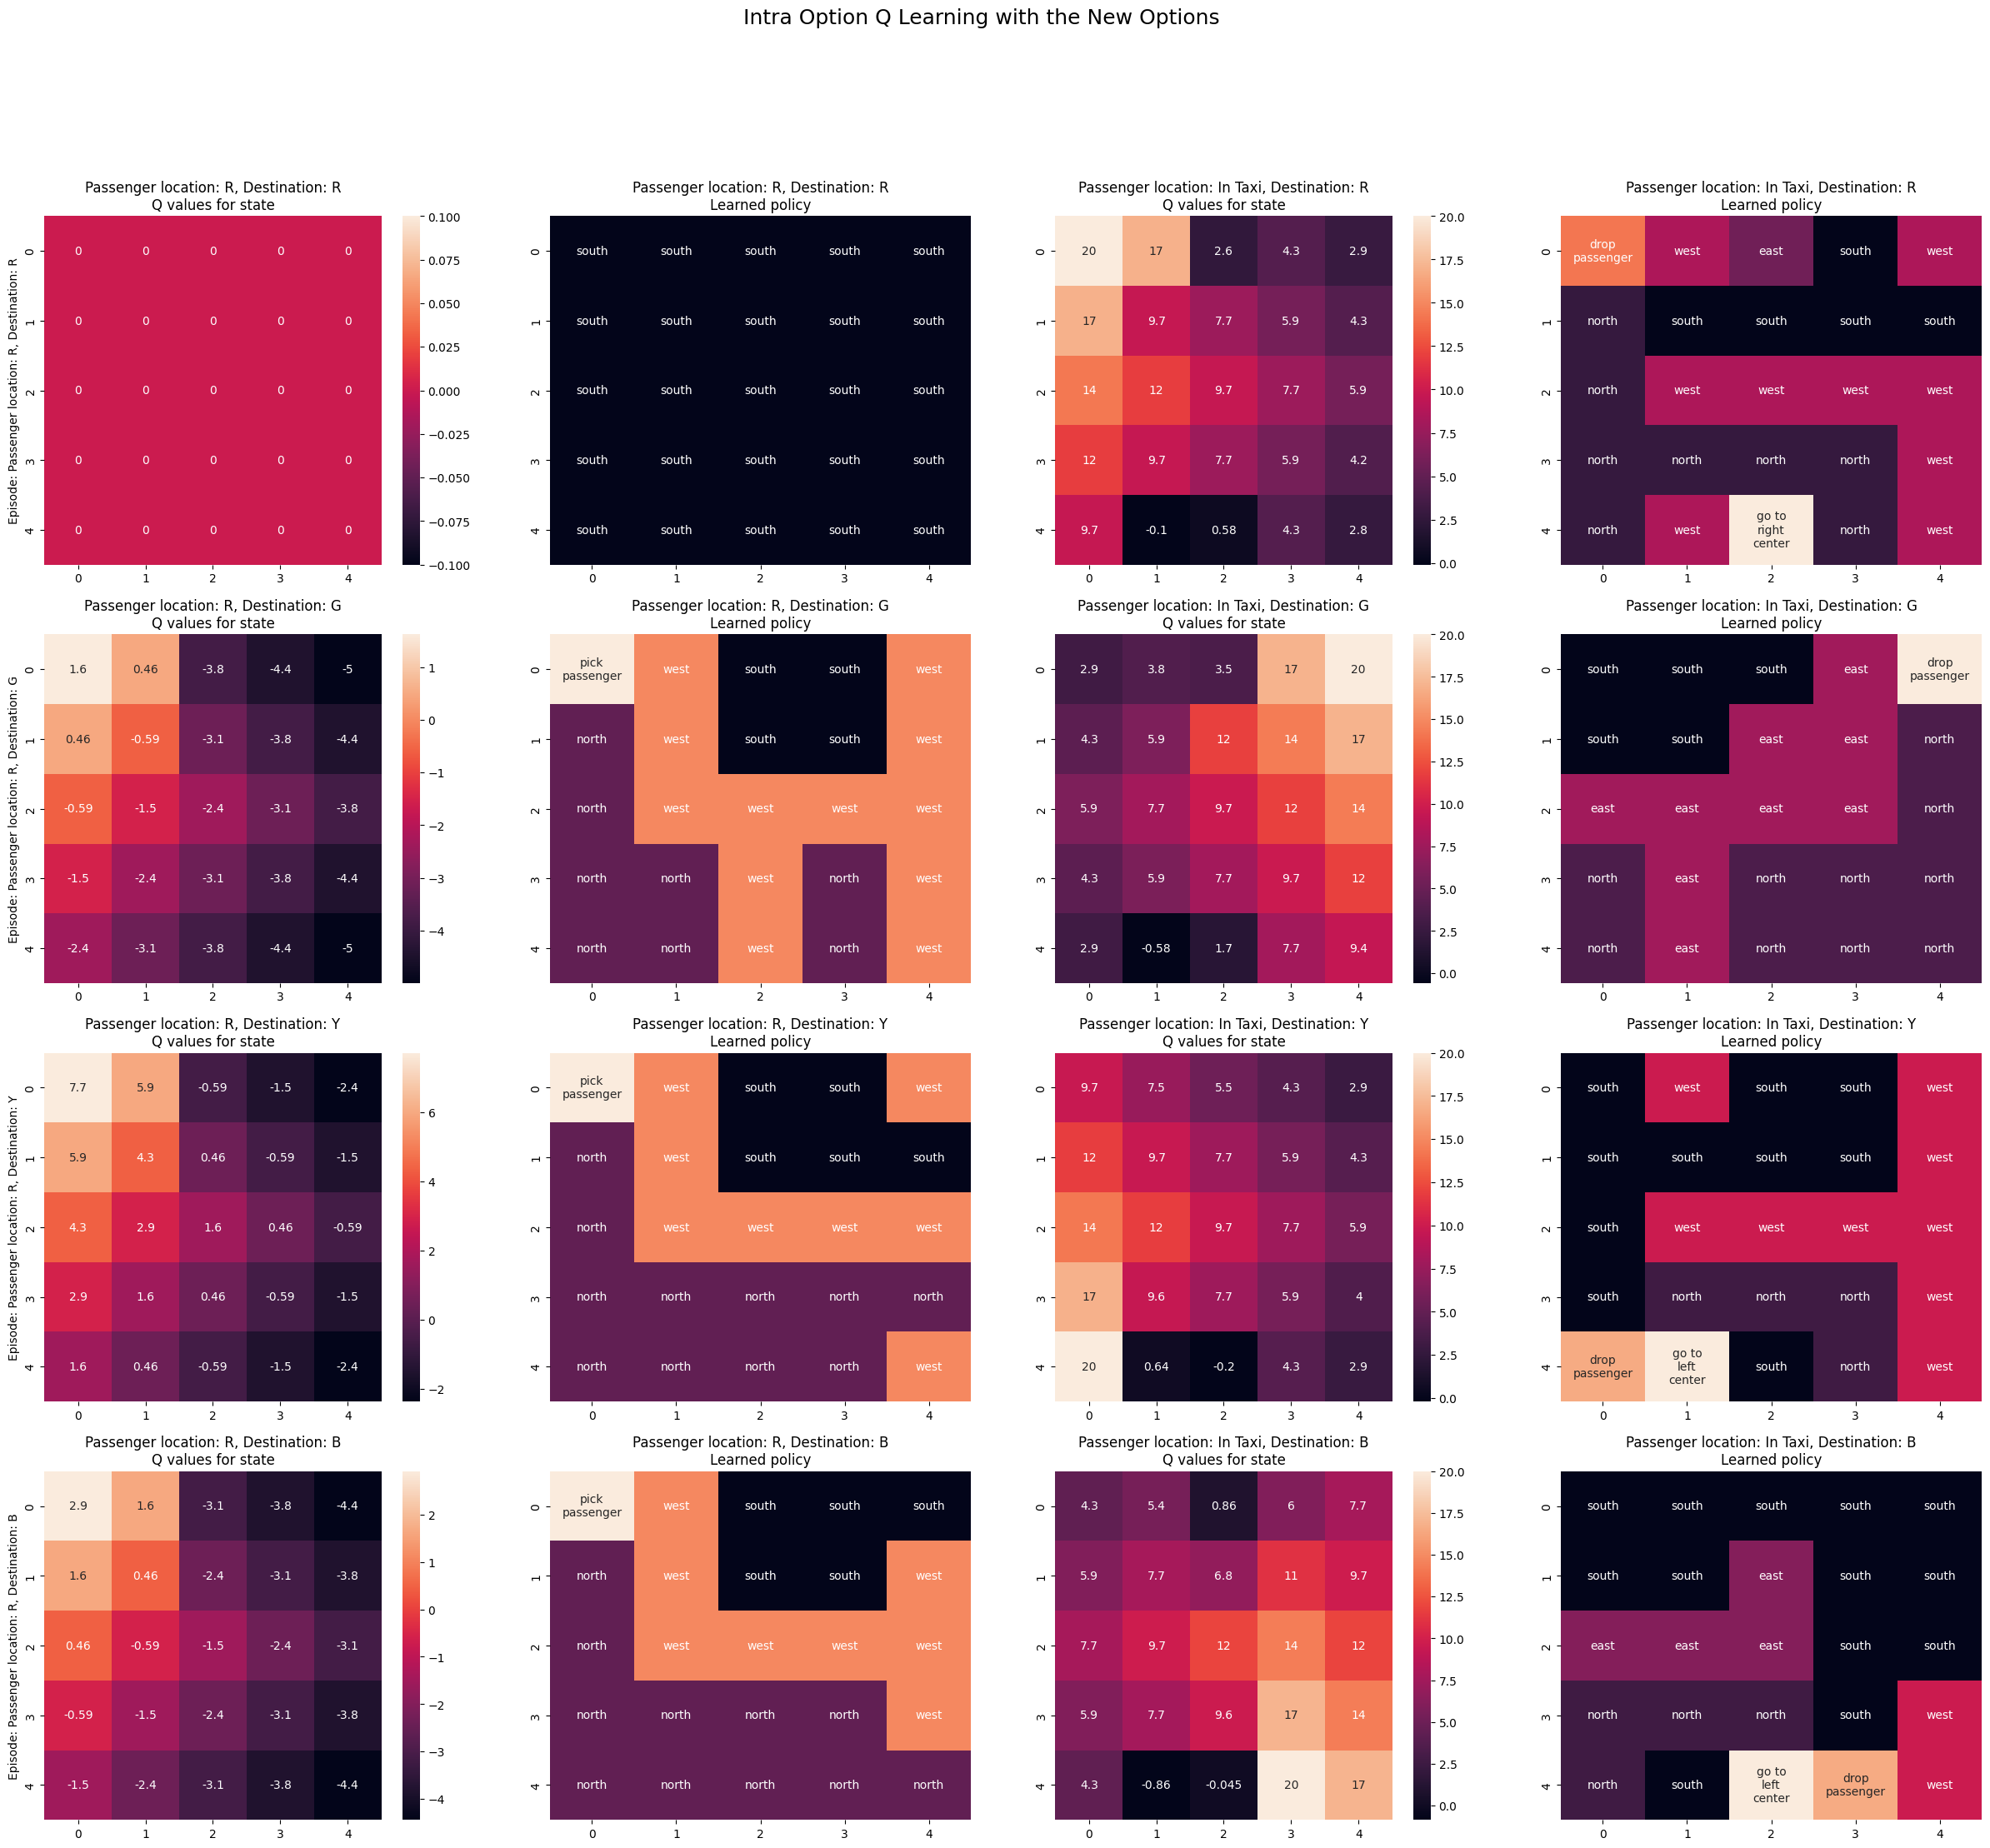

In [ ]:
# Passenger outside taxi
idx = np.arange(20)

pass_loc = 0  # can be 0, 1, 2, 3, 4

id = idx[pass_loc * 4:pass_loc * 4 + 4]
id_in_taxi = idx[16:20]

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(30, 25))

plt.suptitle(f'Intra Option Q Learning with the New Options', fontsize=18)
for n, i in enumerate(id):
    _, _, passenger_loc, destination = env.decode(i)
    axs[n][0].set_title(f'Passenger location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}\nQ values for state')
    sns.heatmap(max_IOQL_matrix[i::20].reshape(5, 5), annot=True, ax=axs[n][0]).set(ylabel=f'Episode: Passenger location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}')
    t = labeled_argmax_IOQL_matrix[i::20].reshape(5, 5)
    sns.heatmap(argmax_IOQL_matrix[i::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][1], cbar=False)
    axs[n][1].set_title(f'Passenger location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}\nLearned policy')

    axs[n][2].set_title(f'Passenger location: In Taxi, Destination: {pass_map[destination]}\nQ values for state')
    sns.heatmap(max_IOQL_matrix[id_in_taxi[n]::20].reshape(5, 5), annot=True, ax=axs[n][2])
    t = labeled_argmax_IOQL_matrix[id_in_taxi[n]::20].reshape(5, 5)
    sns.heatmap(argmax_IOQL_matrix[id_in_taxi[n]::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][3], cbar=False)
    axs[n][3].set_title(f'Passenger location: In Taxi, Destination: {pass_map[destination]}\nLearned policy')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will

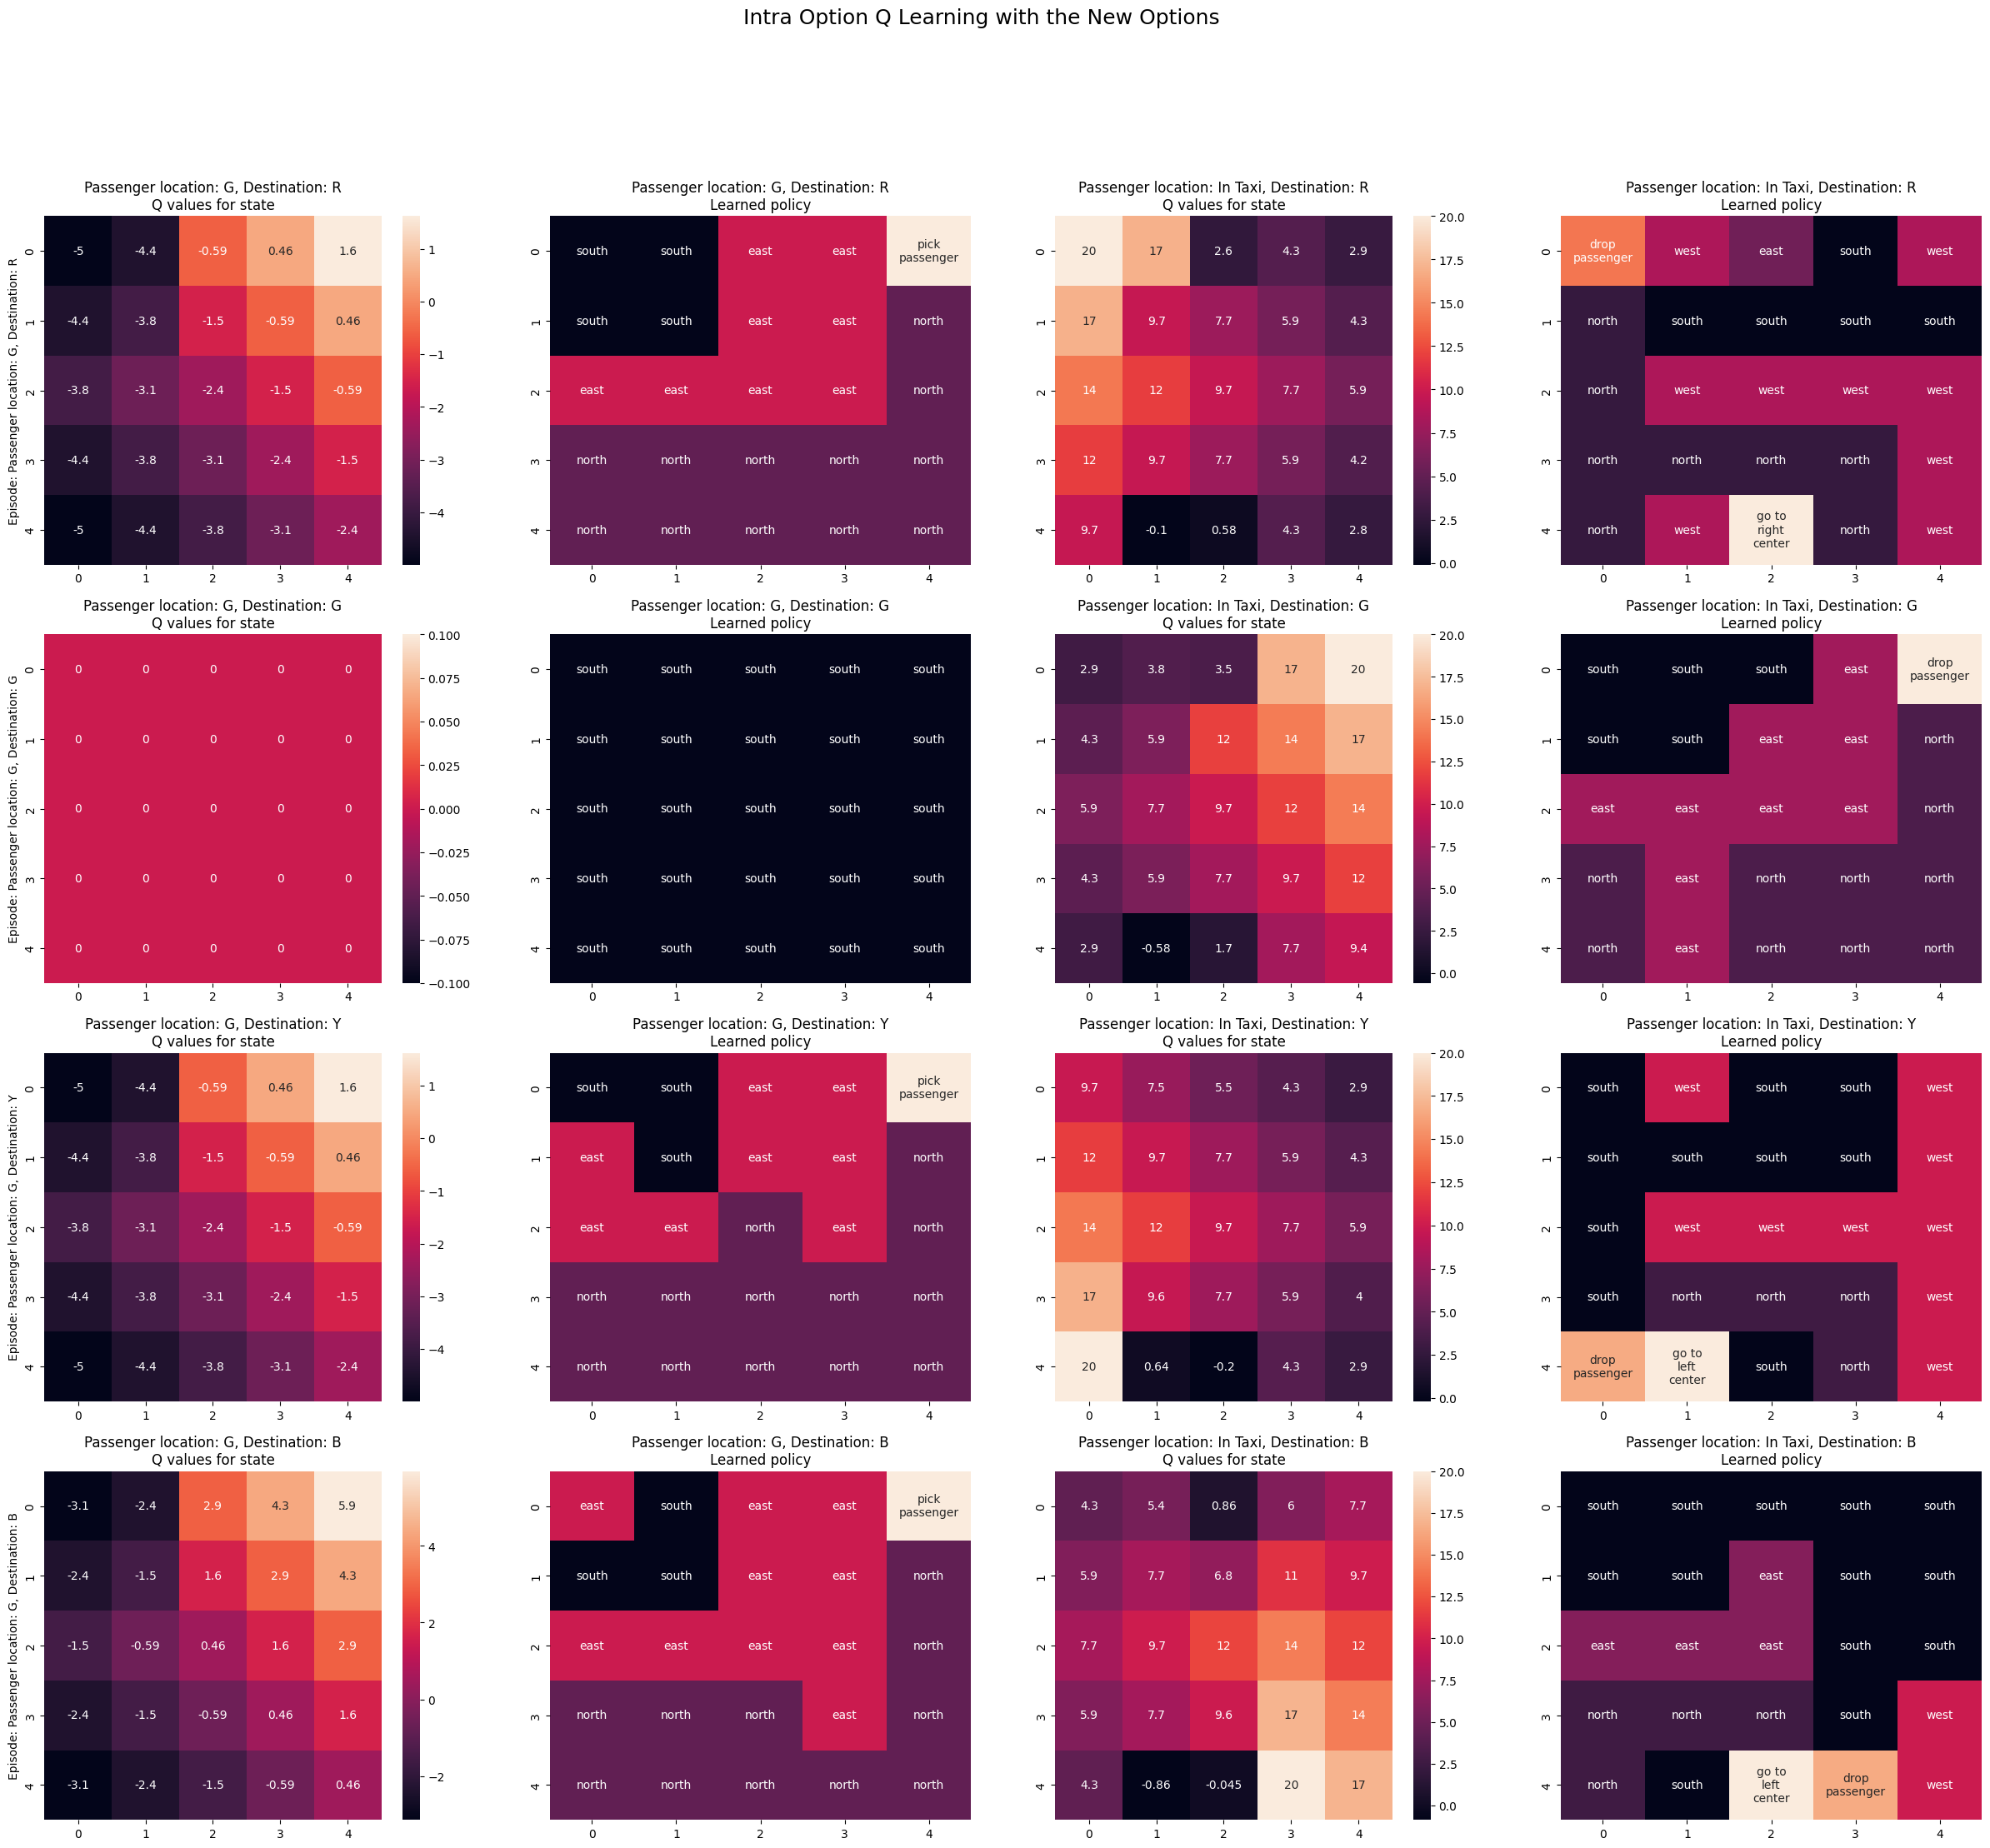

In [ ]:
# Passenger outside taxi
idx = np.arange(20)

pass_loc = 1  # can be 0, 1, 2, 3, 4

id = idx[pass_loc * 4:pass_loc * 4 + 4]
id_in_taxi = idx[16:20]

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(30, 25))

plt.suptitle(f'Intra Option Q Learning with the New Options', fontsize=18)
for n, i in enumerate(id):
    _, _, passenger_loc, destination = env.decode(i)
    axs[n][0].set_title(f'Passenger location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}\nQ values for state')
    sns.heatmap(max_IOQL_matrix[i::20].reshape(5, 5), annot=True, ax=axs[n][0]).set(ylabel=f'Episode: Passenger location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}')
    t = labeled_argmax_IOQL_matrix[i::20].reshape(5, 5)
    sns.heatmap(argmax_IOQL_matrix[i::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][1], cbar=False)
    axs[n][1].set_title(f'Passenger location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}\nLearned policy')

    axs[n][2].set_title(f'Passenger location: In Taxi, Destination: {pass_map[destination]}\nQ values for state')
    sns.heatmap(max_IOQL_matrix[id_in_taxi[n]::20].reshape(5, 5), annot=True, ax=axs[n][2])
    t = labeled_argmax_IOQL_matrix[id_in_taxi[n]::20].reshape(5, 5)
    sns.heatmap(argmax_IOQL_matrix[id_in_taxi[n]::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][3], cbar=False)
    axs[n][3].set_title(f'Passenger location: In Taxi, Destination: {pass_map[destination]}\nLearned policy')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will

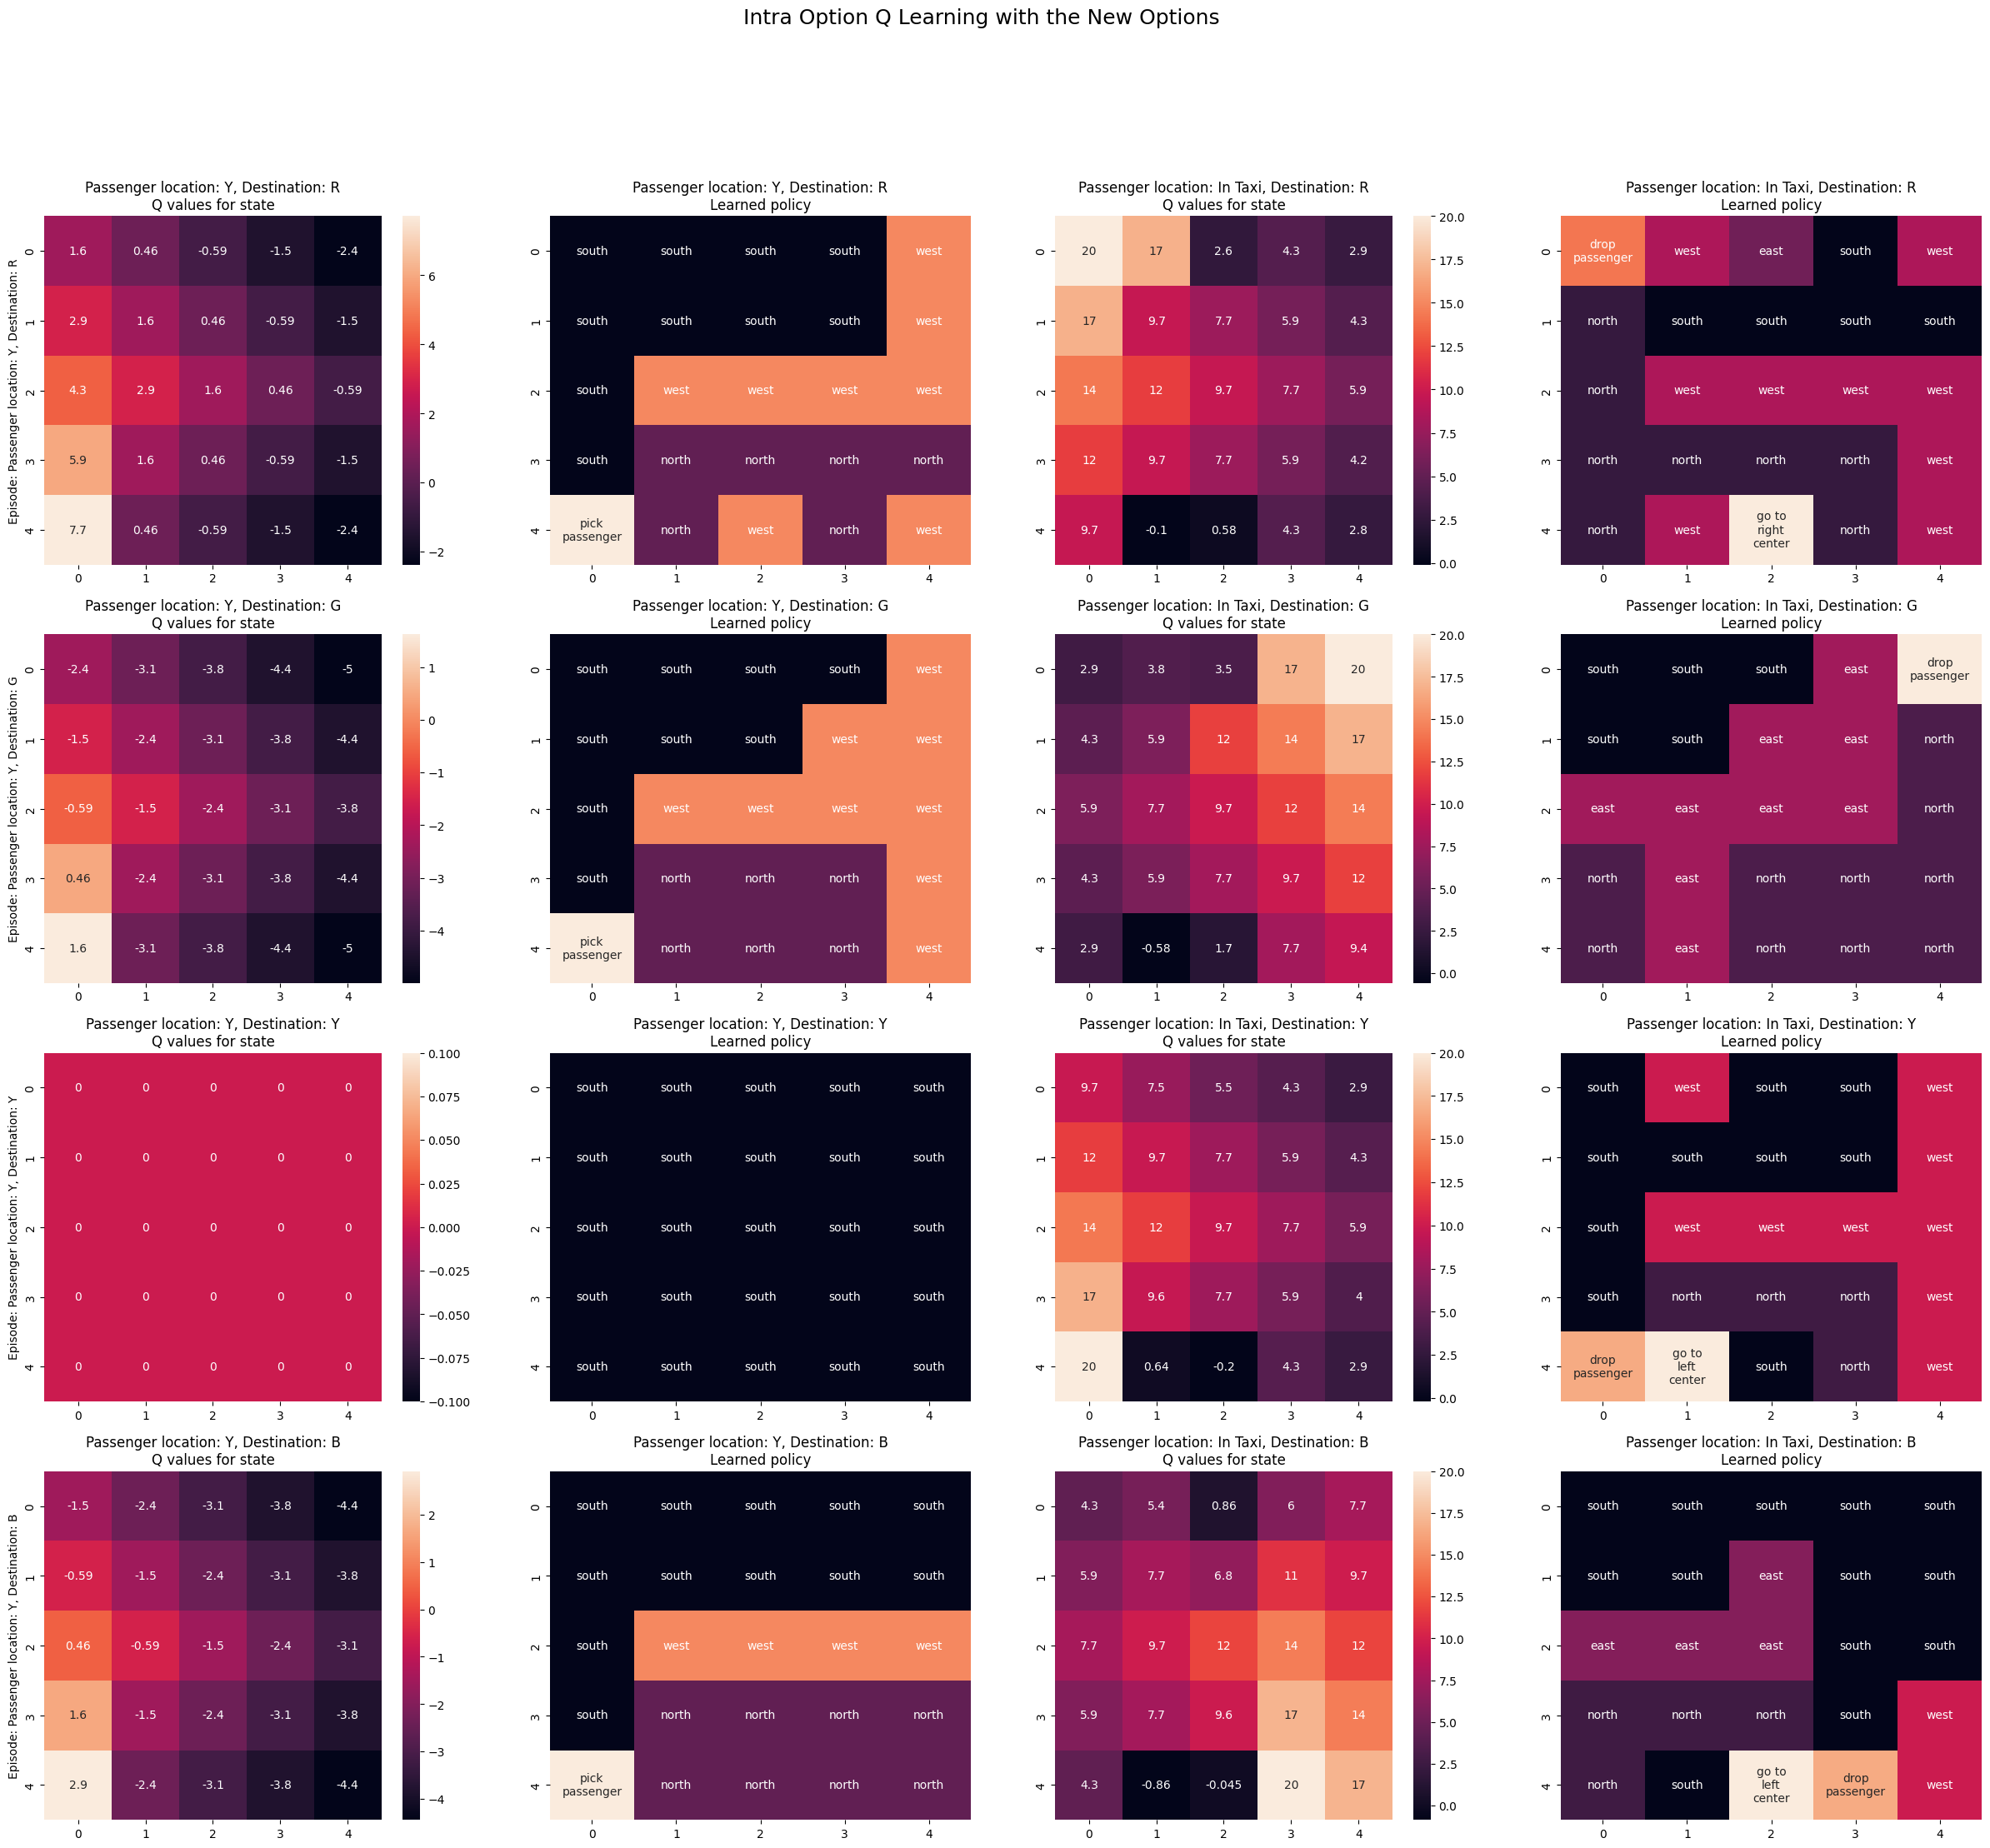

In [ ]:
# Passenger outside taxi
idx = np.arange(20)

pass_loc = 2  # can be 0, 1, 2, 3, 4

id = idx[pass_loc * 4:pass_loc * 4 + 4]
id_in_taxi = idx[16:20]

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(30, 25))

plt.suptitle(f'Intra Option Q Learning with the New Options', fontsize=18)
for n, i in enumerate(id):
    _, _, passenger_loc, destination = env.decode(i)
    axs[n][0].set_title(f'Passenger location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}\nQ values for state')
    sns.heatmap(max_IOQL_matrix[i::20].reshape(5, 5), annot=True, ax=axs[n][0]).set(ylabel=f'Episode: Passenger location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}')
    t = labeled_argmax_IOQL_matrix[i::20].reshape(5, 5)
    sns.heatmap(argmax_IOQL_matrix[i::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][1], cbar=False)
    axs[n][1].set_title(f'Passenger location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}\nLearned policy')

    axs[n][2].set_title(f'Passenger location: In Taxi, Destination: {pass_map[destination]}\nQ values for state')
    sns.heatmap(max_IOQL_matrix[id_in_taxi[n]::20].reshape(5, 5), annot=True, ax=axs[n][2])
    t = labeled_argmax_IOQL_matrix[id_in_taxi[n]::20].reshape(5, 5)
    sns.heatmap(argmax_IOQL_matrix[id_in_taxi[n]::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][3], cbar=False)
    axs[n][3].set_title(f'Passenger location: In Taxi, Destination: {pass_map[destination]}\nLearned policy')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will

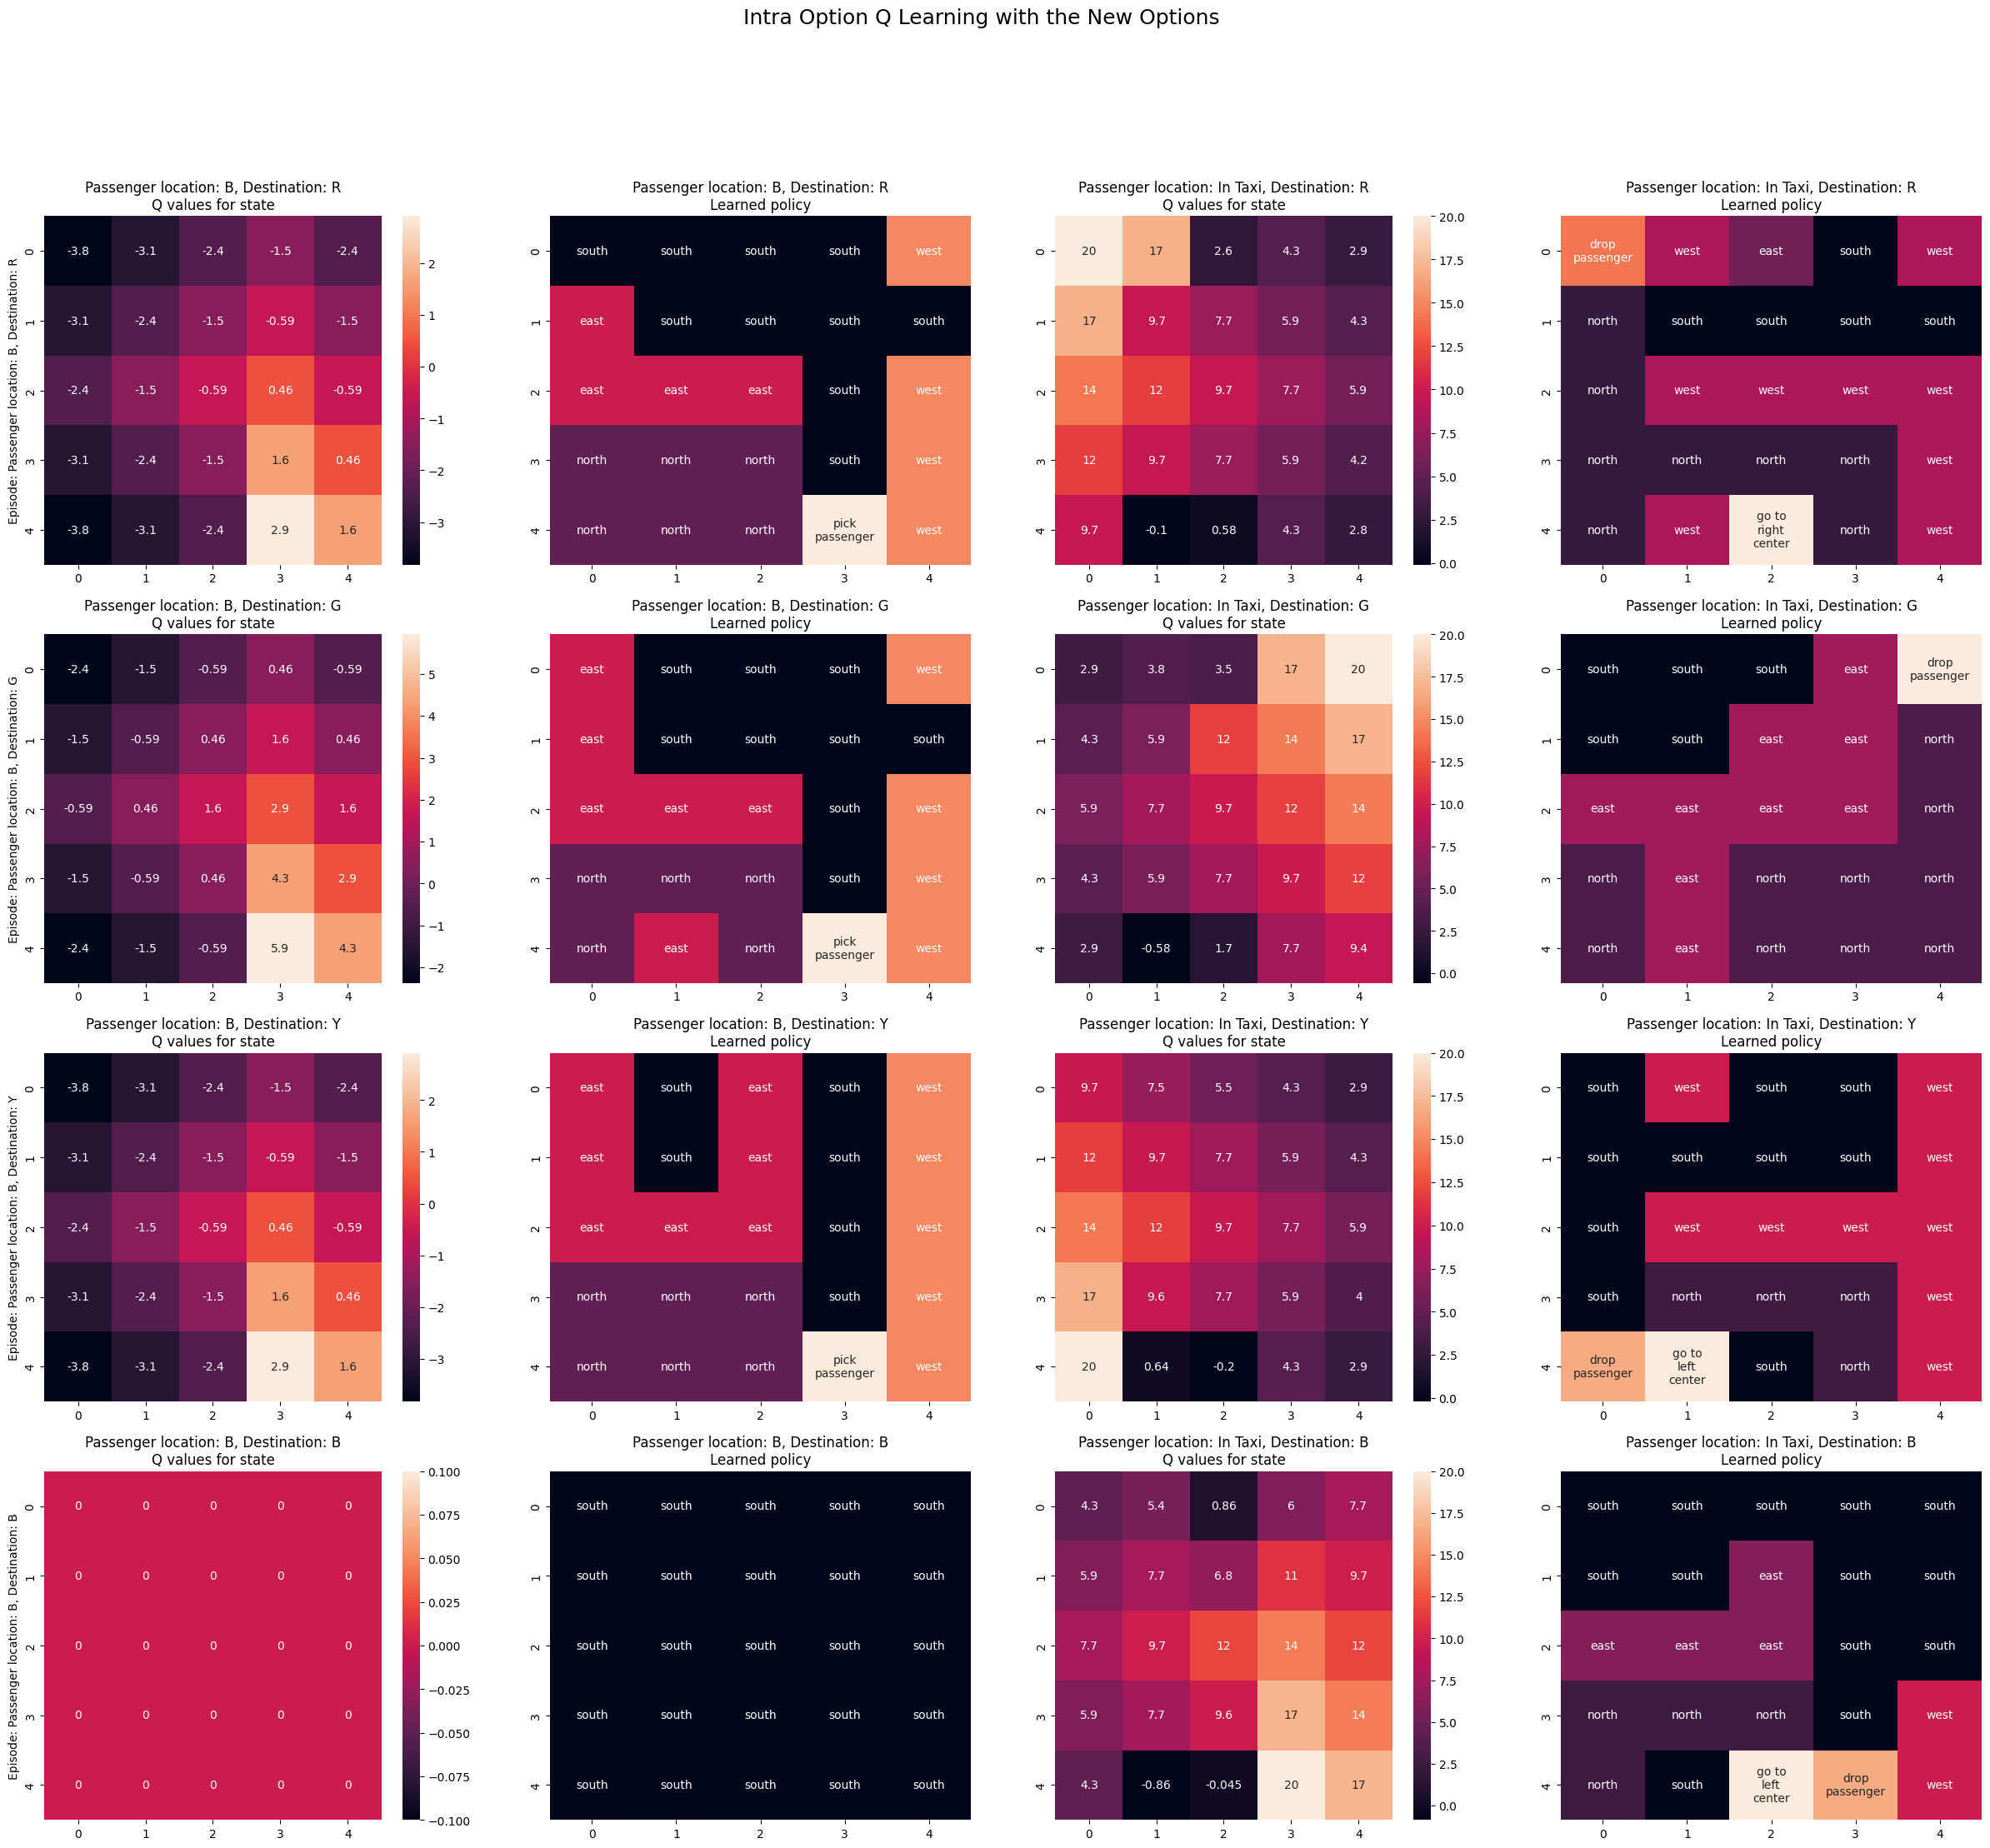

In [ ]:
# Passenger outside taxi
idx = np.arange(20)

pass_loc = 3  # can be 0, 1, 2, 3, 4

id = idx[pass_loc * 4:pass_loc * 4 + 4]
id_in_taxi = idx[16:20]

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(30, 25))

plt.suptitle(f'Intra Option Q Learning with the New Options', fontsize=18)
for n, i in enumerate(id):
    _, _, passenger_loc, destination = env.decode(i)
    axs[n][0].set_title(f'Passenger location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}\nQ values for state')
    sns.heatmap(max_IOQL_matrix[i::20].reshape(5, 5), annot=True, ax=axs[n][0]).set(ylabel=f'Episode: Passenger location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}')
    t = labeled_argmax_IOQL_matrix[i::20].reshape(5, 5)
    sns.heatmap(argmax_IOQL_matrix[i::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][1], cbar=False)
    axs[n][1].set_title(f'Passenger location: {pass_map[passenger_loc]}, Destination: {pass_map[destination]}\nLearned policy')

    axs[n][2].set_title(f'Passenger location: In Taxi, Destination: {pass_map[destination]}\nQ values for state')
    sns.heatmap(max_IOQL_matrix[id_in_taxi[n]::20].reshape(5, 5), annot=True, ax=axs[n][2])
    t = labeled_argmax_IOQL_matrix[id_in_taxi[n]::20].reshape(5, 5)
    sns.heatmap(argmax_IOQL_matrix[id_in_taxi[n]::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][3], cbar=False)
    axs[n][3].set_title(f'Passenger location: In Taxi, Destination: {pass_map[destination]}\nLearned policy')
